## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni 
* Blog post URL: TBD


# obtaining data

In [204]:
# Your code here - remember to use markdown cells for comments as well!
# Import statements go here
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

kc = pd.read_csv('kc_house_data.csv',index_col=None,encoding='latin1')
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## retrieve data information

In [2]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# scrubbing and cleaning Data

## run timestamp data conversion  

In [3]:
def general_datetime_converter(df, col):
    df_clone = df.copy()
    df_clone[col] = pd.to_datetime(df_clone[col])
    return df_clone

kc2 = general_datetime_converter(kc, 'date')
kc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

## read missing and symbolic values

In [4]:
def check_cols(df):
    for col in df.columns:
        print('------------------------------------------------------')
        print(col)
        print(f'unique values: {df[col].nunique(dropna=False)} (\'NaN\' included)')
        print(f'NaN exists? {df[col].isna().any()}')
        if df[col].isna().any():
            print(f'how many \'NaN\' values? {df[col].isna().sum()} ({np.divide(df[col].isna().sum(),df.shape[0])*100:.2f}%)')
        print('------------------------------------------------------')
        print(df[col].value_counts(dropna=False, normalize=True))
        print('------------------------------------------------------')
        print('\n') # Break up the output between columns
        
    return None

check_cols(kc2)

------------------------------------------------------
id
unique values: 21420 ('NaN' included)
NaN exists? False
------------------------------------------------------
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
                ...   
7812801125    0.000046
4364700875    0.000046
3021059276    0.000046
880000205     0.000046
1777500160    0.000046
Name: id, Length: 21420, dtype: float64
------------------------------------------------------


------------------------------------------------------
date
unique values: 372 ('NaN' included)
NaN exists? False
------------------------------------------------------
2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
                ...   
2014-07-27    0.000046
2015-03-08    0.000046
2014-11-02    0.000046
2015-05-15    0.000046
2015-05-24    0.000046
Name: date, Length: 372, dtype: float64
-------------------

## remove erratic symbols

In [5]:
# Your code here - Manipulate column names
subs = [(' ','_'),('.',''),("'",""),('®',''),('Â',''),('â\x84¢',''),('+','plus'),('½','half'),('-','_')]

def transform_colname(df):
    df_clone = df.copy()
    cols_rename = []
    for col in df_clone.columns:
        for old, new in subs:
            col = col.replace(old,new)
        cols_rename.append(col)
    df_clone.columns = cols_rename
    return df_clone

In [6]:
def convert_obj_to_num(df, col):
    df_clone = df.copy()
    if df_clone[col].dtype == 'object':
        df_clone[col] = df_clone[col].replace({'?':np.NaN}).astype('float64')
    return df_clone

kc3 = convert_obj_to_num(kc2, 'sqft_basement')
kc3.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## replace missing values

In [7]:
def find_null_cols(df):
    df_clone = df.copy()
    print('\'NaN\' found in columns as follows:')
    for col in df_clone.columns:
        if (df_clone[col].isnull().any()) | (df_clone[col].isna().any()):
            print(f'\t{col:30} contains {df_clone[col].isna().sum():10} null values ({df_clone[col].isna().sum()*100/df_clone.shape[0]:5.2f}%) !')
    return None

find_null_cols(kc3)

'NaN' found in columns as follows:
	waterfront                     contains       2376 null values (11.00%) !
	view                           contains         63 null values ( 0.29%) !
	sqft_basement                  contains        454 null values ( 2.10%) !
	yr_renovated                   contains       3842 null values (17.79%) !


### continuous features

In [8]:
def fill_null_cols(df, col, nullified=False):
    df_clone = df.copy()
    if nullified:
        df_clone[col] = df_clone[col].fillna(0)
    else:
        try:
            median = df_clone[col].median()
            mean = df_clone[col].mean()
            print(f'{col}: median {median:.3f}, mean {mean:.3f}')
            if median > 0:
                df_clone[col] = df_clone[col].fillna(median)
            else:
                df_clone[col] = df_clone[col].fillna(mean)
        except:
            print('N/A')
    return df_clone

In [9]:
kc4 = fill_null_cols(kc3, 'sqft_basement', nullified=False)
kc4.sqft_basement.isna().any()

sqft_basement: median 0.000, mean 291.852


False

In [10]:
kc5 = fill_null_cols(kc4, 'yr_renovated', nullified=True)
print(kc5.yr_renovated.isna().any())
kc5.yr_renovated.unique()

False


array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

### discrete, categorical features

In [11]:
def replace_null_cols(df, col, obj=False):
    df_clone = df.copy()
    if obj:
        df_clone[col] = df_clone[col].fillna('unknown')
    else:
        #df_clone[col] = df_clone[col].fillna(-1)
        # Thomas T. 
        df_clone[col] = df_clone[col].fillna(0)
    return df_clone

In [12]:
kc6 = replace_null_cols(kc5, 'waterfront', obj=False)
kc6.waterfront.isna().any()

False

In [13]:
kc7 = replace_null_cols(kc6, 'view', obj=False)
kc7.view.isna().any()

False

In [14]:
def transform_col_to_binary(df, col):
    df_clone = df.copy()
    df_clone[col+'_korg'] = df_clone[col]
    for idx in range(df_clone.shape[0]):
        if df_clone.loc[idx,col] > 0:
            df_clone.loc[idx,col] = 1
    return df_clone

In [15]:
kc7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [16]:
kc8 = transform_col_to_binary(kc7, 'yr_renovated')
print('any NaN?',kc8.yr_renovated.isna().sum())
print(kc8.yr_renovated.nunique())
print('after:',kc8.yr_renovated.unique())
print('before:',kc8.yr_renovated_korg.unique())

any NaN? 0
2
after: [0. 1.]
before: [   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


## remove duplications

In [17]:
def check_remove_duplicated_data(df):
    df_clone = df.copy()
    #df_clone['is_duplicated'] = df_clone.duplicated(subset=None, keep='first')
    do_drop = '0'
    for col in df_clone.columns:
        print(f'{col} contains duplications?')
        if df_clone[col].duplicated().value_counts(normalize=True, sort=False)[0] == 1:
            print('Nope!')
        else:
            print(f'Yes, how much? {df_clone[col].duplicated().value_counts(normalize=True, sort=False)[1]}')
            do_drop = input('drop? enter 1 (\'True\') or 0 (\'False\')')
            if do_drop == '1':
                df_clone[col+'_kdup'] = df_clone[col]
                #df_clone[col] = df_clone[col].drop_duplicates(keep='first') 
                # Thomas T.
                df_clone[col] = df_clone[col].drop_duplicates(keep='last')
                print(f' duplications in {col} dropped ... ')
            else:
                print(f' skip {col} ... ')
        print('---------------------------------------------------------------------------')
    return df_clone

In [18]:
kc9 = check_remove_duplicated_data(kc8)
kc9.columns

id contains duplications?
Yes, how much? 0.008195582719822198
drop? enter 1 ('True') or 0 ('False')1
 duplications in id dropped ... 
---------------------------------------------------------------------------
date contains duplications?
Yes, how much? 0.9827753854702042
drop? enter 1 ('True') or 0 ('False')0
 skip date ... 
---------------------------------------------------------------------------
price contains duplications?
Yes, how much? 0.832291521970644
drop? enter 1 ('True') or 0 ('False')0
 skip price ... 
---------------------------------------------------------------------------
bedrooms contains duplications?
Yes, how much? 0.9994443672732324
drop? enter 1 ('True') or 0 ('False')0
 skip bedrooms ... 
---------------------------------------------------------------------------
bathrooms contains duplications?
Yes, how much? 0.9986572209103116
drop? enter 1 ('True') or 0 ('False')0
 skip bathrooms ... 
---------------------------------------------------------------------------

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_renovated_korg',
       'id_kdup'],
      dtype='object')

## remove extreme outliers

In [19]:
def remove_outliers(df):
    df_clone = df.copy()
    cuts = []
    do_work = '0'
    do_cut = '0'
    read_cut = '0'
    
    for col in df_clone.columns:
        print('\n')
        print('***************************************************************************')
        print(f'{col} (data type: {df_clone[col].dtype}):')
        print(f'>>>>>> remaining data size {df_clone.shape[0]} wrt {df.shape[0]}')
        print(f'>>>>>> Percent remained (previous cuts applied): {round(df_clone.shape[0]/df.shape[0],3)}')
        do_work = input('wanna continue? enter 1 (\'True\') or 0 (\'False\')')
        if do_work == '1':    
            print ('----------------------------------------------------------------------')
            print(df_clone[col].value_counts(dropna=False,normalize=True))
            print ('----------------------------------------------------------------------')
            q75, q25 = np.percentile(df_clone[col], [75 ,25])
            iqr = q75 - q25
            minVal = q25 - (1.73 * iqr)
            maxVal = q75 + (1.73 * iqr)
            print(f'*** IQR: {iqr:.6f} ********* ') 
            print(f'*** minValue: {minVal:.6f} *** ') 
            print(f'*** maxValue: {maxVal:.6f} *** ')
            print('-----------------------------------------------------------------------')
            do_cut = input('make cut? enter 1 (\'True\') or 0 (\'False\')')
            if (maxVal == minVal) & (do_cut == '1'):
                do_cut = 0
                print('minimal and maximal values are the same. cut not recommended.')
            if do_cut == '1':
                print(f'\tcut on {col} applied ... ')   
                try:
                    orig_tot = df.shape[0]
                    df_cut = df_clone.copy()
                    df_cut = df_clone[(df_clone[col]<minVal) | (df_clone[col]>maxVal)]
                    df_clone = df_clone[(df_clone[col]>minVal) & (df_clone[col]<maxVal)]
                    print(f'\tPercent removed: {round(df_cut.shape[0]/orig_tot,3)}')
                    cuts.append([col,round(minVal,6),round(maxVal,6),round(df_clone.shape[0]/df.shape[0],3),round(df_cut.shape[0]/orig_tot,3)])
                except Exception as e:
                    print('\t\t>>> Sorry! ',e)
            else:
                print(f'\tskip {col} ... ')
                read_cut = input('\tbut... wanna read cut? enter 1 (\'True\') or 0 (\'False\')')
                if read_cut == '1':
                    df_kept = df_clone.copy()
                    try:
                        orig_tot = df_clone.shape[0]
                        df_cut = df_clone.copy()
                        df_cut = df_clone[(df_clone[col]<minVal) | (df_clone[col]>maxVal)]
                        df_clone = df_clone[(df_clone[col]>minVal) & (df_clone[col]<maxVal)]
                        print(f'\tPercent removed: {round(df_cut.shape[0]/orig_tot,3)}')
                        cuts.append([col,round(minVal,6),round(maxVal,6),round(df_clone.shape[0]/df.shape[0],3),round(df_cut.shape[0]/orig_tot,3)])
                    except Exception as e:
                        print('\t\t>>> Sorry! ',e)
                    df_clone = df_kept.copy()
                else:
                    cuts.append([col,0.,0.,0.,0.])
        else:
            cuts.append([col,0.,0.,0.,0.])
            continue
        input("Press Enter to continue...")
    return cuts, df_clone

### removal of extreme outliers (Q1 - 1.73 * IQR , Q3 + 1.73 * IQR) ; uncomment lines below

In [20]:
results, kc10 = remove_outliers(kc9)
print(kc10.columns)
results



***************************************************************************
id (data type: float64):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
date (data type: datetime64[ns]):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
price (data type: float64):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
bedrooms (data type: int64):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('F



***************************************************************************
yr_renovated (data type: float64):
>>>>>> remaining data size 19181 wrt 21597
>>>>>> Percent remained (previous cuts applied): 0.888
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
zipcode (data type: int64):
>>>>>> remaining data size 19181 wrt 21597
>>>>>> Percent remained (previous cuts applied): 0.888
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
lat (data type: float64):
>>>>>> remaining data size 19181 wrt 21597
>>>>>> Percent remained (previous cuts applied): 0.888
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
long (data type: float64):
>>>>>> remaining data size 19181 wrt 21597
>>>>>> Percent remained (previous cuts applied): 0.888
wanna continue? enter 1 ('True') 

[['id', 0.0, 0.0, 0.0, 0.0],
 ['date', 0.0, 0.0, 0.0, 0.0],
 ['price', 0.0, 0.0, 0.0, 0.0],
 ['bedrooms', 1.27, 5.73, 0.975, 0.025],
 ['bathrooms', 0.4525, 3.7975, 0.961, 0.015],
 ['sqft_living', 0.0, 0.0, 0.0, 0.0],
 ['sqft_lot', 0.0, 0.0, 0.0, 0.0],
 ['floors', -0.73, 3.73, 0.961, 0.0],
 ['waterfront', 0.0, 0.0, 0.0, 0.0],
 ['view', 0.0, 0.0, 0.0, 0.092],
 ['condition', 1.27, 5.73, 0.96, 0.001],
 ['grade', 5.27, 9.73, 0.888, 0.071],
 ['sqft_above', 0.0, 0.0, 0.0, 0.0],
 ['sqft_basement', 0.0, 0.0, 0.0, 0.0],
 ['yr_built', 0.0, 0.0, 0.0, 0.0],
 ['yr_renovated', 0.0, 0.0, 0.0, 0.0],
 ['zipcode', 0.0, 0.0, 0.0, 0.0],
 ['lat', 0.0, 0.0, 0.0, 0.0],
 ['long', 0.0, 0.0, 0.0, 0.0],
 ['sqft_living15', 0.0, 0.0, 0.0, 0.0],
 ['sqft_lot15', 0.0, 0.0, 0.0, 0.0],
 ['yr_renovated_korg', 0.0, 0.0, 0.0, 0.0],
 ['id_kdup', 0.0, 0.0, 0.0, 0.0]]

# pre-processing data

In [22]:
def combine_vars(df, col):
    df_clone = df.copy()
    df_clone[col] = sorted(df_clone[col])
    
    print(f'no. unique variables in {col}: {df_clone[col].nunique()}')
    print(f'unique values as follows: {df_clone[col].unique()}')
    
    q_0 = float(df_clone[col].min())
    q_25 = df_clone[col].quantile(q=0.25)
    q_50 = df_clone[col].median()
    q_75 = df_clone[col].quantile(q=0.75)
    q_100 = float(df_clone[col].max())
            
    print(f'q0={q_0} , q25={q_25} , q50={q_50} , q75={q_75} , q100={q_100}')
    print(f'size {df_clone[col].shape[0]}')
    
    for idx, row in df_clone.iterrows():
        if (row[col] <= q_25):
            row[col] = (q_0 + q_25) / 2
            df_clone.loc[idx,col] = row[col]
        elif (row[col] > q_25) & (row[col] <= q_50):
            row[col] = (q_25 + q_50) / 2
            df_clone.loc[idx,col] = row[col]
        elif (row[col] > q_50) & (row[col] <= q_75):
            row[col] = (q_50 + q_75) / 2
            df_clone.loc[idx,col] = row[col]
        elif (row[col] > q_75) & (row[col] <= q_100):
            row[col] = (q_75 + q_100) / 2
            df_clone.loc[idx,col] = row[col]
        else:
            print('sth. strange!')
    
    return df_clone

## size reduction for discrete feature: date (from 12 to 4)

In [151]:
kc10['yr_sold'] = kc10['date'].dt.year
kc10['mo_sold'] = kc10['date'].dt.month
print(kc10.dtypes)
kc10.head()

id                          float64
date                 datetime64[ns]
price                       float64
bedrooms                      int64
bathrooms                   float64
sqft_living                   int64
sqft_lot                      int64
floors                      float64
waterfront                  float64
view                        float64
condition                     int64
grade                         int64
sqft_above                    int64
sqft_basement               float64
yr_built                      int64
yr_renovated                float64
zipcode                       int64
lat                         float64
long                        float64
sqft_living15                 int64
sqft_lot15                    int64
yr_renovated_korg           float64
id_kdup                       int64
yr_sold                       int64
mo_sold                       int64
dtype: object


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7.129301e+09 2014-10-13  221900.0         3       1.00         1180   
1  6.414100e+09 2014-12-09  538000.0         3       2.25         2570   
2  5.631500e+09 2015-02-25  180000.0         2       1.00          770   
3  2.487201e+09 2014-12-09  604000.0         4       3.00         1960   
4  1.954401e+09 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         0.0   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...           1.0    98125  47.7210   
2     10000     1.0         0.0   0.0  ...           0.0    98028  47.7379   
3      5000     1.0         0.0   0.0  ...           0.0    98136  47.5208   
4      8080     1.0         0.0   0.0  ...           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  yr_renovated_korg     id_kdup  yr_sold  \
0 -122.257           1340        5650                0.0  7129300520     2014   
1 -122.319           1690        7639             1991.0  6414100192     2014   
2 -122.233           2720        8062                0.0  5631500400     2015   
3 -122.393           1360        5000                0.0  2487200875     2014   
4 -122.045           1800        7503                0.0  1954400510     2015   

   mo_sold  
0       10  
1       12  
2        2  
3       12  
4        2  

[5 rows x 25 columns]

In [152]:
kc11 = kc10.drop(['date'],axis=1)
kc11.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7.129301e+09  221900.0         3       1.00         1180      5650     1.0   
1  6.414100e+09  538000.0         3       2.25         2570      7242     2.0   
2  5.631500e+09  180000.0         2       1.00          770     10000     1.0   
3  2.487201e+09  604000.0         4       3.00         1960      5000     1.0   
4  1.954401e+09  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0         0.0   0.0          3  ...           0.0    98178  47.5112 -122.257   
1         0.0   0.0          3  ...           1.0    98125  47.7210 -122.319   
2         0.0   0.0          3  ...           0.0    98028  47.7379 -122.233   
3         0.0   0.0          5  ...           0.0    98136  47.5208 -122.393   
4         0.0   0.0          3  ...           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  yr_renovated_korg     id_kdup  yr_sold  mo_sold  
0           1340        5650                0.0  7129300520     2014       10  
1           1690        7639             1991.0  6414100192     2014       12  
2           2720        8062                0.0  5631500400     2015        2  
3           1360        5000                0.0  2487200875     2014       12  
4           1800        7503                0.0  1954400510     2015        2  

[5 rows x 24 columns]

In [153]:
kc11 = combine_vars(kc11, 'mo_sold')
kc11.mo_sold.unique()

no. unique variables in mo_sold: 12
unique values as follows: [ 1  2  3  4  5  6  7  8  9 10 11 12]
q0=1.0 , q25=4.0 , q50=6.0 , q75=9.0 , q100=12.0
size 19181


array([ 2.5,  5. ,  7.5, 10.5])

## size reduction for other discrete features

* view (from 5 to 2)
* waterfront (from 2 to 2)
* bathrooms (from 14 to 4)
* bedrooms (from 4 to 3)
* floors (from 6 to 3)

In [154]:
kc11 = combine_vars(kc11, 'view')
kc11.view.unique()

no. unique variables in view: 5
unique values as follows: [0. 1. 2. 3. 4.]
q0=0.0 , q25=0.0 , q50=0.0 , q75=0.0 , q100=4.0
size 19181


array([0., 2.])

In [155]:
kc11 = combine_vars(kc11, 'waterfront')
kc11.waterfront.unique()

no. unique variables in waterfront: 2
unique values as follows: [0. 1.]
q0=0.0 , q25=0.0 , q50=0.0 , q75=0.0 , q100=1.0
size 19181


array([0. , 0.5])

In [156]:
kc11 = combine_vars(kc11, 'bathrooms')
kc11.bathrooms.unique()

no. unique variables in bathrooms: 14
unique values as follows: [0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75]
q0=0.5 , q25=1.5 , q50=2.0 , q75=2.5 , q100=3.75
size 19181


array([1.   , 1.75 , 2.25 , 3.125])

In [157]:
kc11 = combine_vars(kc11, 'bedrooms')
kc11.bedrooms.unique()

no. unique variables in bedrooms: 4
unique values as follows: [2 3 4 5]
q0=2.0 , q25=3.0 , q50=3.0 , q75=4.0 , q100=5.0
size 19181


array([2.5, 3.5, 4.5])

In [158]:
kc11 = combine_vars(kc11, 'floors')
kc11.floors.unique()

no. unique variables in floors: 6
unique values as follows: [1.  1.5 2.  2.5 3.  3.5]
q0=1.0 , q25=1.0 , q50=1.0 , q75=2.0 , q100=3.5
size 19181


array([1.  , 1.5 , 2.75])

## size reduction for categorical features

* condition (from 4 to 3)
* grade (from 4 to 3)

In [159]:
kc11 = combine_vars(kc11, 'condition')
kc11.condition.unique()

no. unique variables in condition: 4
unique values as follows: [2 3 4 5]
q0=2.0 , q25=3.0 , q50=3.0 , q75=4.0 , q100=5.0
size 19181


array([2.5, 3.5, 4.5])

In [160]:
kc11 = combine_vars(kc11, 'grade')
kc11.grade.unique()

no. unique variables in grade: 4
unique values as follows: [6 7 8 9]
q0=6.0 , q25=7.0 , q50=7.0 , q75=8.0 , q100=9.0
size 19181


array([6.5, 7.5, 8.5])

## size reduction for continuous features

In [161]:
kc11['lat_cat'] = kc11['lat']
kc11 = combine_vars(kc11, 'lat_cat')
kc11.lat_cat.unique()

no. unique variables in lat_cat: 4956
unique values as follows: [47.1559 47.1593 47.1622 ... 47.7774 47.7775 47.7776]
q0=47.1559 , q25=47.4583 , q50=47.5686 , q75=47.6801 , q100=47.7776
size 19181


array([47.3071 , 47.51345, 47.62435, 47.72885])

# exploring data

## count unique values 

In [162]:
def unique_features_plt(df):
    df_clone = df.copy()
    df_clone = df_clone.loc[:, df_clone.dtypes != 'object']
    print(df_clone.columns)
    print(df_clone.nunique())
    
    fig, ax = plt.subplots(1,1,figsize = (15, 5)) 
    plt.bar(df_clone.columns,df_clone.nunique(),color='green',alpha=0.4,width=0.2)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()
    
    return None

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_renovated_korg', 'id_kdup',
       'yr_sold', 'mo_sold', 'lat_cat'],
      dtype='object')
id                   19033
price                 3320
bedrooms                 3
bathrooms                4
sqft_living            809
sqft_lot              8677
floors                   3
waterfront               2
view                     2
condition                3
grade                    3
sqft_above             758
sqft_basement          254
yr_built               116
yr_renovated             2
zipcode                 70
lat                   4956
long                   736
sqft_living15          659
sqft_lot15            7684
yr_renovated_korg       68
id_kdup              19033
yr_sold                  2
mo_sold            

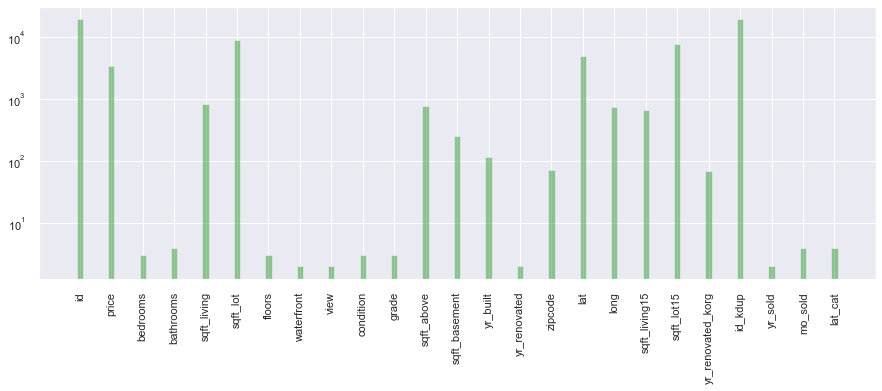

In [163]:
unique_features_plt(kc11)

## understand data

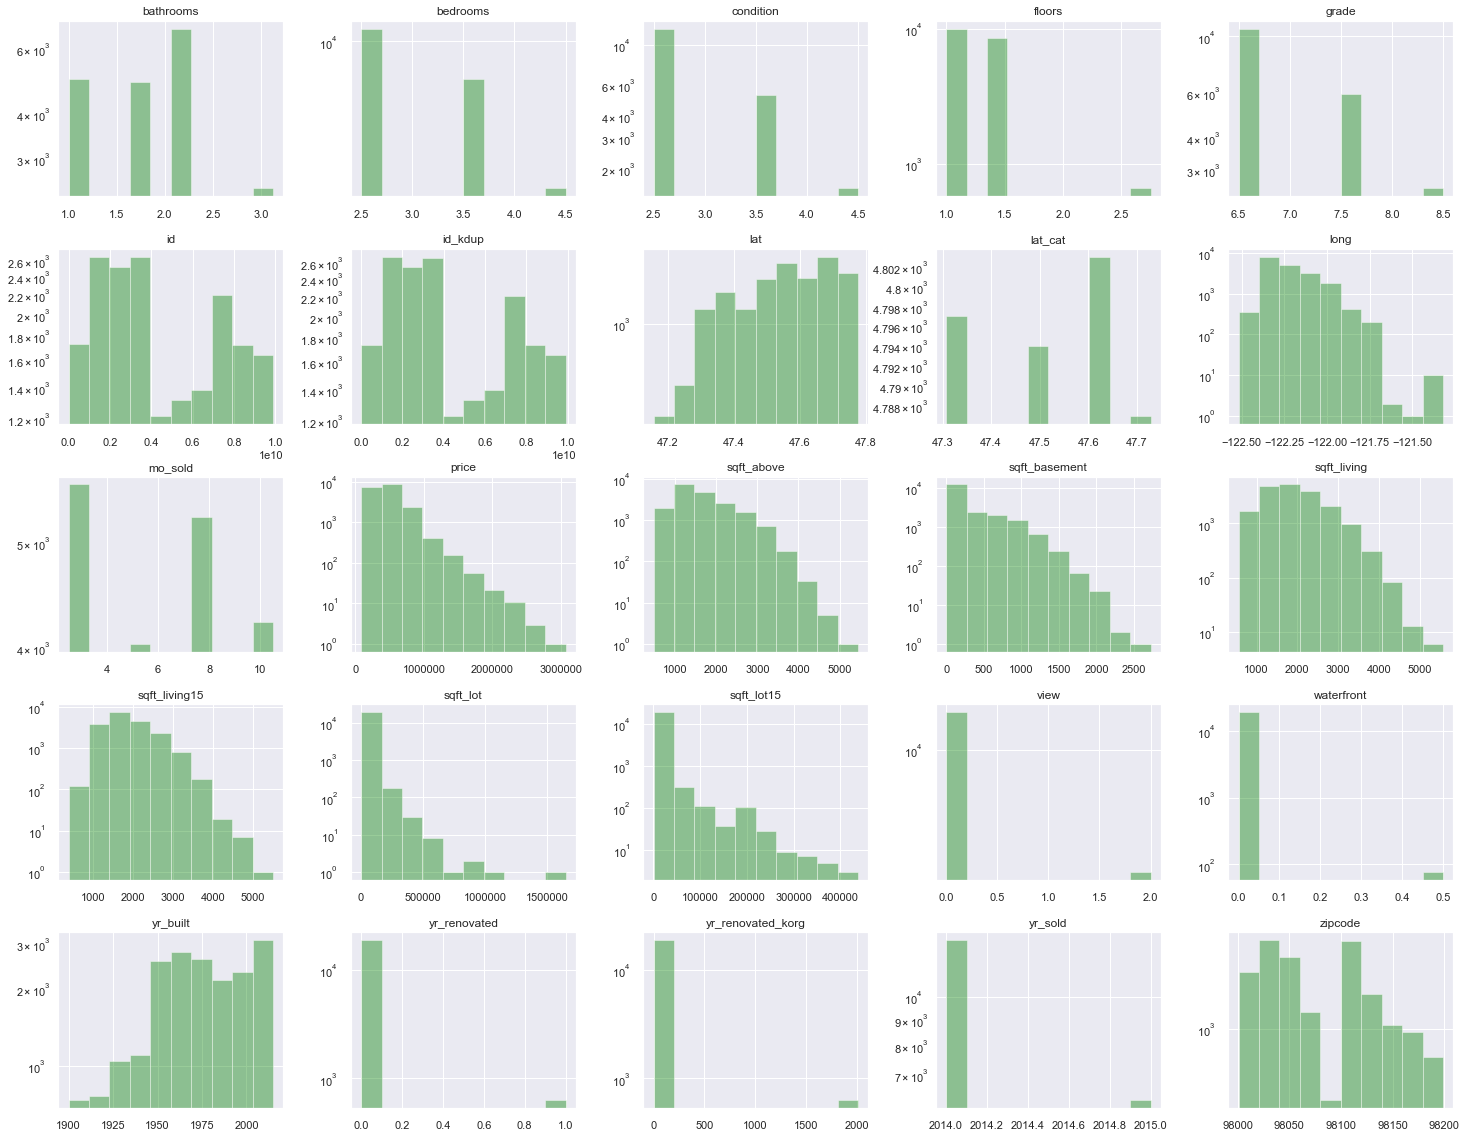

In [164]:
kc11.hist(figsize=(25,20), color='green', alpha=0.4, log=True)
plt.show()

##  inspect features

Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots for the nearest 15 neighbors

### continuous features

In [165]:
kc11.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_renovated_korg', 'id_kdup',
       'yr_sold', 'mo_sold', 'lat_cat'],
      dtype='object')

In [166]:
selcols = list(col for col in kc11.columns if (col != 'id') & (col != 'id_kdup'))
kc12 = kc11.loc[:, selcols]
kc12_cont = kc12.loc[:, (kc12.dtypes != 'object') & (kc12.nunique() > 5)]
print(kc12_cont.shape)
kc12_cont.head()

(19181, 12)


price  sqft_living  sqft_lot  sqft_above  sqft_basement  yr_built  \
0  221900.0         1180      5650        1180            0.0      1955   
1  538000.0         2570      7242        2170          400.0      1951   
2  180000.0          770     10000         770            0.0      1933   
3  604000.0         1960      5000        1050          910.0      1965   
4  510000.0         1680      8080        1680            0.0      1987   

   zipcode      lat     long  sqft_living15  sqft_lot15  yr_renovated_korg  
0    98178  47.5112 -122.257           1340        5650                0.0  
1    98125  47.7210 -122.319           1690        7639             1991.0  
2    98028  47.7379 -122.233           2720        8062                0.0  
3    98136  47.5208 -122.393           1360        5000                0.0  
4    98074  47.6168 -122.045           1800        7503                0.0

price
sqft_living
sqft_lot
sqft_above
sqft_basement
yr_built
zipcode
lat
long
sqft_living15
sqft_lot15
yr_renovated_korg


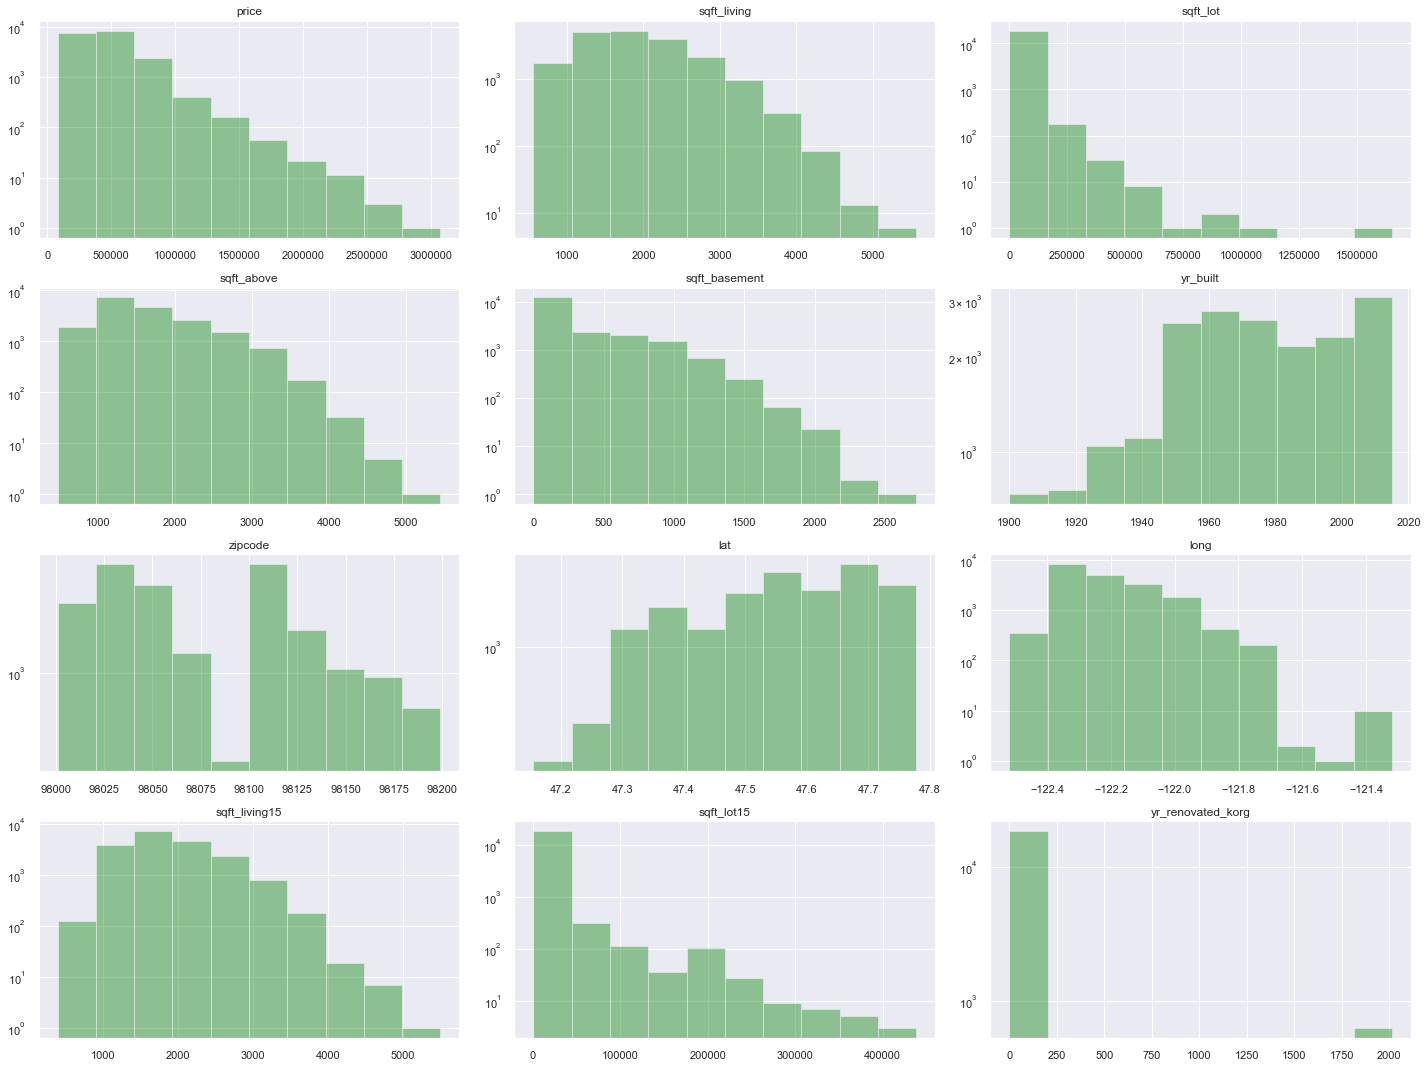

In [167]:
fig, axes = plt.subplots(nrows=kc12_cont.shape[1] // 3, ncols=3, figsize=(20,15))
continuous = list(col for col in kc12_cont.columns)
for xcol, ax in zip(continuous, axes.flatten()):
    print(xcol)
    ax.hist(kc12_cont[xcol], alpha=0.4, color='green')
    ax.set_title(xcol)
    ax.set_yscale('log')
    
fig.tight_layout()

In [168]:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15',
             'yr_built','yr_renovated_korg','zipcode','lat','long']
kc13_cont = kc12_cont.loc[:,cont_cols]
kc13_cont.head()

price  sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0  221900.0         1180      5650        1180            0.0           1340   
1  538000.0         2570      7242        2170          400.0           1690   
2  180000.0          770     10000         770            0.0           2720   
3  604000.0         1960      5000        1050          910.0           1360   
4  510000.0         1680      8080        1680            0.0           1800   

   sqft_lot15  yr_built  yr_renovated_korg  zipcode      lat     long  
0        5650      1955                0.0    98178  47.5112 -122.257  
1        7639      1951             1991.0    98125  47.7210 -122.319  
2        8062      1933                0.0    98028  47.7379 -122.233  
3        5000      1965                0.0    98136  47.5208 -122.393  
4        7503      1987                0.0    98074  47.6168 -122.045

#### feature engineering 

(19181, 11)


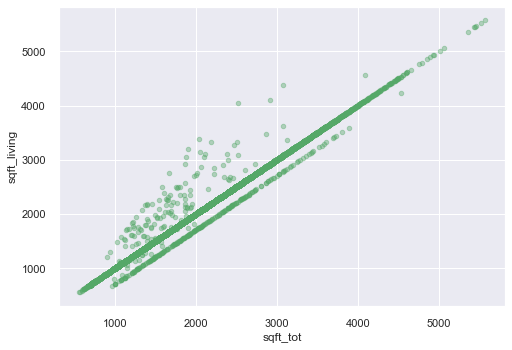

In [169]:
kc13_cont['sqft_tot'] = kc13_cont['sqft_above'] + kc13_cont['sqft_basement']
kc13_cont = kc13_cont.drop(['sqft_above','sqft_basement'],axis=1)
print(kc13_cont.shape)
kc13_cont.plot(kind='scatter',x='sqft_tot',y='sqft_living',c='g',alpha=0.4)

# categoricals features

In [170]:
kc11.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_renovated_korg', 'id_kdup',
       'yr_sold', 'mo_sold', 'lat_cat'],
      dtype='object')

In [171]:
cate_cols = ['price','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','mo_sold','lat_cat']
kc12_cate = kc11.loc[:, cate_cols]
print(kc12_cate.shape)
kc12_cate.head()

(19181, 11)


price  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  221900.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   
1  538000.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   
2  180000.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   
3  604000.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   
4  510000.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   

   yr_renovated  mo_sold  lat_cat  
0           0.0      2.5  47.3071  
1           1.0      2.5  47.3071  
2           0.0      2.5  47.3071  
3           0.0      2.5  47.3071  
4           0.0      2.5  47.3071

price
bedrooms
bathrooms
floors
waterfront
view
condition
grade
yr_renovated
mo_sold
lat_cat


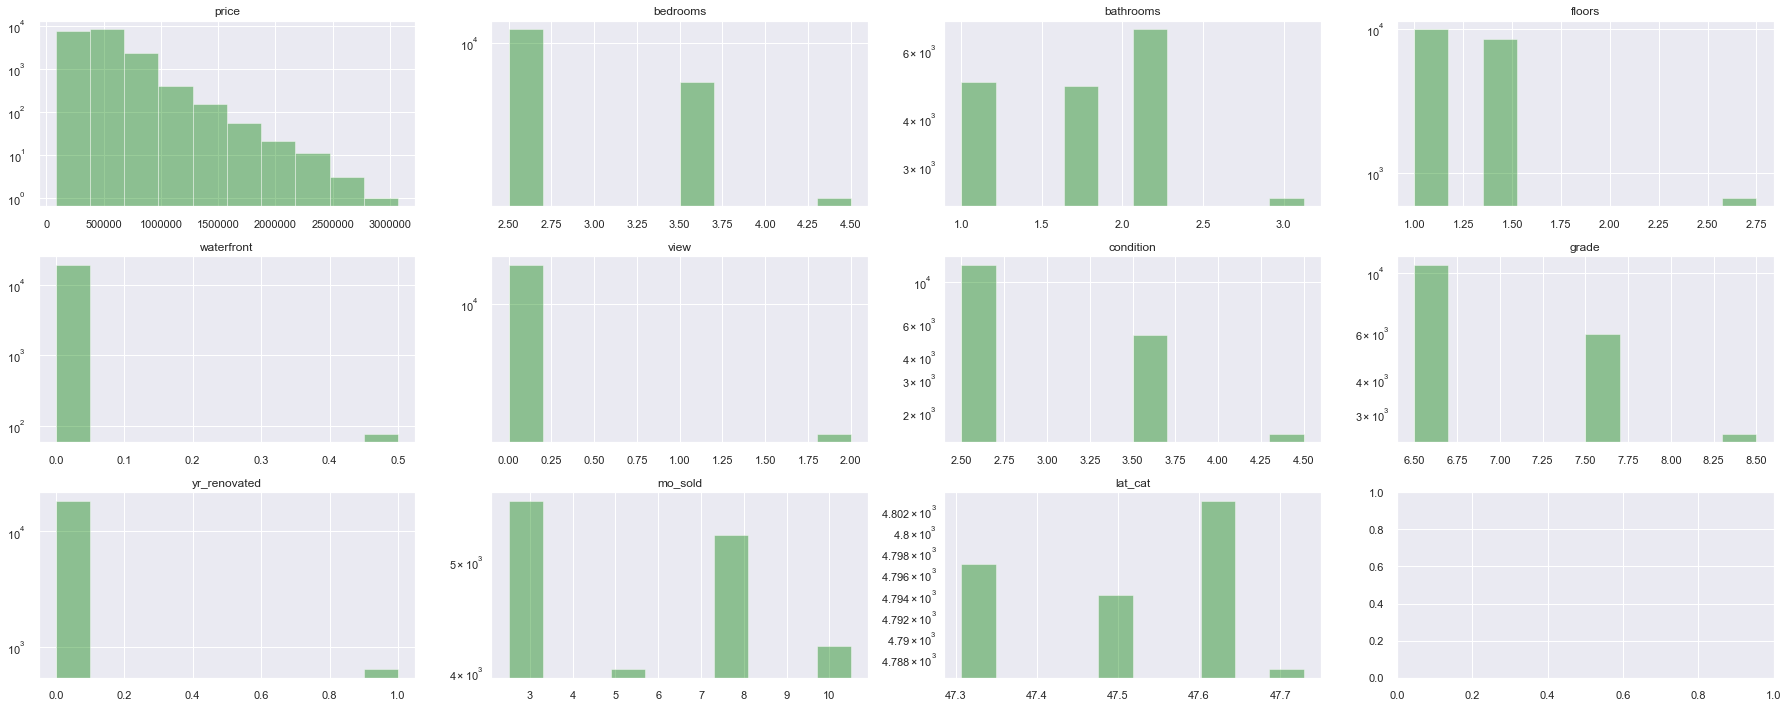

In [175]:
fig2, axes = plt.subplots(nrows=kc12_cate.shape[1] // 3, ncols=4, figsize=(25,10))
categorical = list(col for col in kc12_cate.columns)
for xcol, ax in zip(categorical, axes.flatten()):
    print(xcol)
    ax.hist(kc12_cate[xcol], alpha=0.4, color='green')
    ax.set_title(xcol)
    ax.set_yscale('log')
    
fig2.tight_layout()

## check linearity
### continuous features

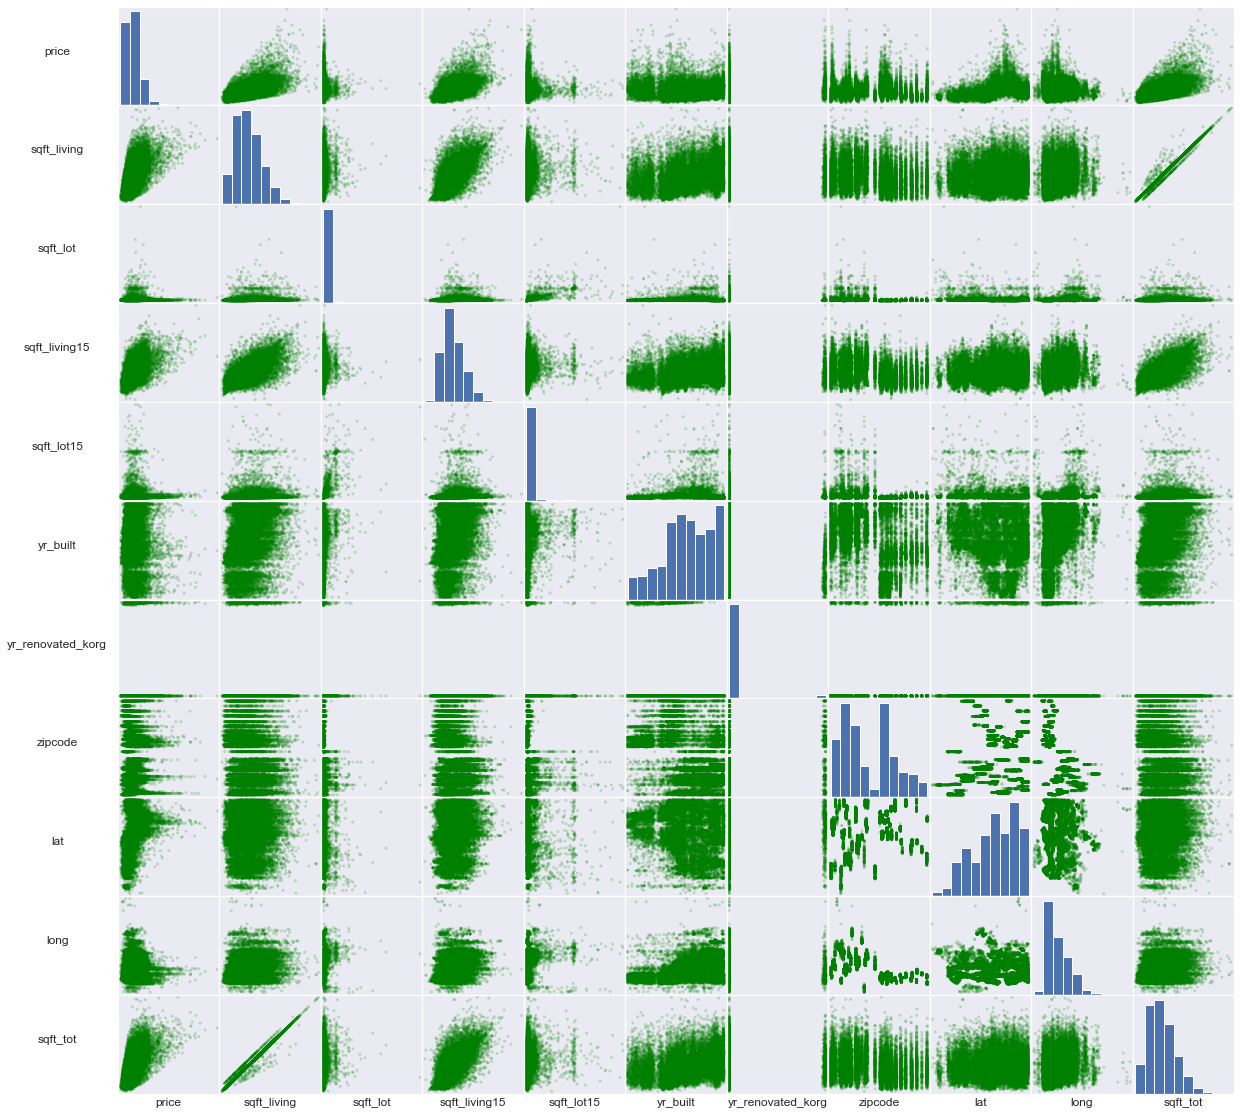

In [176]:
# Your code here 
sm = pd.plotting.scatter_matrix(kc13_cont, color='green', alpha=0.2, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [177]:
kc13_cont.corr()

price  sqft_living  sqft_lot  sqft_living15  sqft_lot15  \
price              1.000000     0.570973  0.054734       0.515259    0.044380   
sqft_living        0.570973     1.000000  0.135277       0.711138    0.147581   
sqft_lot           0.054734     0.135277  1.000000       0.136467    0.736559   
sqft_living15      0.515259     0.711138  0.136467       1.000000    0.167502   
sqft_lot15         0.044380     0.147581  0.736559       0.167502    1.000000   
yr_built          -0.058171     0.285264  0.031682       0.292383    0.050960   
yr_renovated_korg  0.137305     0.054650  0.015325       0.003147    0.014958   
zipcode            0.004620    -0.189493 -0.127058      -0.278469   -0.145172   
lat                0.400127     0.007660 -0.103420       0.013265   -0.105641   
long              -0.009857     0.246782  0.213005       0.334175    0.244263   
sqft_tot           0.569117     0.996477  0.134927       0.710896    0.147088   

                   yr_built  yr_renovated_korg   zipcode       lat      long  \
price             -0.058171           0.137305  0.004620  0.400127 -0.009857   
sqft_living        0.285264           0.054650 -0.189493  0.007660  0.246782   
sqft_lot           0.031682           0.015325 -0.127058 -0.103420  0.213005   
sqft_living15      0.292383           0.003147 -0.278469  0.013265  0.334175   
sqft_lot15         0.050960           0.014958 -0.145172 -0.105641  0.244263   
yr_built           1.000000          -0.199848 -0.343474 -0.175231  0.409663   
yr_renovated_korg -0.199848           1.000000  0.057903  0.028641 -0.053401   
zipcode           -0.343474           0.057903  1.000000  0.280721 -0.567935   
lat               -0.175231           0.028641  0.280721  1.000000 -0.153605   
long               0.409663          -0.053401 -0.567935 -0.153605  1.000000   
sqft_tot           0.287871           0.054342 -0.190480  0.006621  0.248790   

                   sqft_tot  
price              0.569117  
sqft_living        0.996477  
sqft_lot           0.134927  
sqft_living15      0.710896  
sqft_lot15         0.147088  
yr_built           0.287871  
yr_renovated_korg  0.054342  
zipcode           -0.190480  
lat                0.006621  
long               0.248790  
sqft_tot           1.000000

In [178]:
cc1_df = kc13_cont.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc1_df.head())
cc1_df['pairs'] = list(zip(cc1_df.level_0, cc1_df.level_1))
cc1pairs_df = cc1_df.set_index('pairs')
cc1pairs_df = cc1pairs_df.drop(['level_1', 'level_0'], axis=1)
cc1pairs_df.columns = ['cc']
cc1pairs_df = cc1pairs_df.drop_duplicates(keep='first')
cc1pairs_df.head()

              level_0            level_1         0
39      sqft_living15  yr_renovated_korg  0.003147
69  yr_renovated_korg      sqft_living15  0.003147
77            zipcode              price  0.004620
7               price            zipcode  0.004620
98                lat           sqft_tot  0.006621


cc
pairs                                       
(sqft_living15, yr_renovated_korg)  0.003147
(zipcode, price)                    0.004620
(lat, sqft_tot)                     0.006621
(sqft_living, lat)                  0.007660
(price, long)                       0.009857

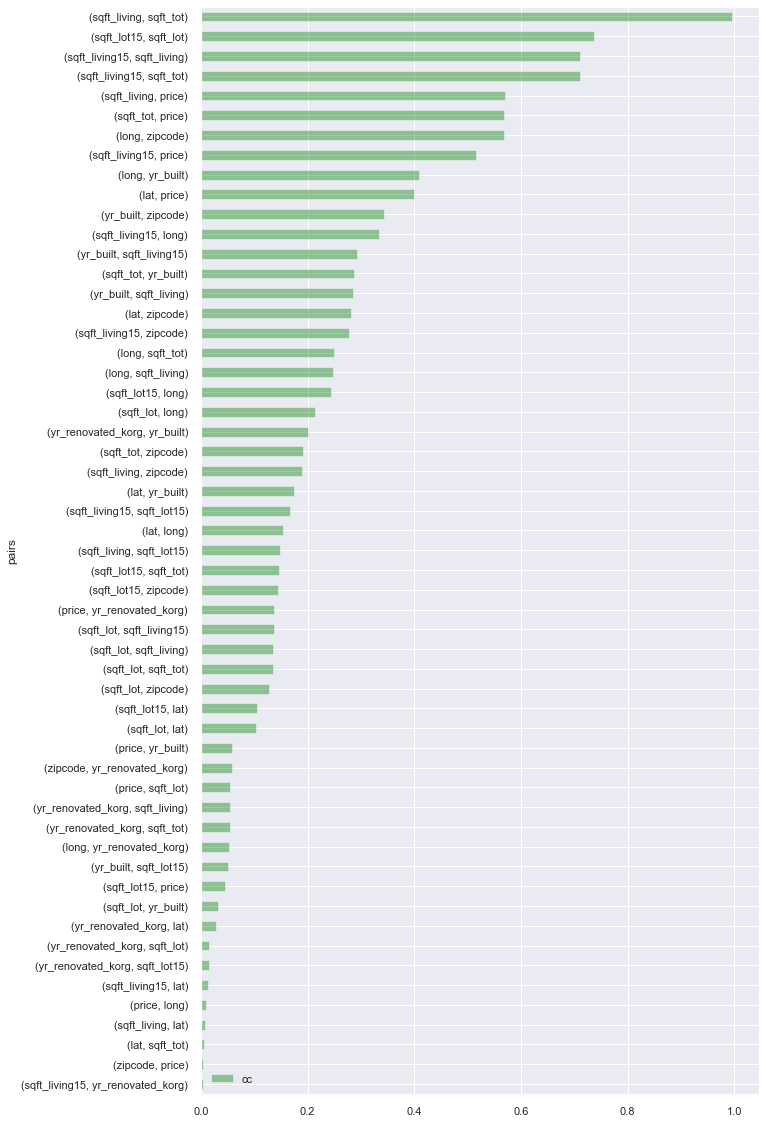

In [179]:
cc1pairs_update_df = cc1pairs_df[cc1pairs_df.cc<1]
cc1pairs_update_df.plot.barh(figsize=(10,20), color='green', alpha=0.4)

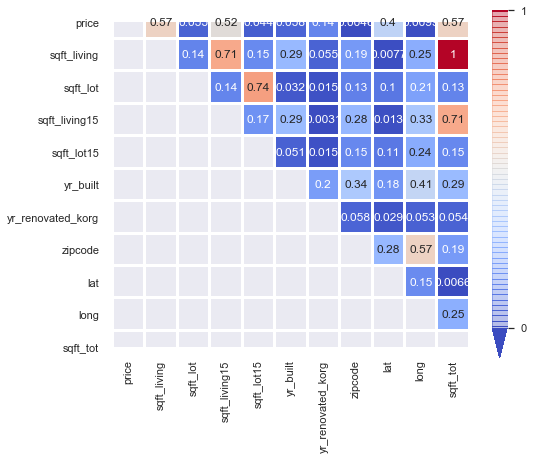

In [180]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc13_cont.corr().abs(), mask=np.tril(kc13_cont.corr().abs()), cmap='coolwarm', center=0.5, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

In [181]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(r"$\rho$ = " + str(round(r, 2)), xy=(.1, 1.), size=15, xycoords=ax.transAxes)
    ax.annotate(f"p = {p:.3f}", xy=(.6, 1.), size=15, xycoords=ax.transAxes)

In [182]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (.2, .95), size=20, xycoords = ax.transAxes)

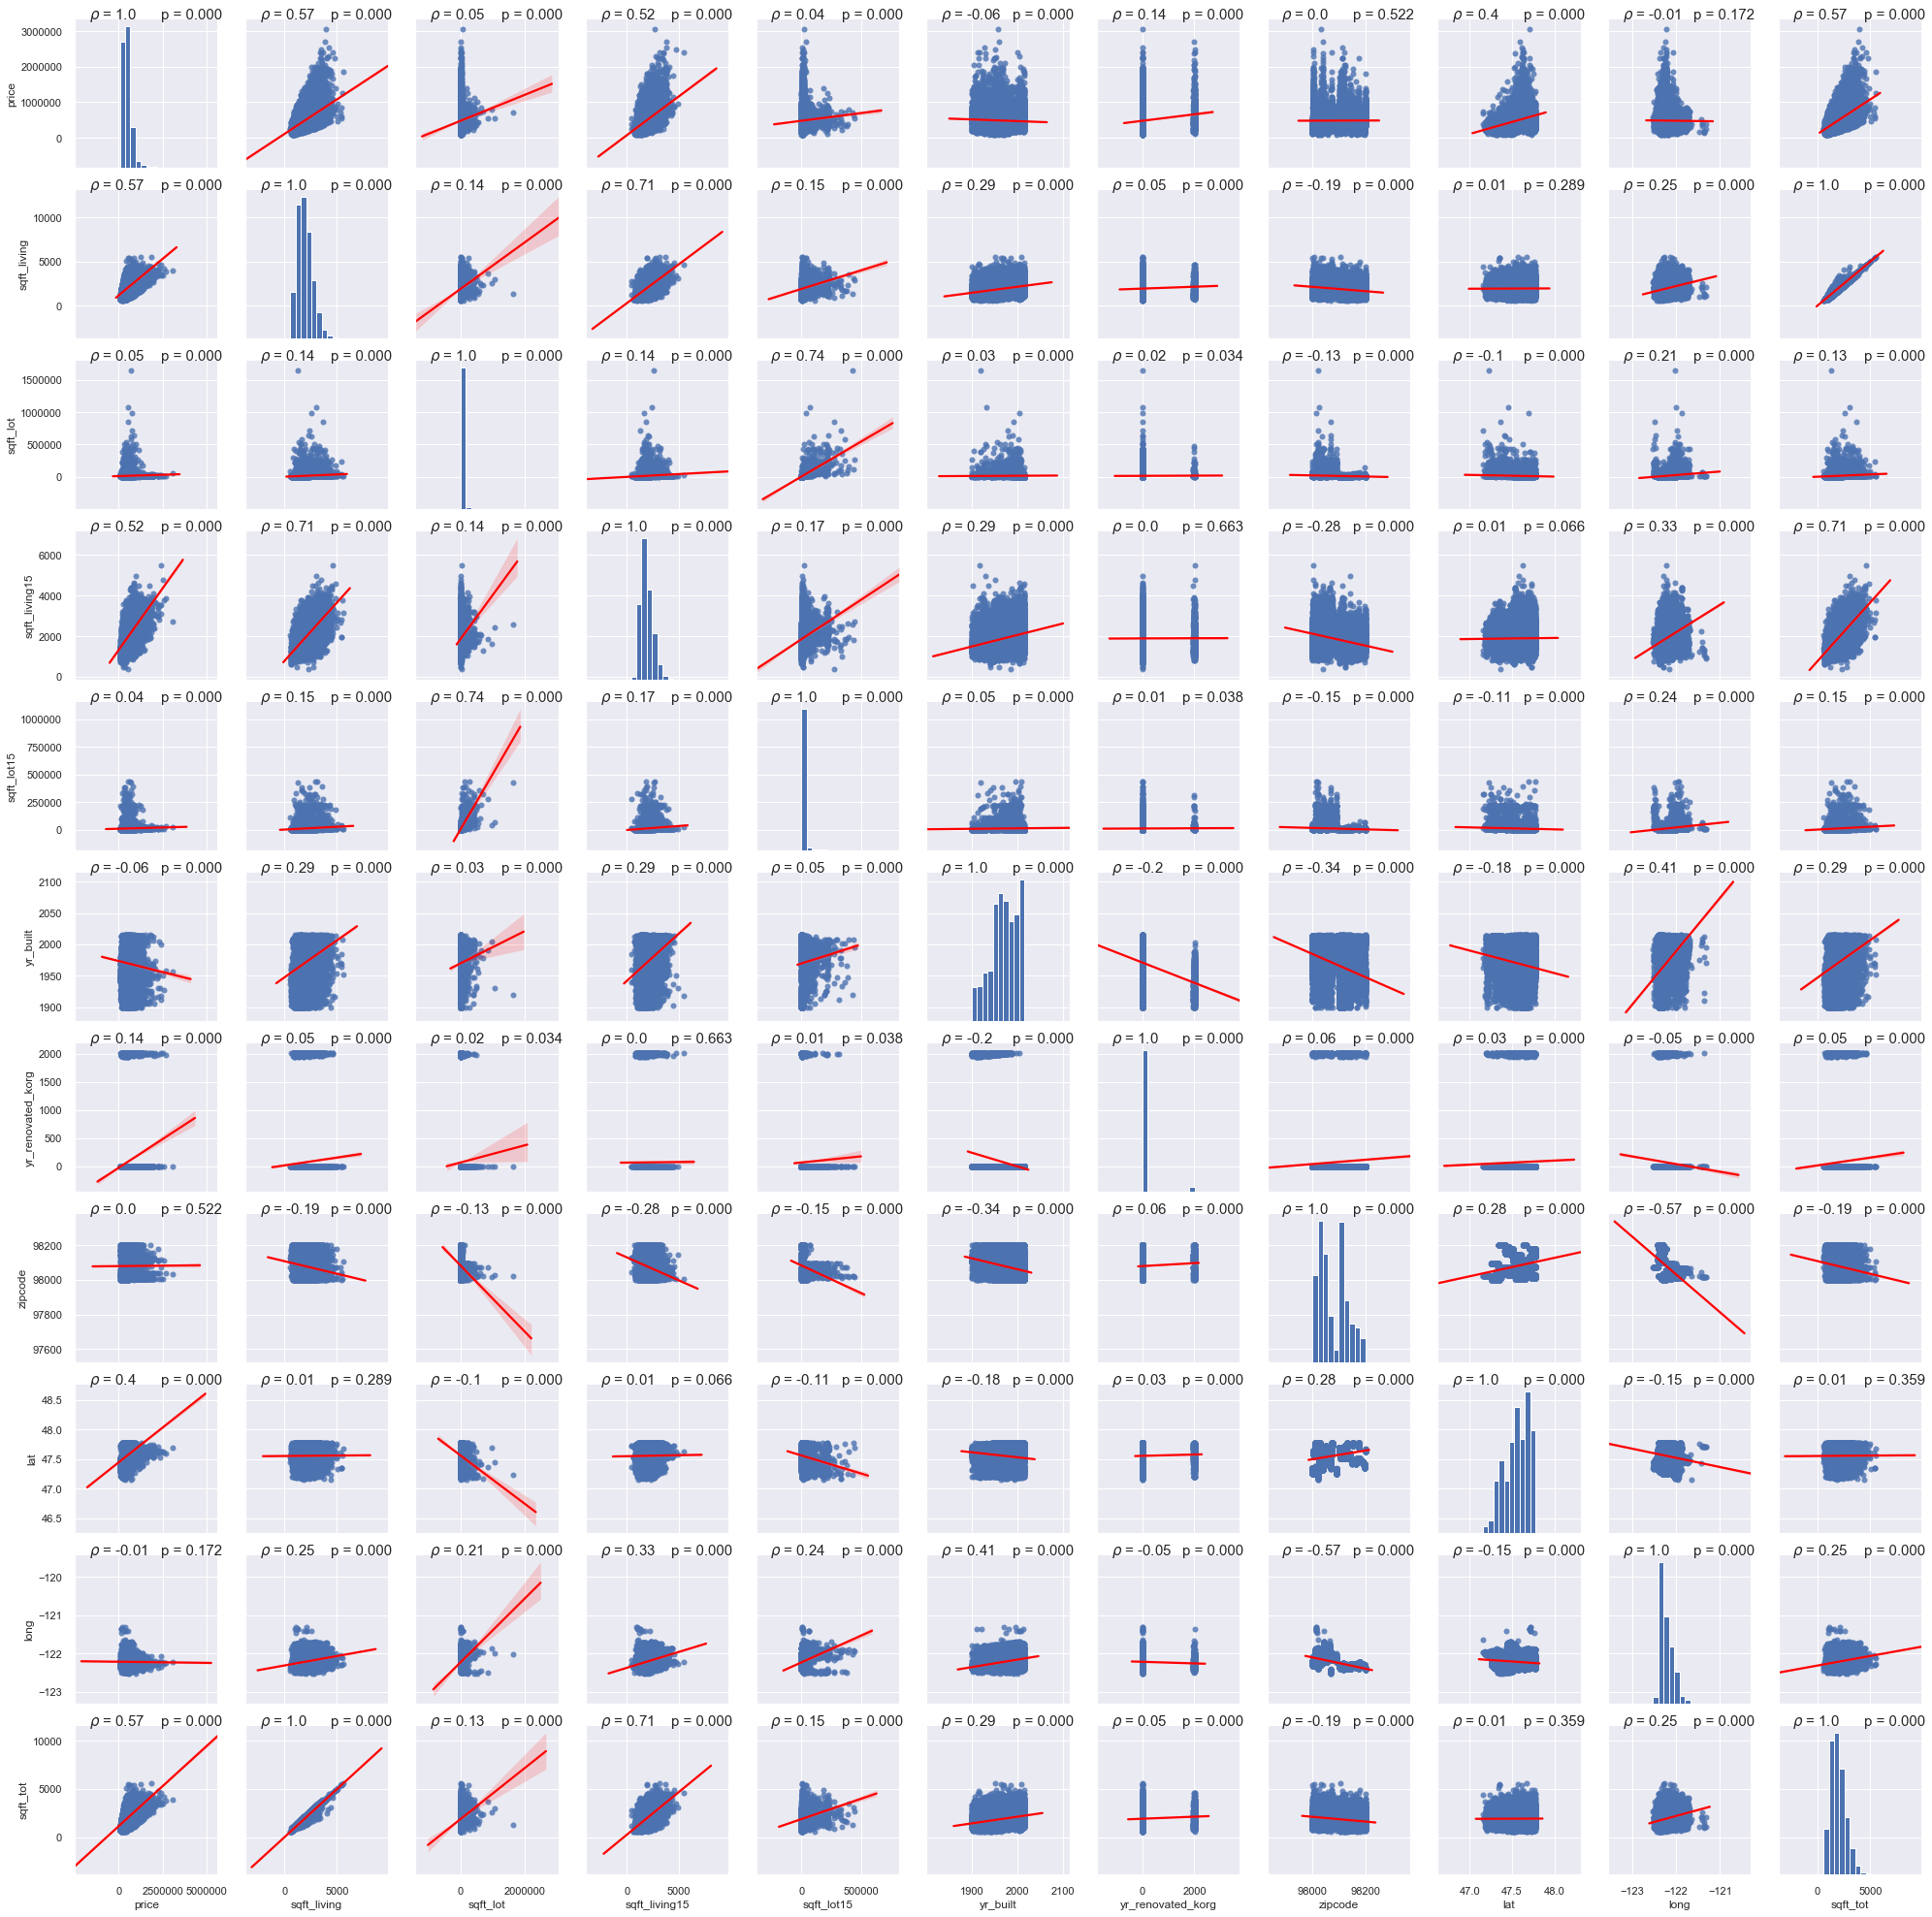

In [183]:
#cont_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15',
#             'yr_built','zipcode']
#cont_feats = ['price','sqft_living','sqft_lot','yr_built','zipcode']
cont_feats = list(kc13_cont.columns)
g = sns.pairplot(kc13_cont, vars = cont_feats, kind='reg', plot_kws={'line_kws':{'color':'red'}})
g.map(corrfunc)
plt.show()

### categorical features

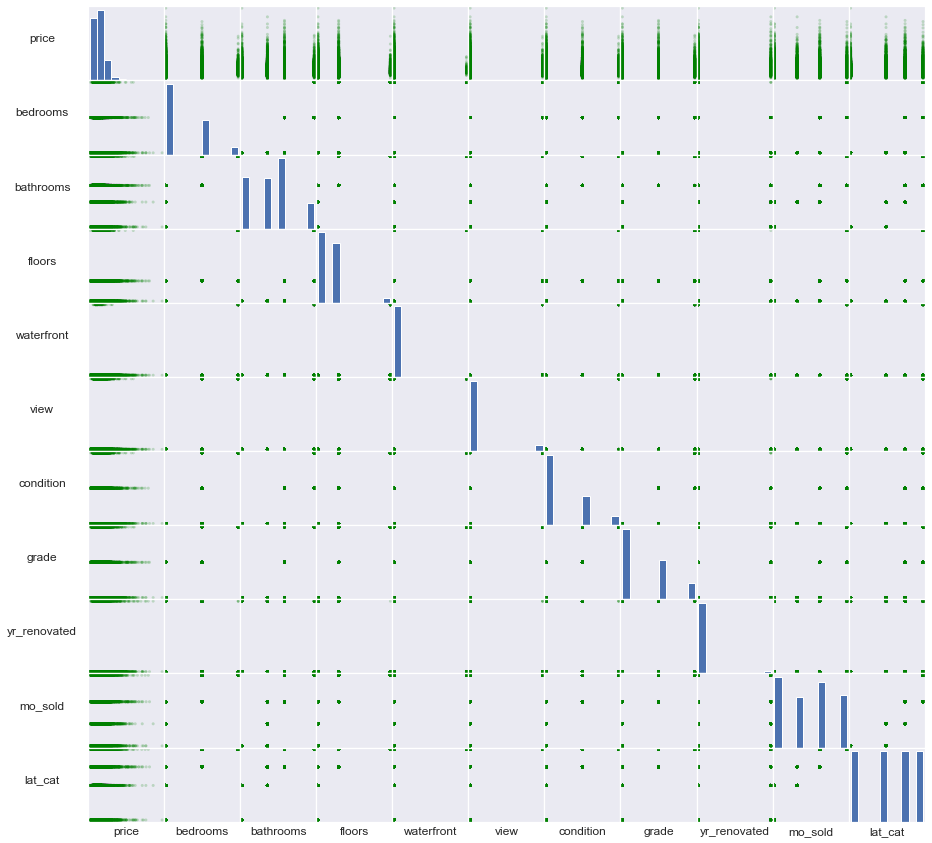

In [184]:
sm = pd.plotting.scatter_matrix(kc12_cate, color='green', alpha=0.2, figsize=[15, 15]);

# Rotates the text
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [185]:
kc12_cate.corr()

price  bedrooms  bathrooms    floors  waterfront      view  \
price         1.000000  0.025514   0.020055  0.022879    0.000799  0.031460   
bedrooms      0.025514  1.000000   0.772937  0.800595    0.160542  0.665332   
bathrooms     0.020055  0.772937   1.000000  0.761122    0.114150  0.530676   
floors        0.022879  0.800595   0.761122  1.000000    0.251346  0.604468   
waterfront    0.000799  0.160542   0.114150  0.251346    1.000000  0.215102   
view          0.031460  0.665332   0.530676  0.604468    0.215102  1.000000   
condition     0.028765  0.954688   0.769771  0.765845    0.155569  0.723234   
grade         0.025042  0.880968   0.875331  0.799472    0.126950  0.590184   
yr_renovated  0.136966 -0.024622  -0.020971 -0.020338   -0.011738 -0.050273   
mo_sold       0.016999  0.790790   0.927276  0.759611    0.092493  0.429994   
lat_cat       0.012798  0.714595   0.933924  0.698453    0.075365  0.350369   

              condition     grade  yr_renovated   mo_sold   lat_cat  
price          0.028765  0.025042      0.136966  0.016999  0.012798  
bedrooms       0.954688  0.880968     -0.024622  0.790790  0.714595  
bathrooms      0.769771  0.875331     -0.020971  0.927276  0.933924  
floors         0.765845  0.799472     -0.020338  0.759611  0.698453  
waterfront     0.155569  0.126950     -0.011738  0.092493  0.075365  
view           0.723234  0.590184     -0.050273  0.429994  0.350369  
condition      1.000000  0.875277     -0.027193  0.780914  0.698922  
grade          0.875277  1.000000     -0.021397  0.858470  0.774155  
yr_renovated  -0.027193 -0.021397      1.000000 -0.009485 -0.009244  
mo_sold        0.780914  0.858470     -0.009485  1.000000  0.943212  
lat_cat        0.698922  0.774155     -0.009244  0.943212  1.000000

In [186]:
cc2_df = kc12_cate.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc2_df.head())
cc2_df['pairs'] = list(zip(cc2_df.level_0, cc2_df.level_1))
cc2pairs_df = cc2_df.set_index('pairs')
cc2pairs_df = cc2pairs_df.drop(['level_1', 'level_0'], axis=1)
cc2pairs_df.columns = ['cc']
cc2pairs_df = cc2pairs_df.drop_duplicates(keep='first')
cc2pairs_df.head()

          level_0       level_1         0
44     waterfront         price  0.000799
4           price    waterfront  0.000799
98   yr_renovated       lat_cat  0.009244
118       lat_cat  yr_renovated  0.009244
97   yr_renovated       mo_sold  0.009485


cc
pairs                               
(waterfront, price)         0.000799
(yr_renovated, lat_cat)     0.009244
(yr_renovated, mo_sold)     0.009485
(waterfront, yr_renovated)  0.011738
(lat_cat, price)            0.012798

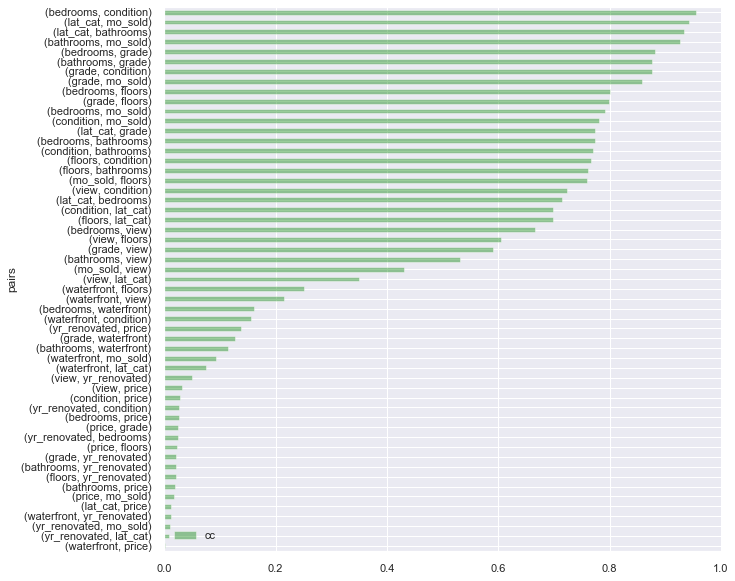

In [187]:
cc2pairs_update_df = cc2pairs_df[cc2pairs_df.cc<1]
cc2pairs_update_df.plot.barh(figsize=(10,10), color='green', alpha=0.4)

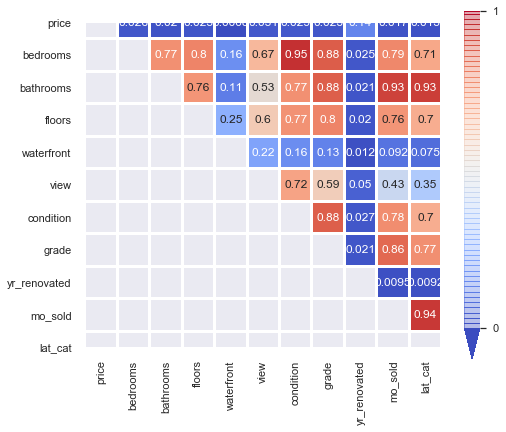

In [188]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc12_cate.corr().abs(), mask=np.tril(kc12_cate.corr().abs()), cmap='coolwarm', center=0.5, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

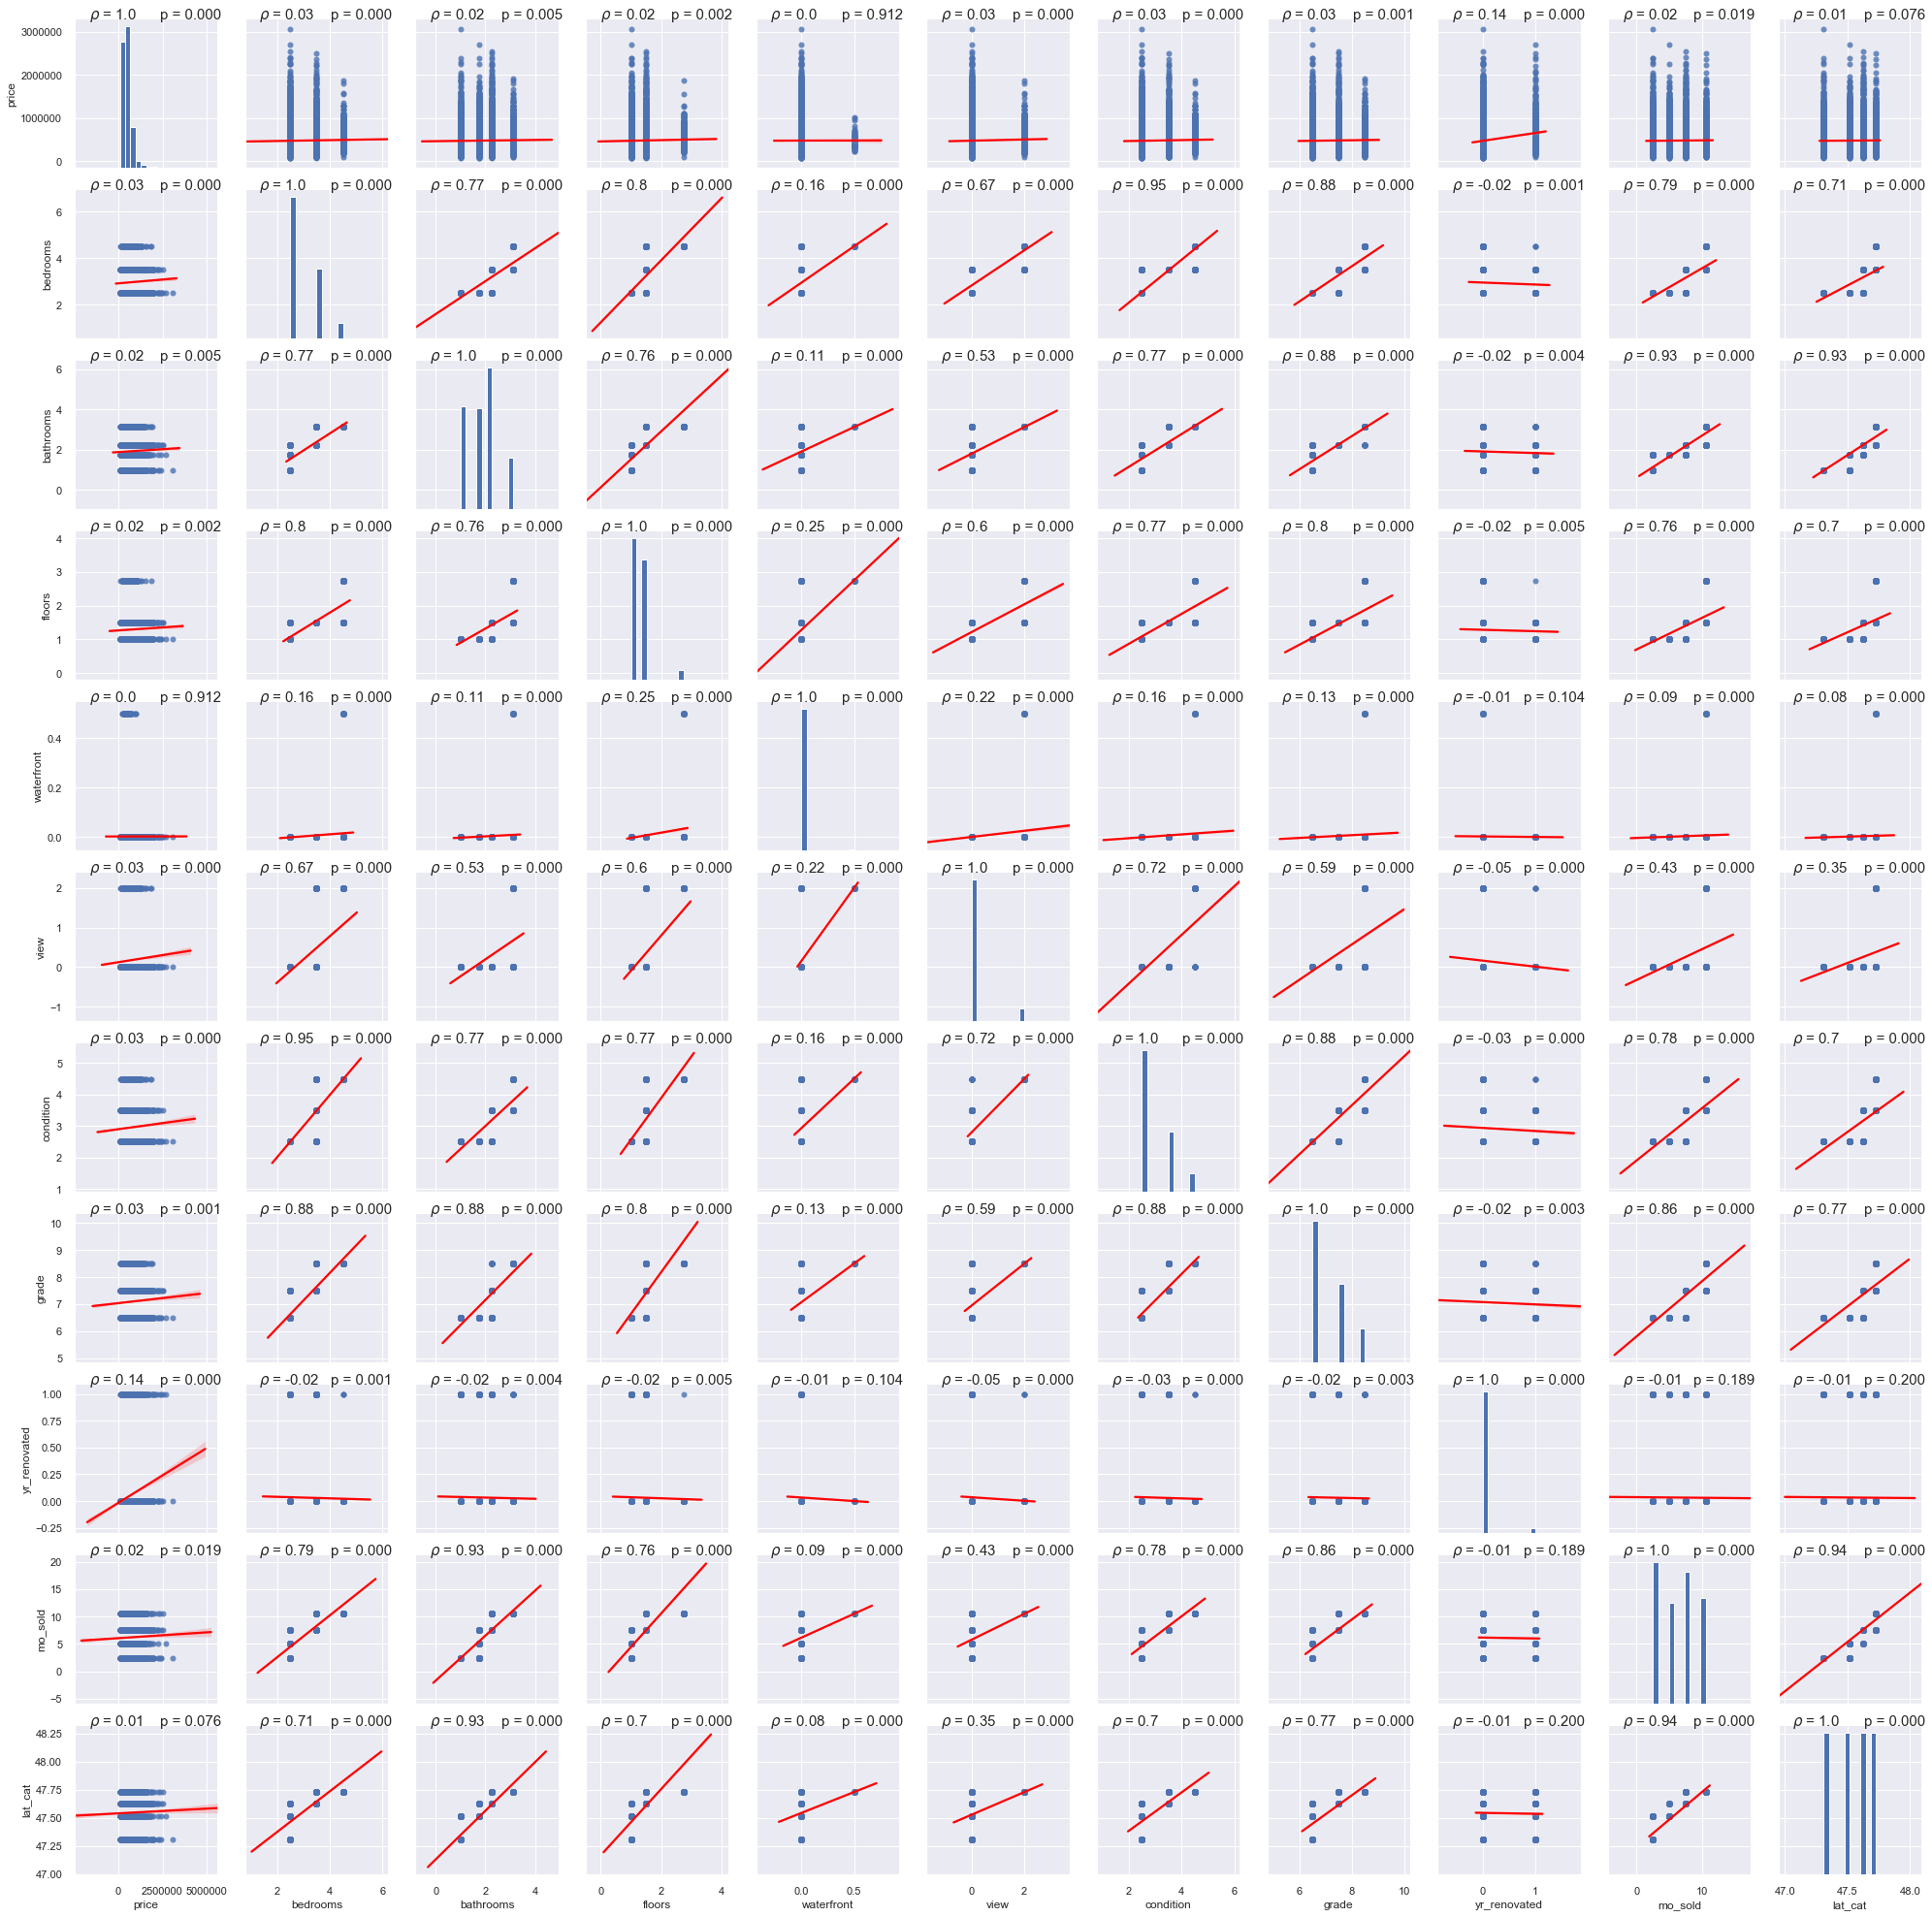

In [189]:
#cate_feats = ['price','bathrooms','view','grade']
cate_feats = list(kc12_cate.columns)
g = sns.pairplot(kc12_cate, vars = cate_feats, kind='reg', plot_kws={'line_kws':{'color':'red'}})
g.map(corrfunc)
plt.show()

## all features

In [190]:
kc11['sqft_tot'] = kc11['sqft_above'] + kc11['sqft_basement']
kc11 = kc11.drop(['sqft_above','sqft_basement'],axis=1)

In [191]:
all_feats = cate_feats + cont_feats
print(all_feats)
kc12_all = kc11.loc[:, all_feats]
kc12_all = kc12_all.loc[:,~kc12_all.columns.duplicated()]
print(kc12_all.shape)
kc12_all.head()

['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'mo_sold', 'lat_cat', 'price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated_korg', 'zipcode', 'lat', 'long', 'sqft_tot']
(19181, 21)


price  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  221900.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   
1  538000.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   
2  180000.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   
3  604000.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   
4  510000.0       2.5        1.0     1.0         0.0   0.0        2.5    6.5   

   yr_renovated  mo_sold  ...  sqft_living  sqft_lot  sqft_living15  \
0           0.0      2.5  ...         1180      5650           1340   
1           1.0      2.5  ...         2570      7242           1690   
2           0.0      2.5  ...          770     10000           2720   
3           0.0      2.5  ...         1960      5000           1360   
4           0.0      2.5  ...         1680      8080           1800   

   sqft_lot15  yr_built  yr_renovated_korg  zipcode      lat     long  \
0        5650      1955                0.0    98178  47.5112 -122.257   
1        7639      1951             1991.0    98125  47.7210 -122.319   
2        8062      1933                0.0    98028  47.7379 -122.233   
3        5000      1965                0.0    98136  47.5208 -122.393   
4        7503      1987                0.0    98074  47.6168 -122.045   

   sqft_tot  
0    1180.0  
1    2570.0  
2     770.0  
3    1960.0  
4    1680.0  

[5 rows x 21 columns]

In [192]:
kc12_all.corr()

price  bedrooms  bathrooms    floors  waterfront  \
price              1.000000  0.025514   0.020055  0.022879    0.000799   
bedrooms           0.025514  1.000000   0.772937  0.800595    0.160542   
bathrooms          0.020055  0.772937   1.000000  0.761122    0.114150   
floors             0.022879  0.800595   0.761122  1.000000    0.251346   
waterfront         0.000799  0.160542   0.114150  0.251346    1.000000   
view               0.031460  0.665332   0.530676  0.604468    0.215102   
condition          0.028765  0.954688   0.769771  0.765845    0.155569   
grade              0.025042  0.880968   0.875331  0.799472    0.126950   
yr_renovated       0.136966 -0.024622  -0.020971 -0.020338   -0.011738   
mo_sold            0.016999  0.790790   0.927276  0.759611    0.092493   
lat_cat            0.012798  0.714595   0.933924  0.698453    0.075365   
sqft_living        0.570973  0.063018   0.048923  0.051044    0.000251   
sqft_lot           0.054734 -0.042464  -0.038420 -0.038898   -0.017445   
sqft_living15      0.515259  0.039115   0.026204  0.033743   -0.003310   
sqft_lot15         0.044380 -0.049046  -0.041086 -0.038597   -0.020210   
yr_built          -0.058171  0.272129   0.234706  0.243332    0.084170   
yr_renovated_korg  0.137305 -0.024603  -0.020993 -0.020347   -0.011738   
zipcode            0.004620 -0.002968   0.002360 -0.002021    0.015010   
lat                0.400127 -0.006672  -0.001653 -0.005690   -0.001789   
long              -0.009857  0.015835   0.010229  0.014240   -0.018366   
sqft_tot           0.569117  0.064335   0.050465  0.052542    0.000550   

                       view  condition     grade  yr_renovated   mo_sold  ...  \
price              0.031460   0.028765  0.025042      0.136966  0.016999  ...   
bedrooms           0.665332   0.954688  0.880968     -0.024622  0.790790  ...   
bathrooms          0.530676   0.769771  0.875331     -0.020971  0.927276  ...   
floors             0.604468   0.765845  0.799472     -0.020338  0.759611  ...   
waterfront         0.215102   0.155569  0.126950     -0.011738  0.092493  ...   
view               1.000000   0.723234  0.590184     -0.050273  0.429994  ...   
condition          0.723234   1.000000  0.875277     -0.027193  0.780914  ...   
grade              0.590184   0.875277  1.000000     -0.021397  0.858470  ...   
yr_renovated      -0.050273  -0.027193 -0.021397      1.000000 -0.009485  ...   
mo_sold            0.429994   0.780914  0.858470     -0.009485  1.000000  ...   
lat_cat            0.350369   0.698922  0.774155     -0.009244  0.943212  ...   
sqft_living        0.086171   0.066099  0.056716      0.054441  0.035820  ...   
sqft_lot          -0.057476  -0.051994 -0.035572      0.015456 -0.030729  ...   
sqft_living15      0.065218   0.041383  0.032110      0.003114  0.013322  ...   
sqft_lot15        -0.063433  -0.057575 -0.042768      0.015068 -0.031976  ...   
yr_built           0.392846   0.294976  0.253134     -0.200140  0.185089  ...   
yr_renovated_korg -0.050242  -0.027139 -0.021393      0.999967 -0.009506  ...   
zipcode           -0.005726  -0.001559  0.002915      0.057906  0.001316  ...   
lat               -0.012401  -0.004456 -0.002642      0.028610  0.000436  ...   
long               0.028863   0.014595  0.013352     -0.053389  0.007291  ...   
sqft_tot           0.087320   0.067509  0.058186      0.054141  0.037177  ...   

                   sqft_living  sqft_lot  sqft_living15  sqft_lot15  yr_built  \
price                 0.570973  0.054734       0.515259    0.044380 -0.058171   
bedrooms              0.063018 -0.042464       0.039115   -0.049046  0.272129   
bathrooms             0.048923 -0.038420       0.026204   -0.041086  0.234706   
floors                0.051044 -0.038898       0.033743   -0.038597  0.243332   
waterfront            0.000251 -0.017445      -0.003310   -0.020210  0.084170   
view                  0.086171 -0.057476       0.065218   -0.063433  0.392846   
condition             0.066099 -0.051994   

In [193]:
cc3_df = kc12_all.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc3_df.head())
cc3_df['pairs'] = list(zip(cc3_df.level_0, cc3_df.level_1))
cc3pairs_df = cc3_df.set_index('pairs')
cc3pairs_df = cc3pairs_df.drop(['level_1', 'level_0'], axis=1)
cc3pairs_df.columns = ['cc']
cc3pairs_df = cc3pairs_df.drop_duplicates(keep='first')
cc3pairs_df.head()

         level_0      level_1         0
95    waterfront  sqft_living  0.000251
235  sqft_living   waterfront  0.000251
207      mo_sold          lat  0.000436
387          lat      mo_sold  0.000436
367      zipcode      lat_cat  0.000515


cc
pairs                              
(waterfront, sqft_living)  0.000251
(mo_sold, lat)             0.000436
(zipcode, lat_cat)         0.000515
(sqft_tot, waterfront)     0.000550
(waterfront, price)        0.000799

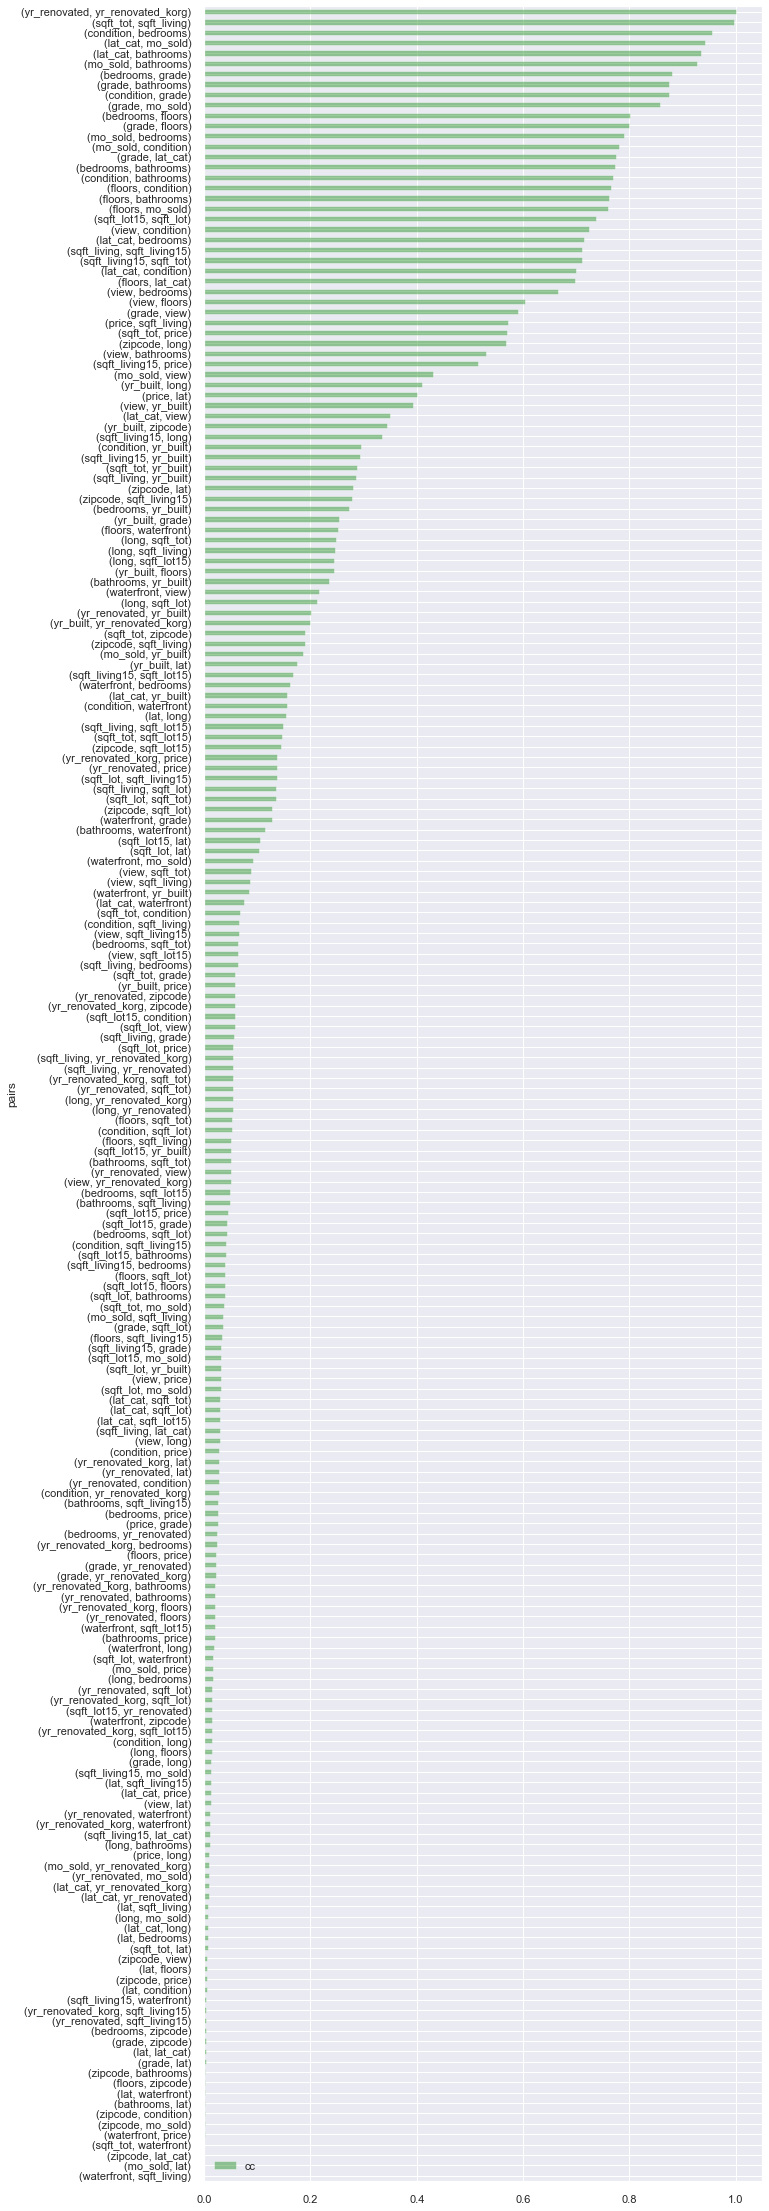

In [194]:
cc3pairs_update_df = cc3pairs_df[cc3pairs_df.cc<1]
cc3pairs_update_df.plot.barh(figsize=(10,40), color='green', alpha=0.4)

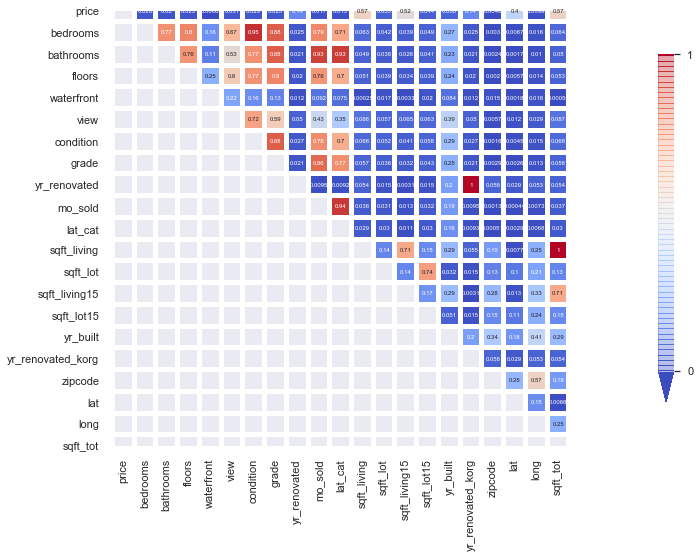

In [195]:
plt.figure(figsize=(32,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc12_all.corr().abs(), mask=np.tril(kc12_all.corr().abs()), cmap="coolwarm", center=0.5, linewidths=4, square= True, annot=True, annot_kws={"fontsize":6}, cbar_kws=cbar_kws)
plt.show()

## EDA Q1:Does season affect house tours?
## EDA Q2:Does maintenance condition affect house tours?
## EDA Q3: Does season affect buyers' decision-making behaviors?

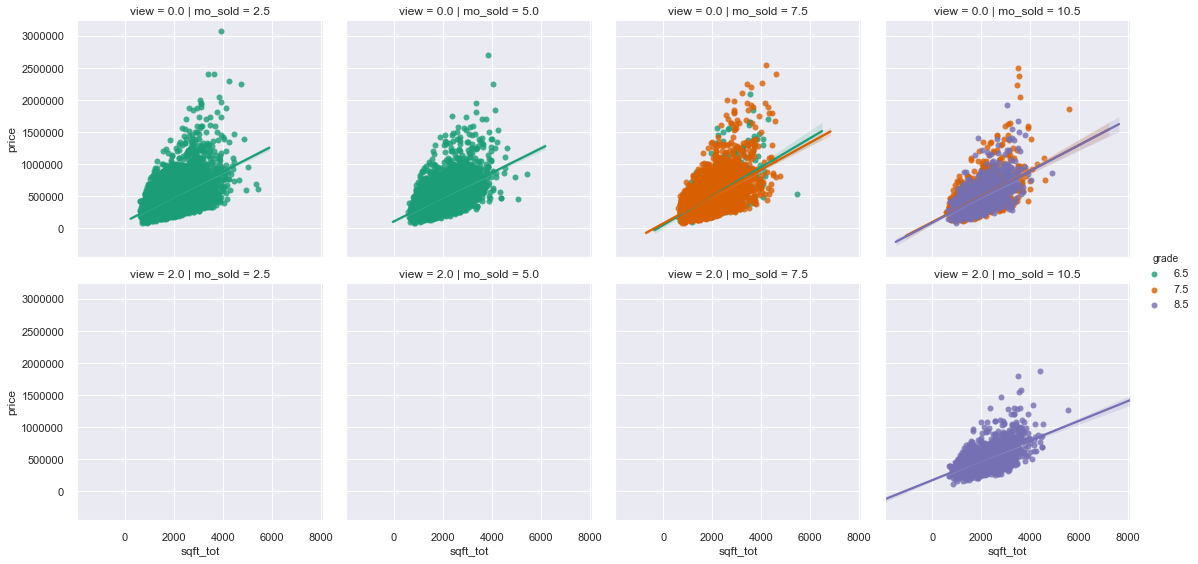

In [196]:
sns.lmplot(x ='sqft_tot', y ='price', row='view', col='mo_sold', data = kc12_all, hue='grade', height=4, aspect=1, palette='Dark2', fit_reg=True) 

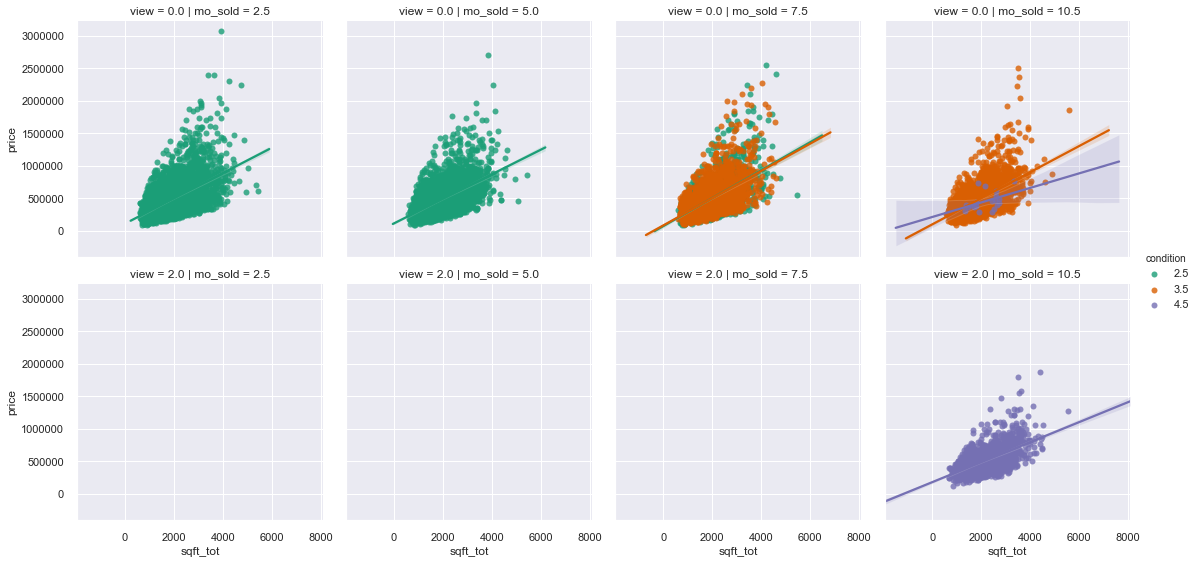

In [197]:
sns.lmplot(x ='sqft_tot', y ='price', row='view', col='mo_sold', data = kc12_all, hue='condition', height=4, aspect=1, palette='Dark2', fit_reg=True) 

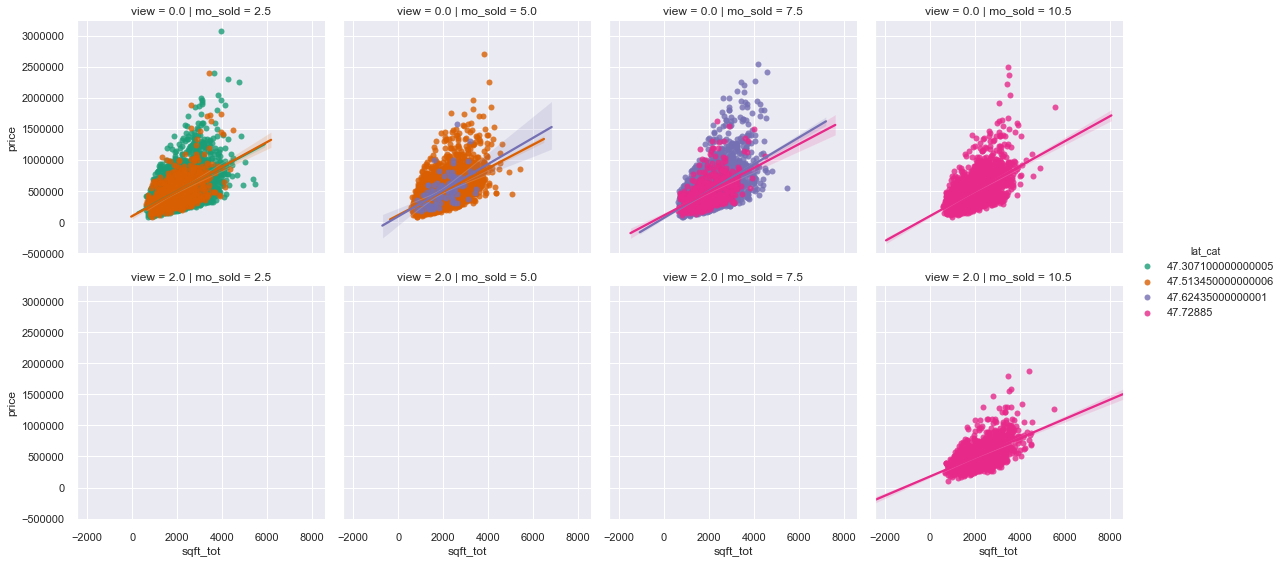

In [198]:
sns.lmplot(x ='sqft_tot', y ='price', row='view', col='mo_sold', data = kc12_all, hue='lat_cat', height=4, aspect=1, palette='Dark2', fit_reg=True) 

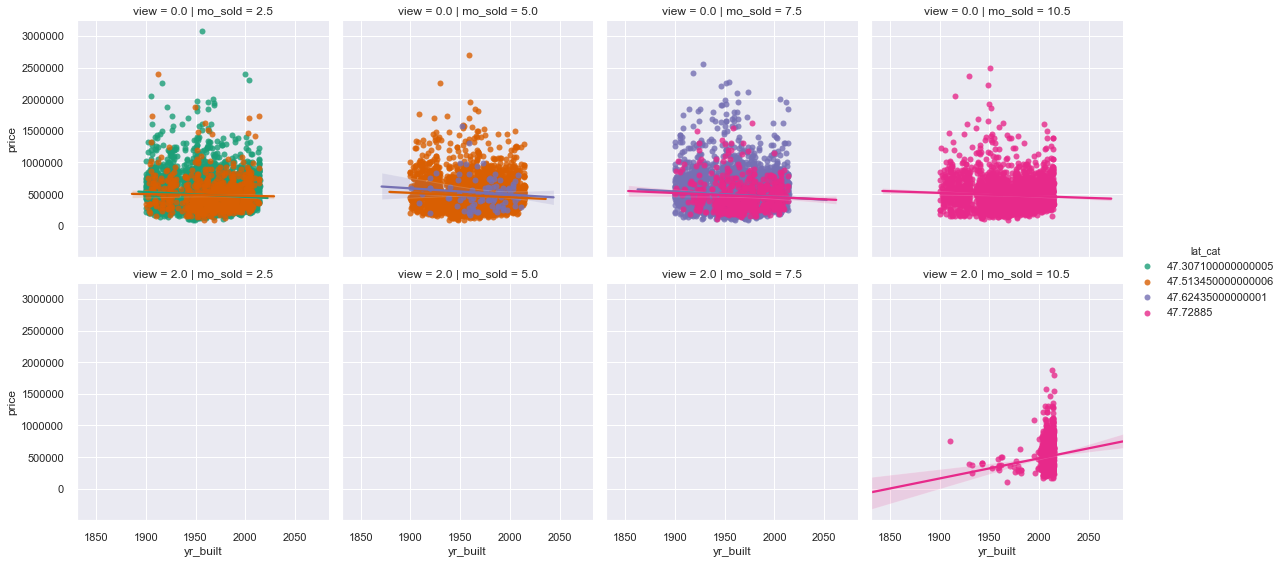

In [200]:
sns.lmplot(x ='yr_built', y ='price', row='view', col='mo_sold', data = kc12_all, hue='lat_cat', height=4, aspect=1, palette='Dark2', fit_reg=True) 

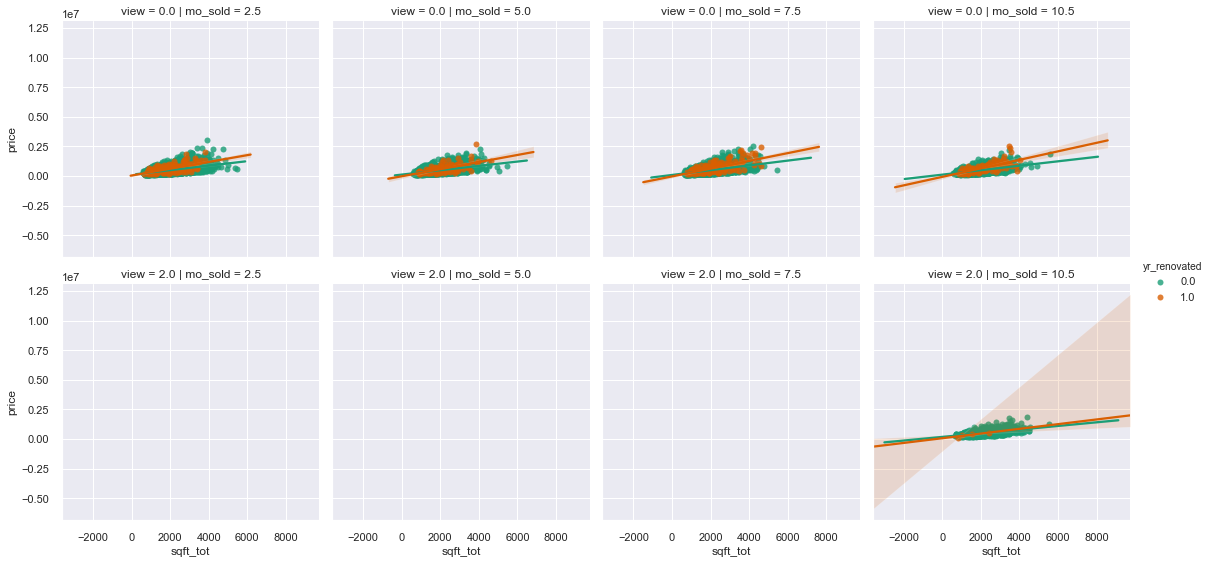

In [208]:
sns.lmplot(x ='sqft_tot', y ='price', row='view', col='mo_sold', data = kc12_all, hue='yr_renovated', height=4, aspect=1, palette='Dark2', fit_reg=True) 

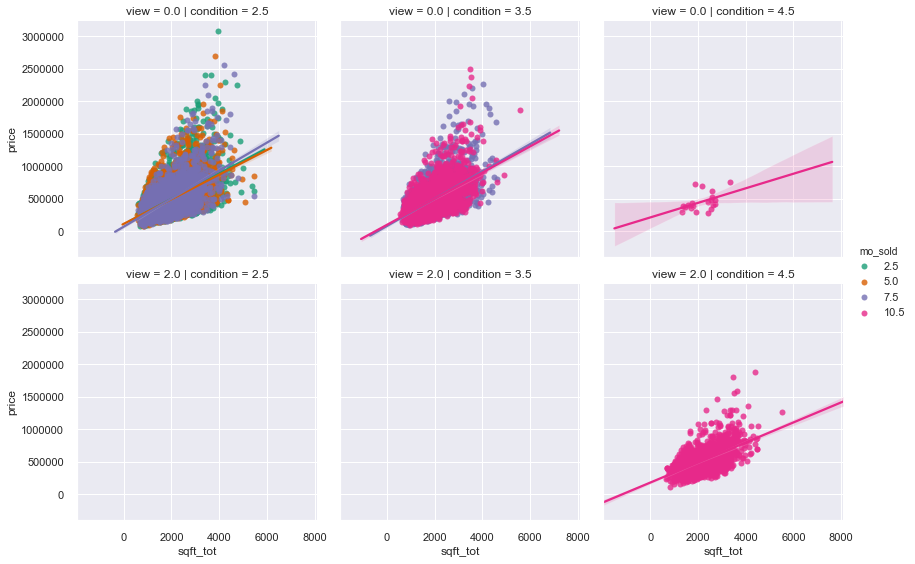

In [209]:
sns.lmplot(x ='sqft_tot', y ='price', row='view', col='condition', data = kc12_all, hue='mo_sold', height=4, aspect=1, palette='Dark2', fit_reg=True) 

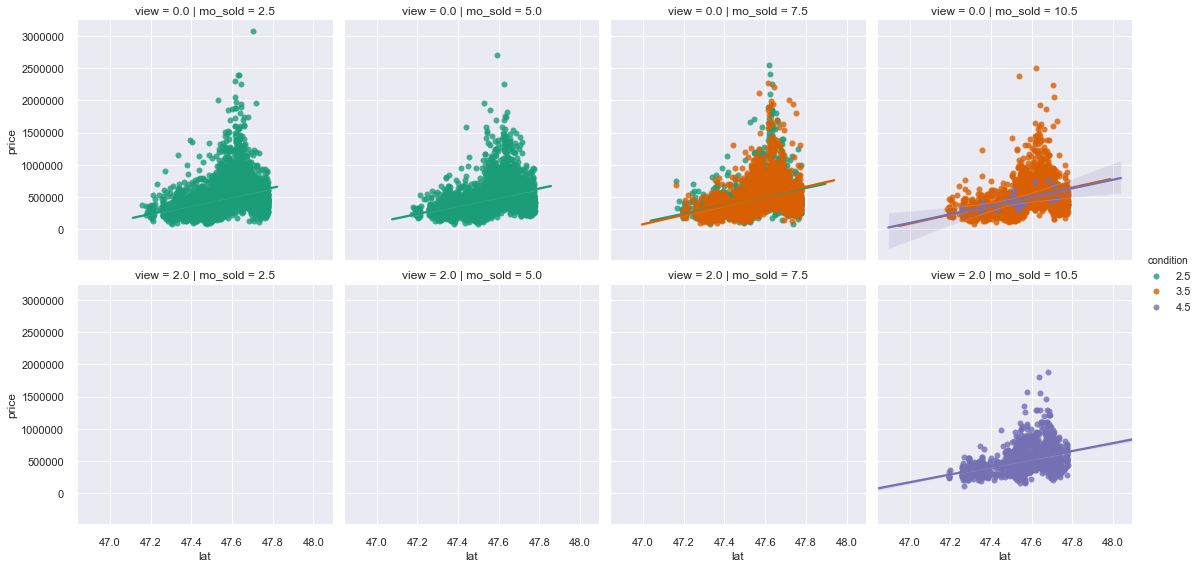

In [108]:
sns.lmplot(x ='lat', y ='price', row='view', col='mo_sold', data = kc12_all, hue='condition', height=4, aspect=1, palette='Dark2', fit_reg=True) 

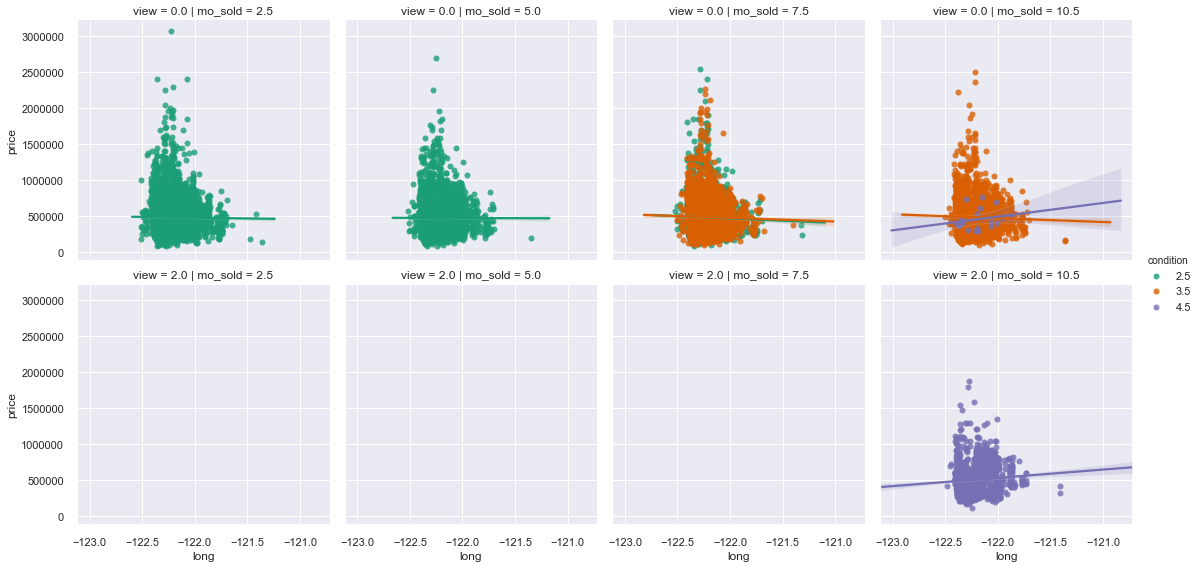

In [109]:
sns.lmplot(x ='long', y ='price', row='view', col='mo_sold', data = kc12_all, hue='condition', height=4, aspect=1, palette='Dark2', fit_reg=True) 

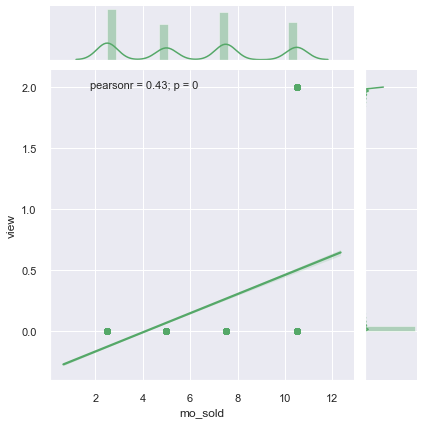

In [93]:
j = sns.jointplot(x='mo_sold', y='view', data=kc12_all, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

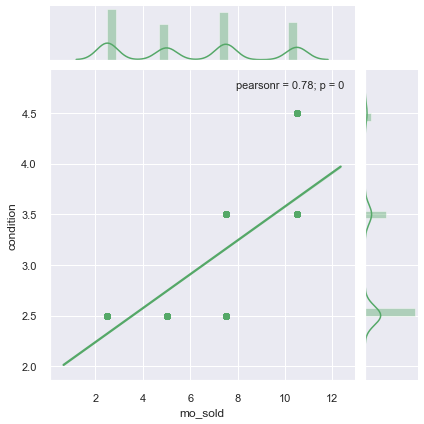

In [94]:
j = sns.jointplot(x='mo_sold', y='condition', data=kc12_all, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

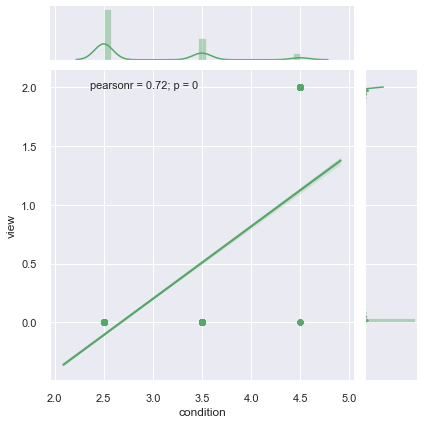

In [95]:
j = sns.jointplot(x='condition', y='view', data=kc12_all, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

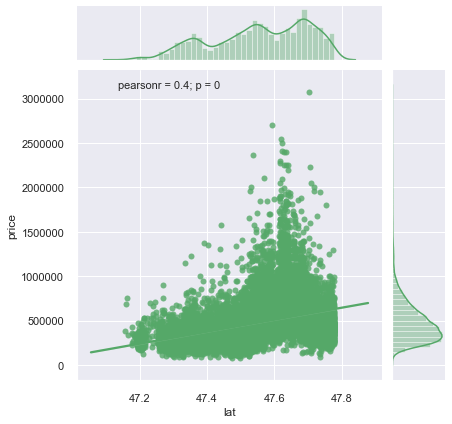

In [102]:
j = sns.jointplot(x='lat', y='price', data=kc12_all, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

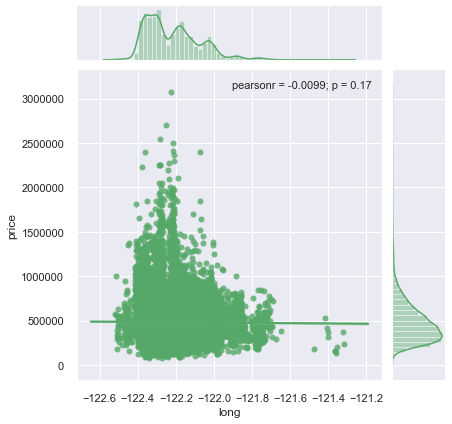

In [103]:
j = sns.jointplot(x='long', y='price', data=kc12_all, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

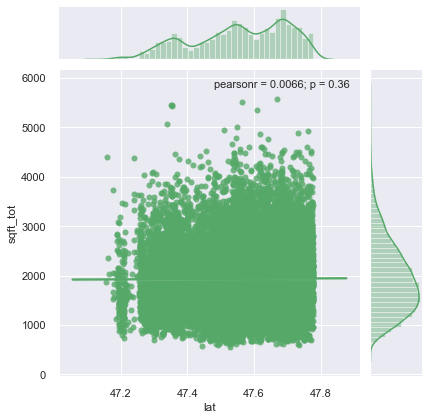

In [112]:
j = sns.jointplot(x='lat', y='sqft_tot', data=kc12_all, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

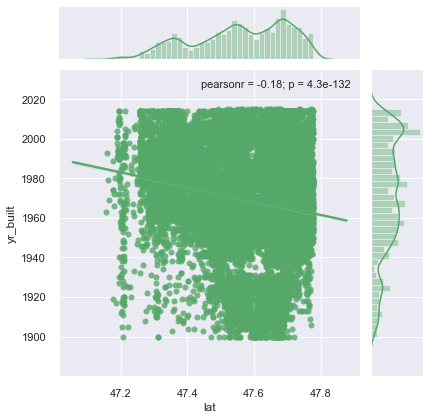

In [119]:
j = sns.jointplot(x='lat', y='yr_built', data=kc12_all, kind='reg', color='g')
j.annotate(stats.pearsonr)
plt.show()

## modeling data: build baseline model
### simple linear regression

King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~price
-------------------------------------------------------------------------------------


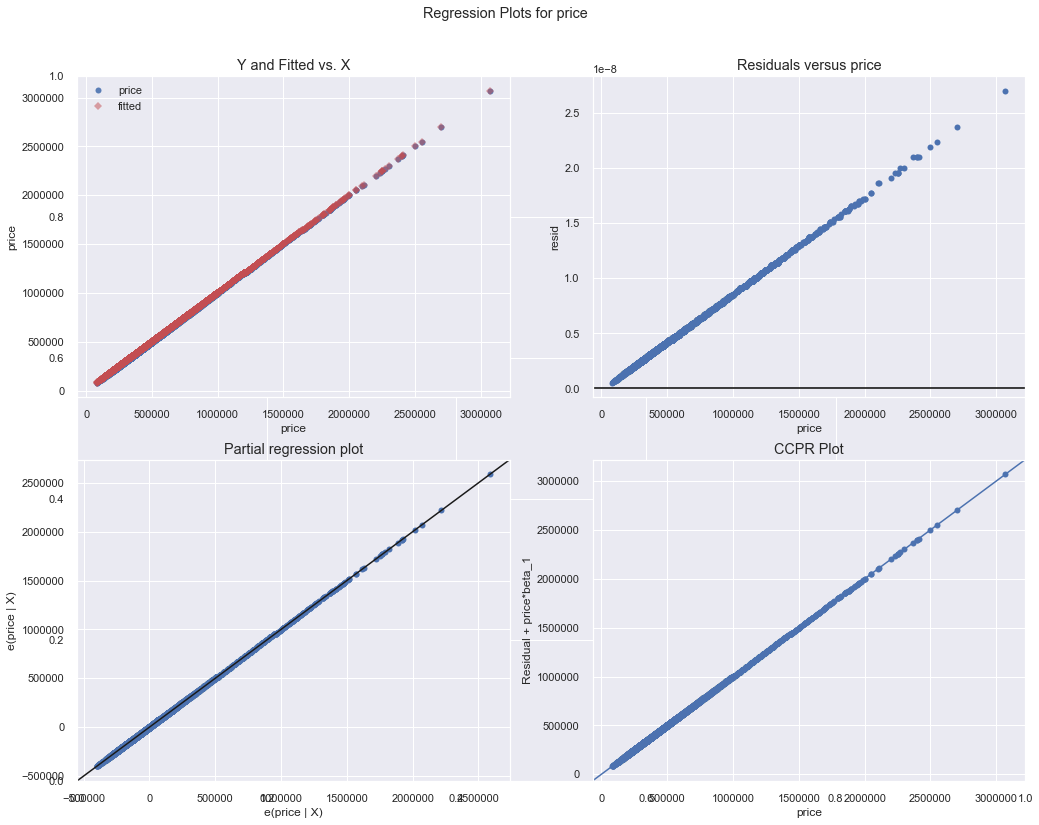

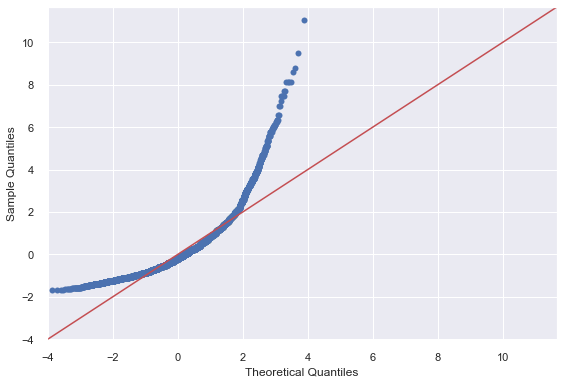

price: R2 1.000 , intercept 0.000 , slope 1.000 , p-value 0.000 , JB 67908.913
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~bedrooms
-------------------------------------------------------------------------------------


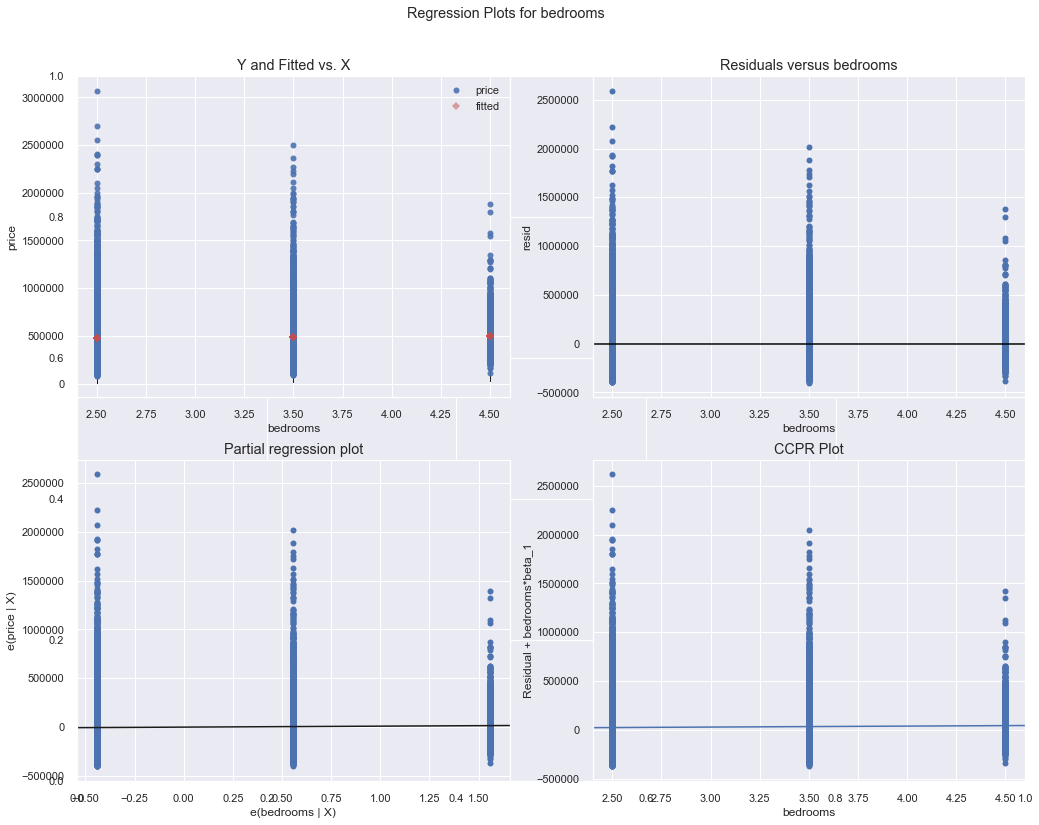

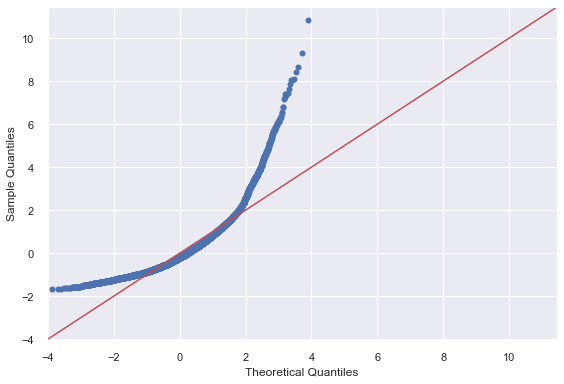

bedrooms: R2 0.001 , intercept 452797.480 , slope 9906.404 , p-value 0.000 , JB 62380.400
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~bathrooms
-------------------------------------------------------------------------------------


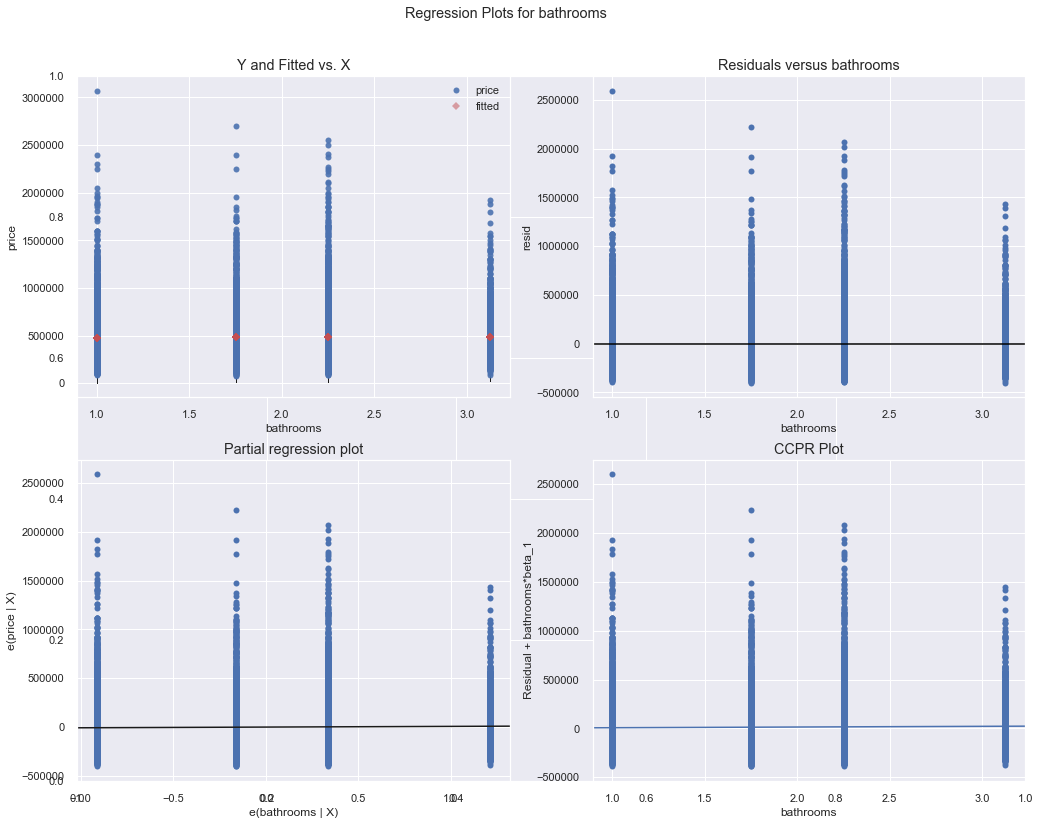

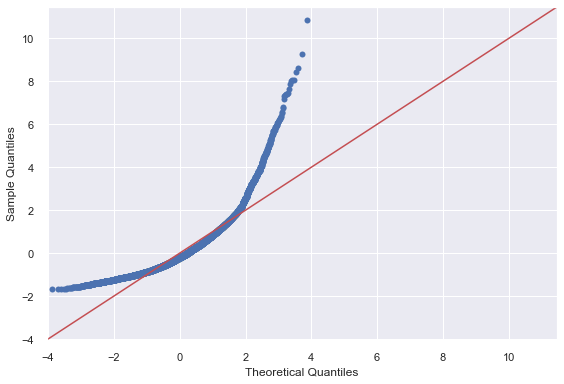

bathrooms: R2 0.000 , intercept 468327.617 , slope 7116.547 , p-value 0.005 , JB 62234.008
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~floors
-------------------------------------------------------------------------------------


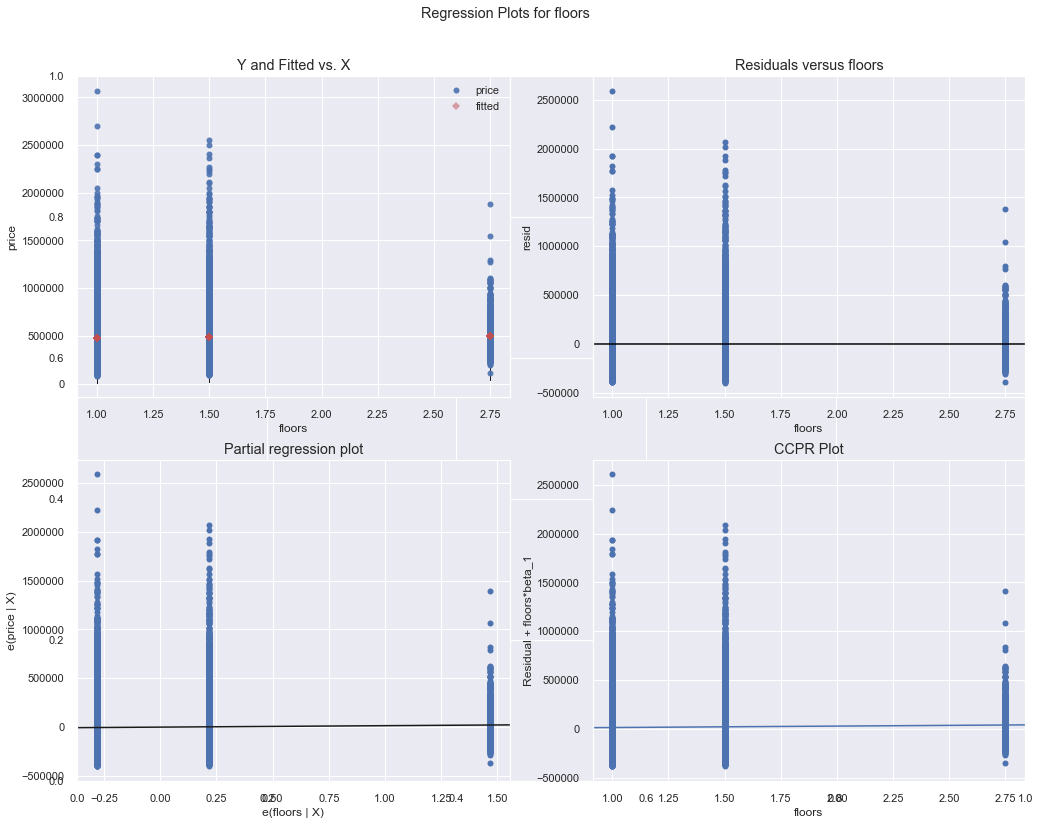

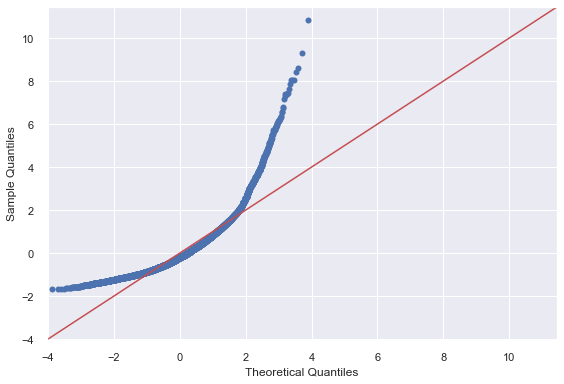

floors: R2 0.001 , intercept 462998.469 , slope 14768.540 , p-value 0.002 , JB 62205.687
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~waterfront
-------------------------------------------------------------------------------------


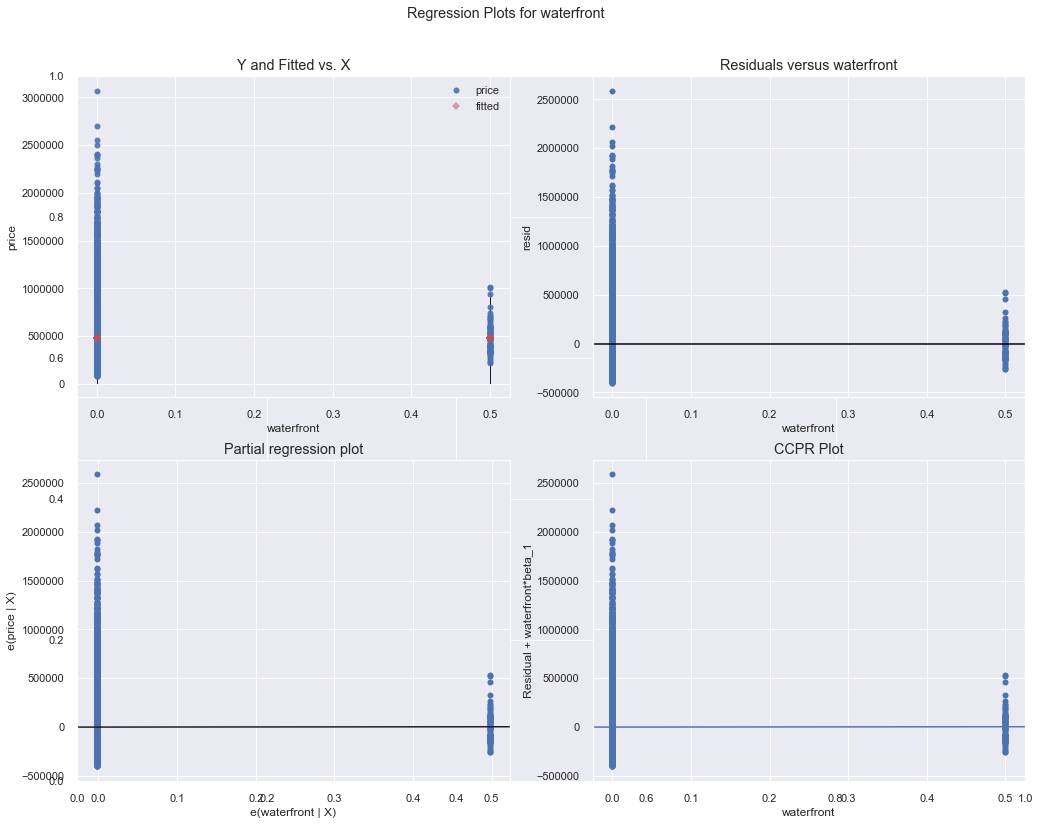

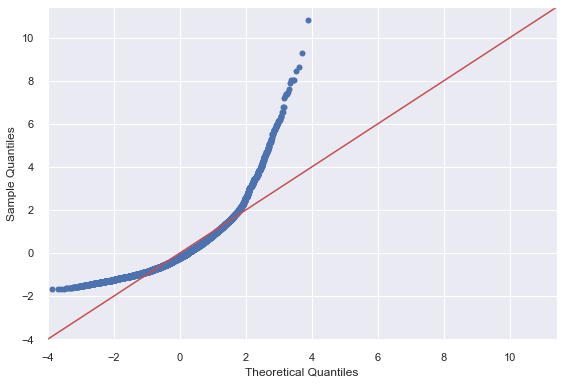

waterfront: R2 0.000 , intercept 481926.882 , slope 6047.354 , p-value 0.912 , JB 61948.007
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~view
-------------------------------------------------------------------------------------


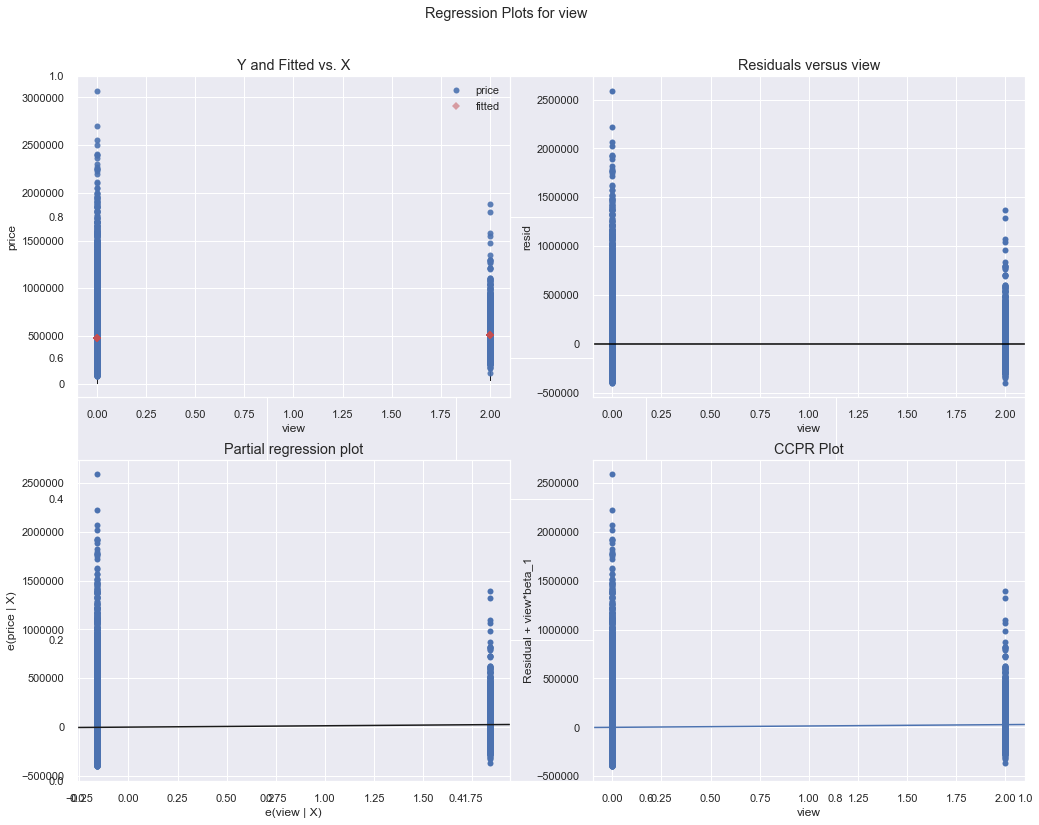

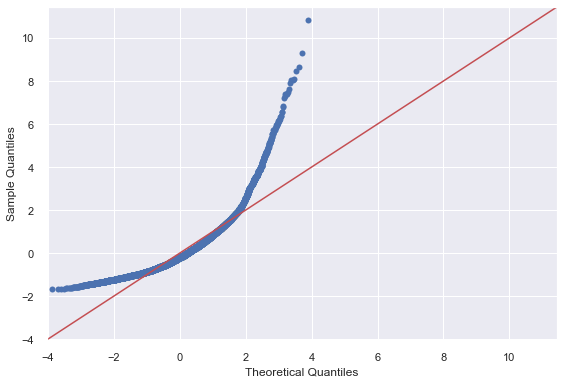

view: R2 0.001 , intercept 479717.328 , slope 13862.809 , p-value 0.000 , JB 62785.558
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~condition
-------------------------------------------------------------------------------------


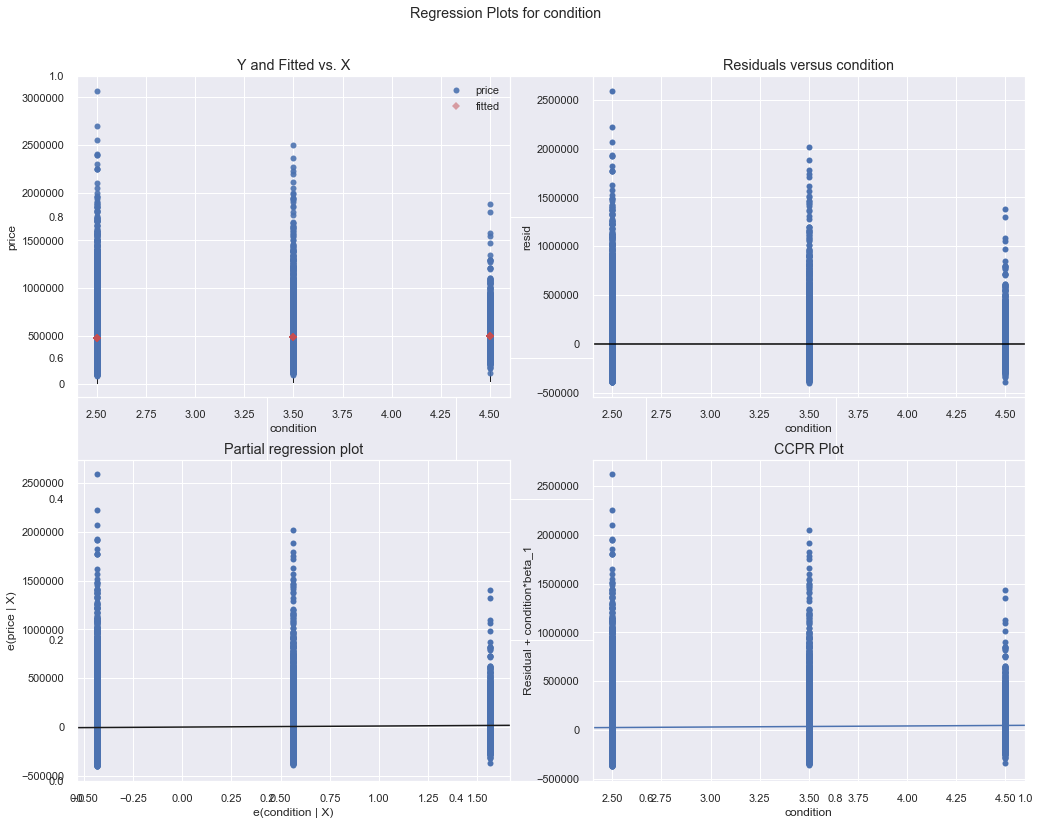

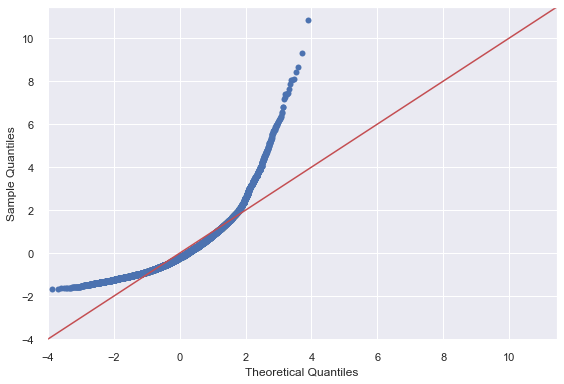

condition: R2 0.001 , intercept 450320.619 , slope 10774.168 , p-value 0.000 , JB 62496.240
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~grade
-------------------------------------------------------------------------------------


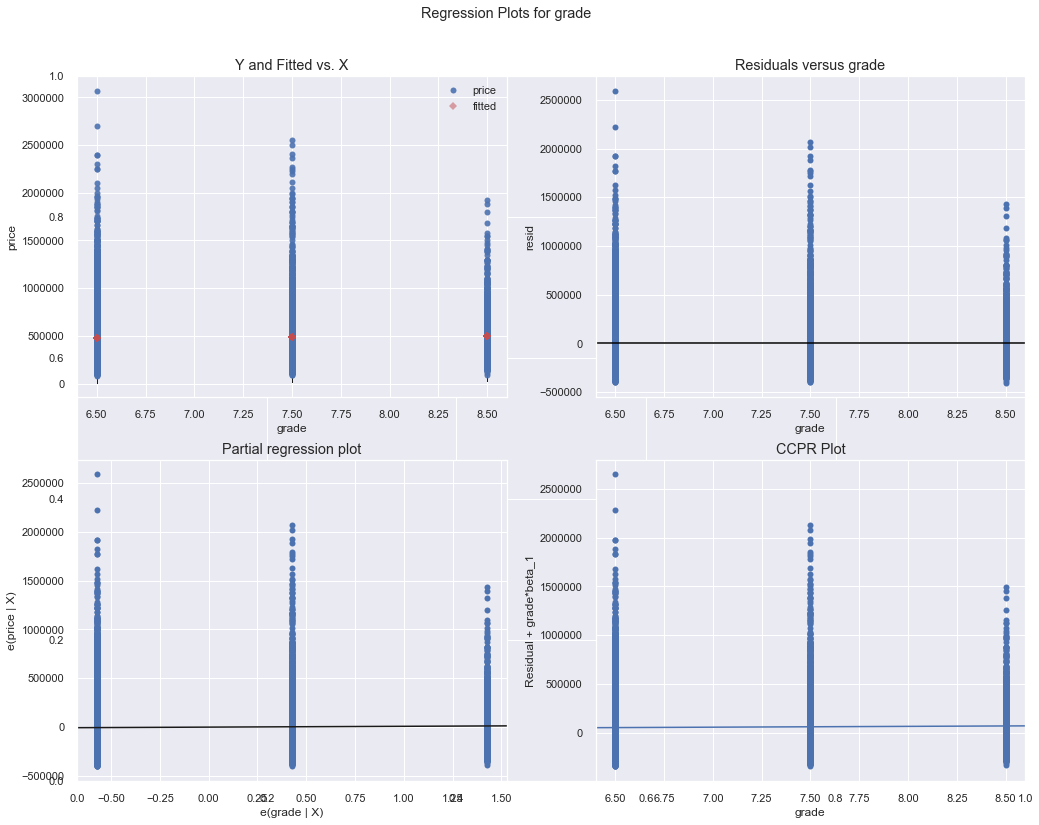

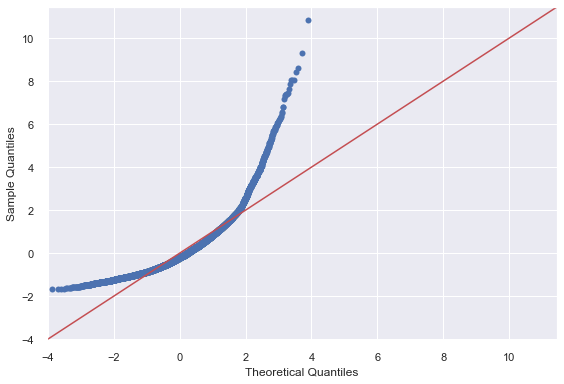

grade: R2 0.001 , intercept 422547.037 , slope 8396.859 , p-value 0.001 , JB 62333.991
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~yr_renovated
-------------------------------------------------------------------------------------


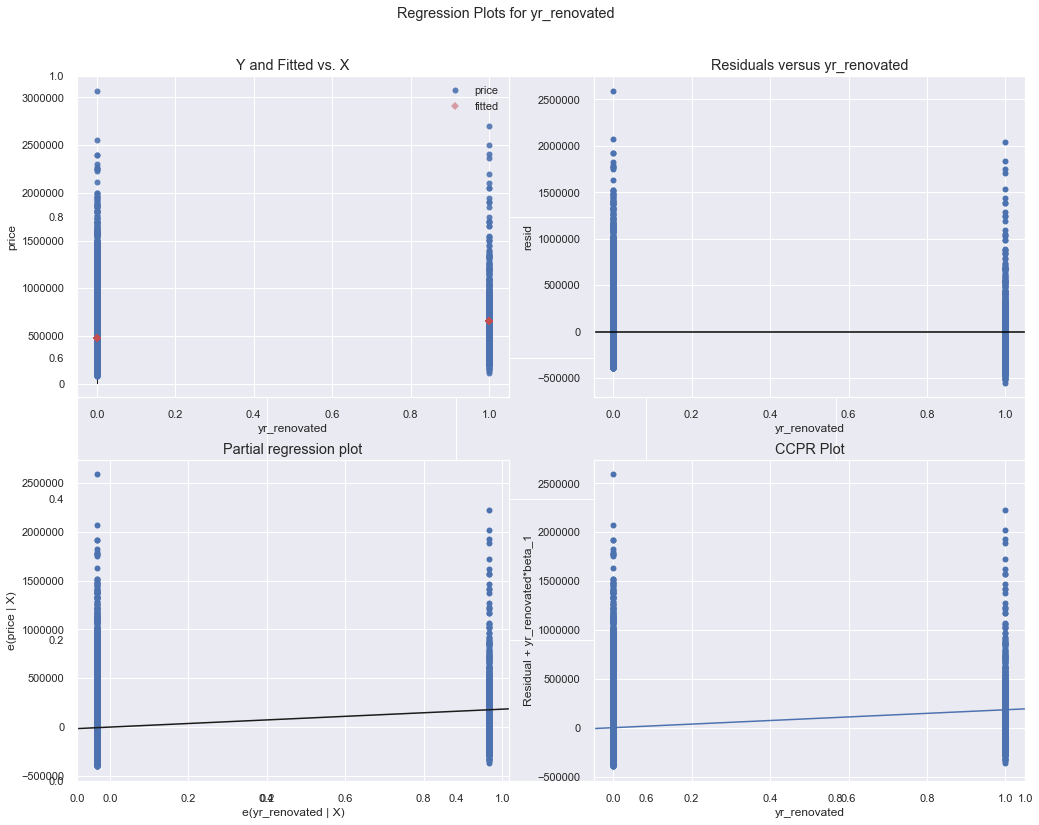

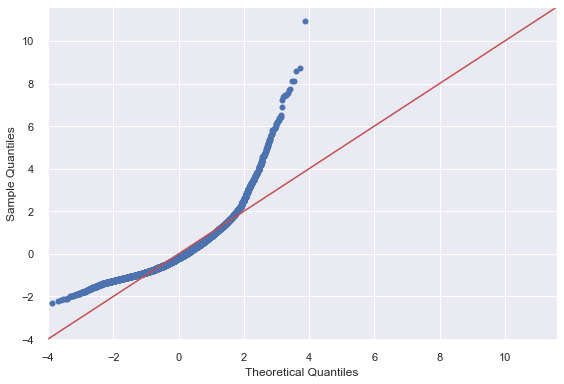

yr_renovated: R2 0.019 , intercept 475879.819 , slope 183314.721 , p-value 0.000 , JB 56429.704
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~mo_sold
-------------------------------------------------------------------------------------


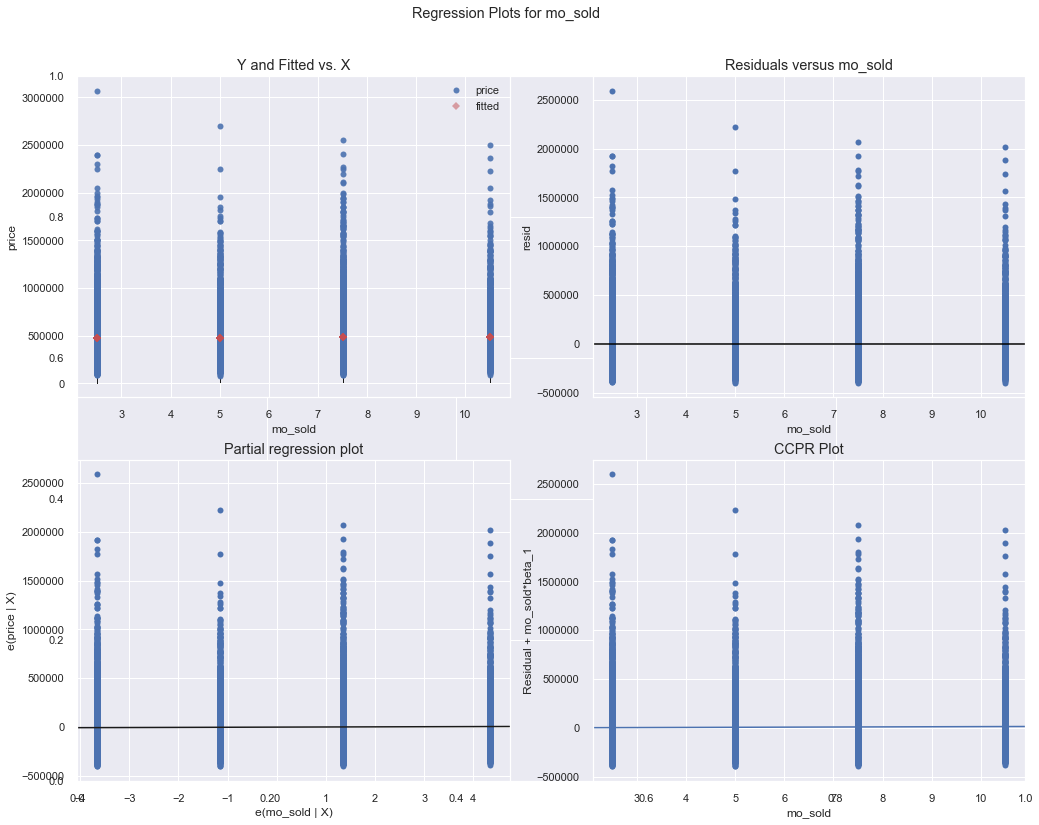

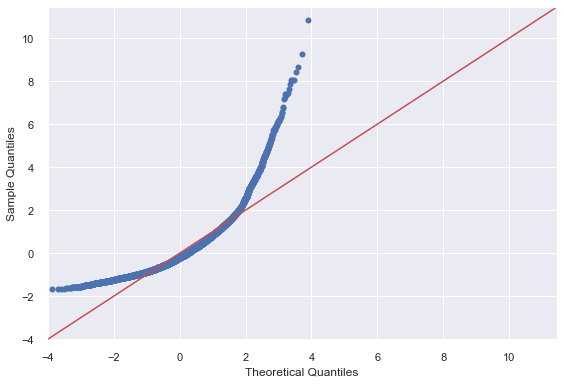

mo_sold: R2 0.000 , intercept 473526.100 , slope 1365.583 , p-value 0.019 , JB 62121.817
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~lat_cat
-------------------------------------------------------------------------------------


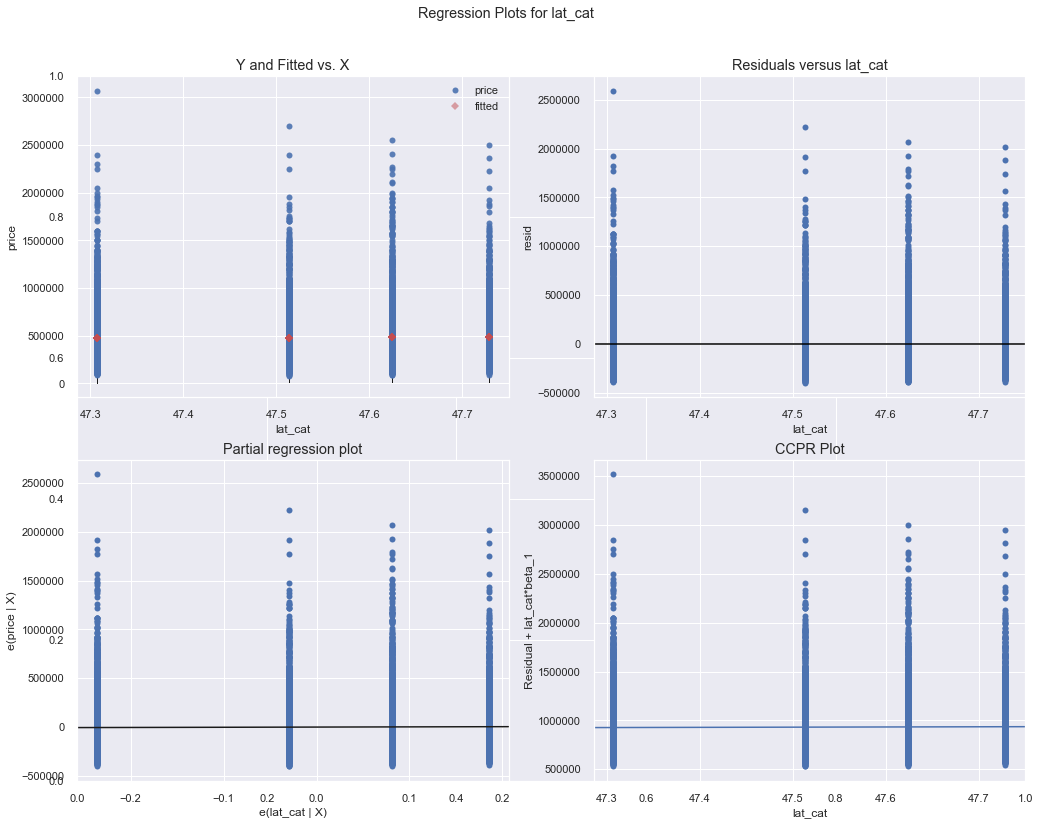

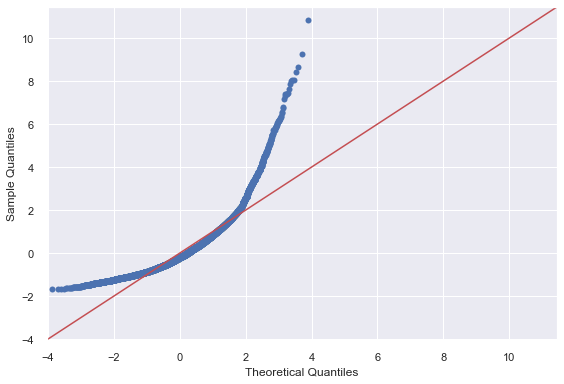

lat_cat: R2 0.000 , intercept -449880.132 , slope 19599.350 , p-value 0.076 , JB 62054.033
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_living
-------------------------------------------------------------------------------------


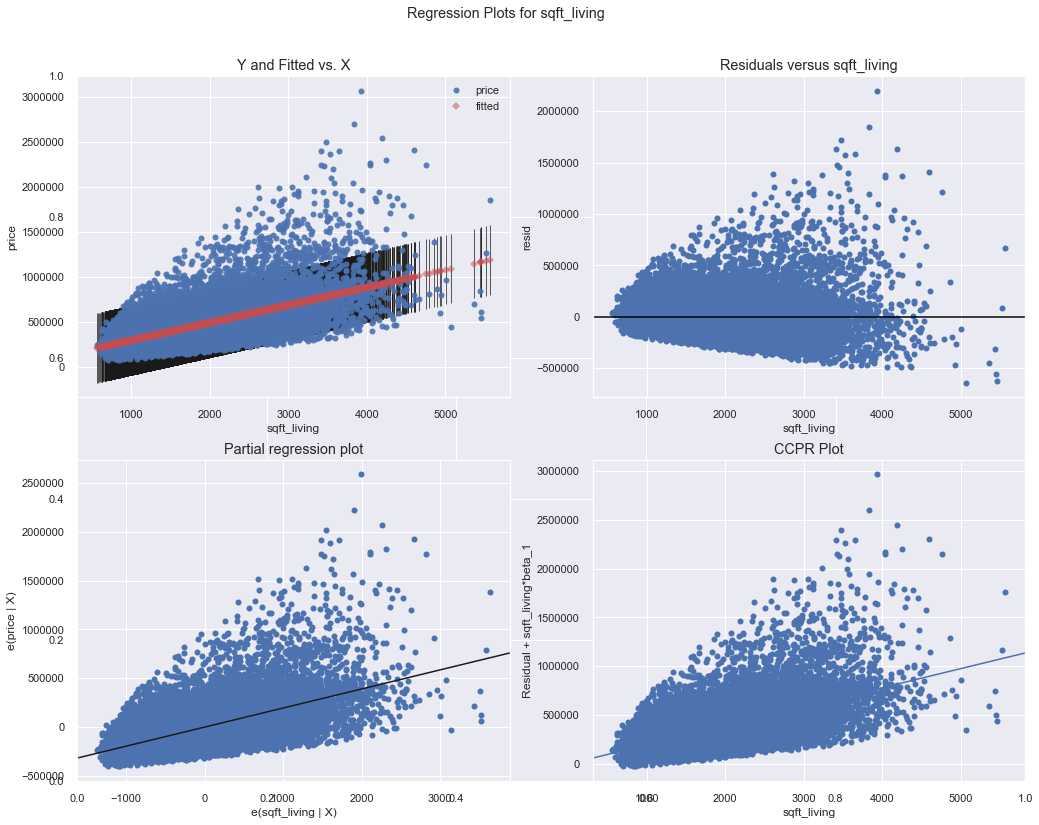

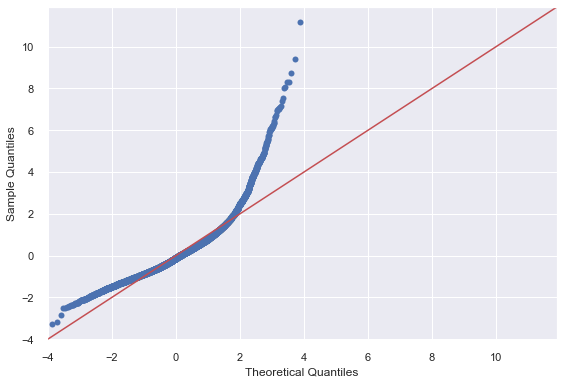

sqft_living: R2 0.326 , intercept 104552.944 , slope 195.147 , p-value 0.000 , JB 52163.043
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_lot
-------------------------------------------------------------------------------------


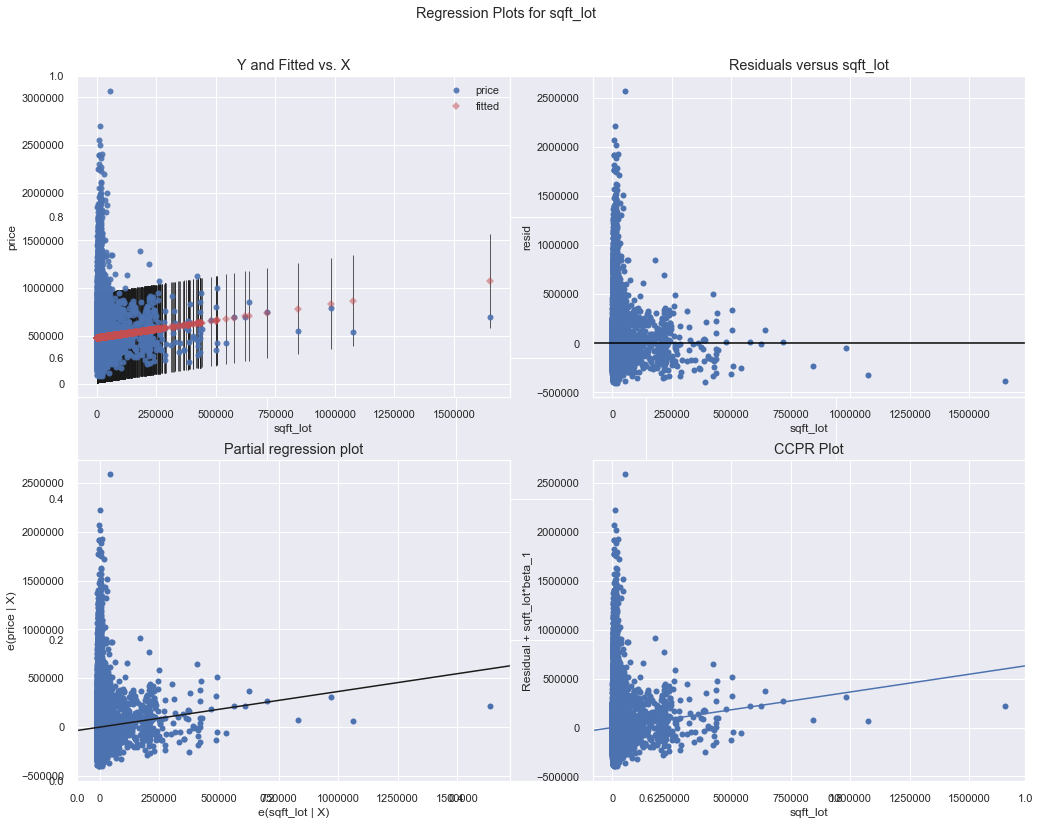

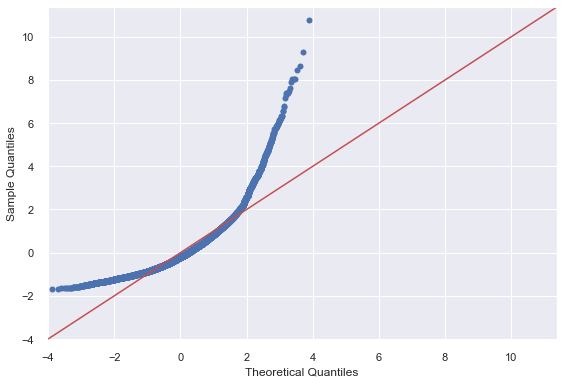

sqft_lot: R2 0.003 , intercept 477022.869 , slope 0.364 , p-value 0.000 , JB 62658.689
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_living15
-------------------------------------------------------------------------------------


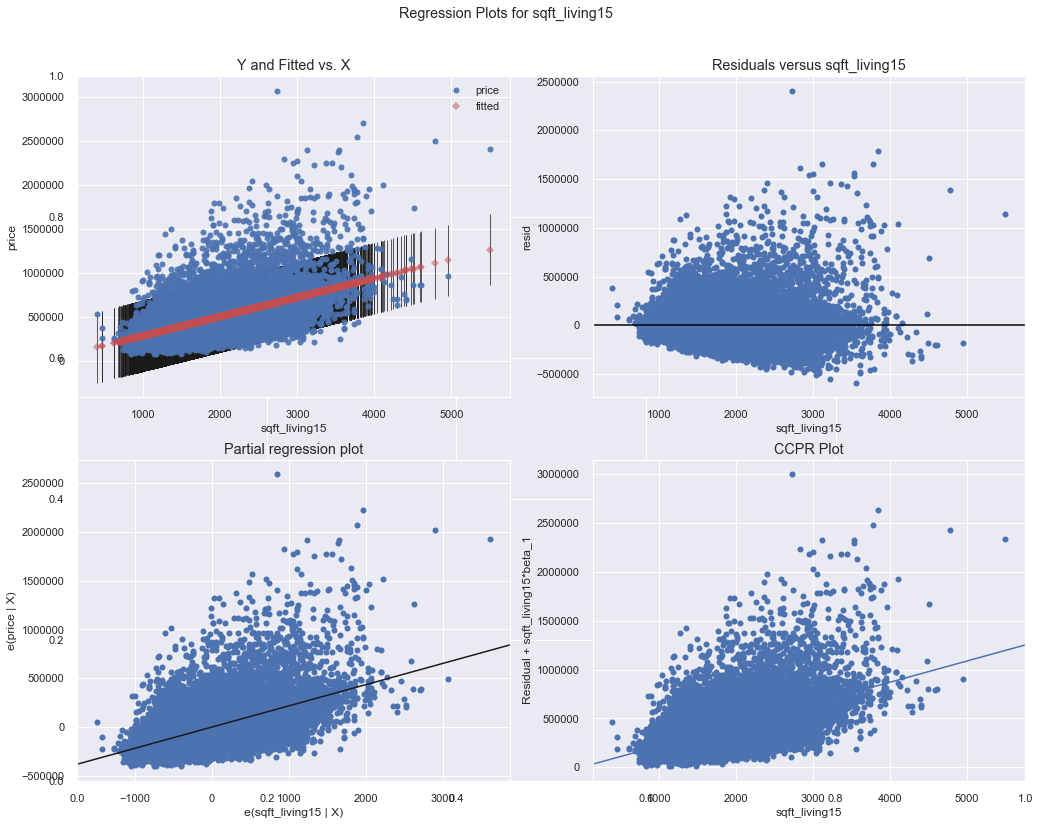

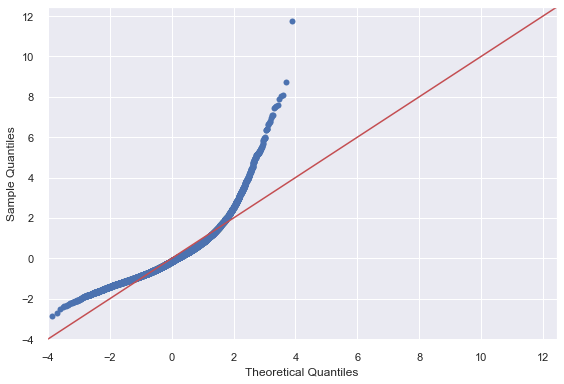

sqft_living15: R2 0.265 , intercept 70652.780 , slope 217.479 , p-value 0.000 , JB 51461.492
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_lot15
-------------------------------------------------------------------------------------


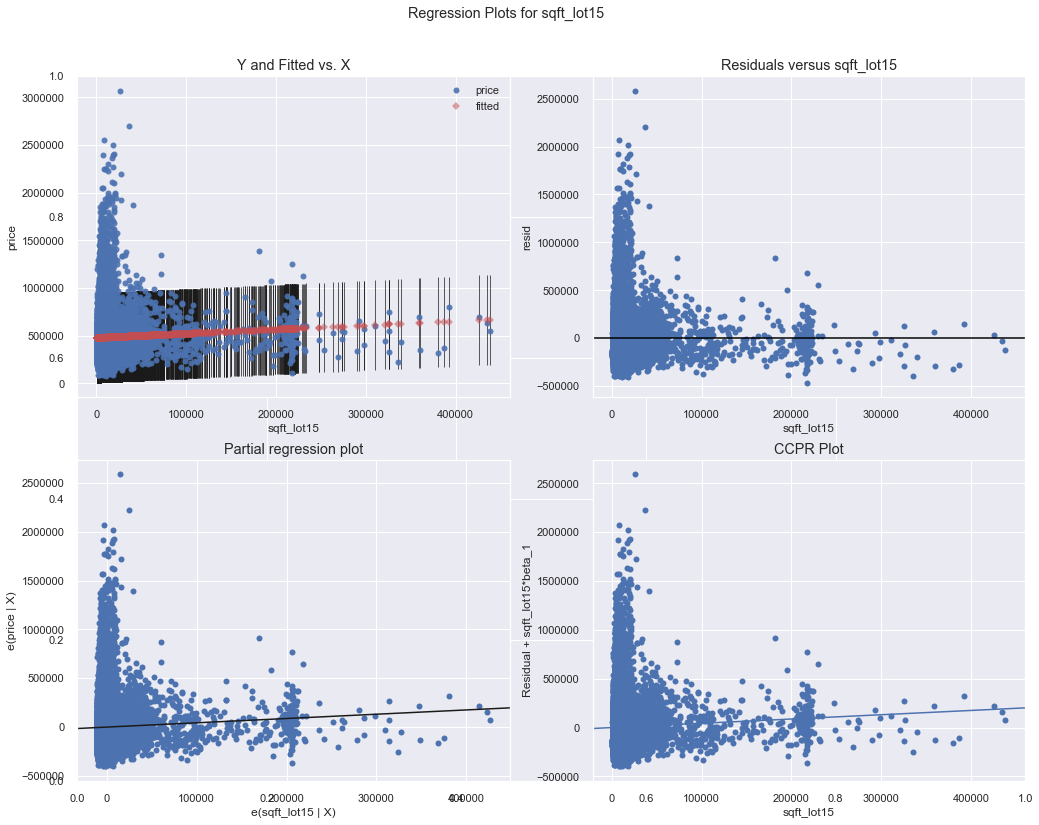

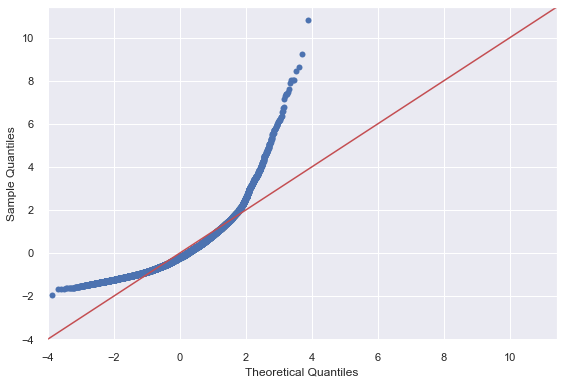

sqft_lot15: R2 0.002 , intercept 476787.811 , slope 0.439 , p-value 0.000 , JB 62241.608
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~yr_built
-------------------------------------------------------------------------------------


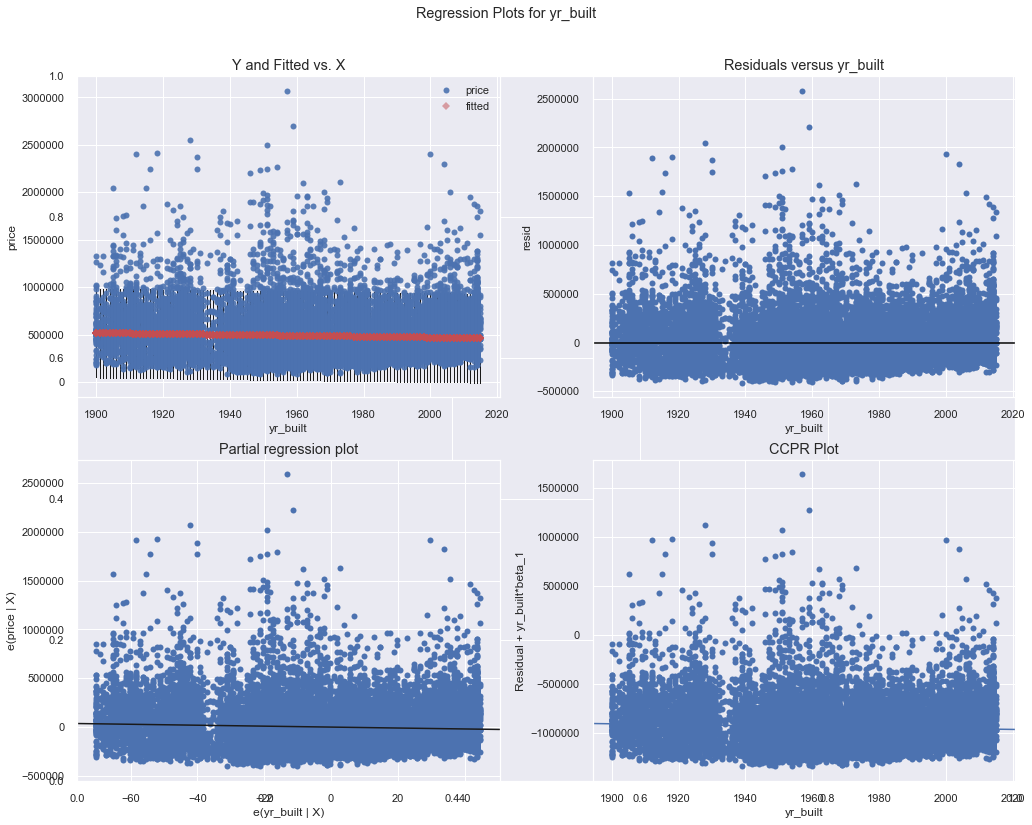

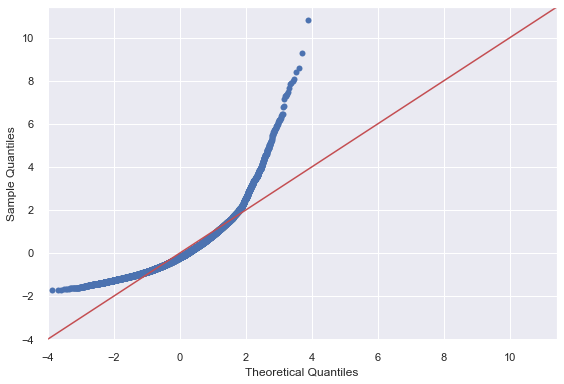

yr_built: R2 0.003 , intercept 1426080.823 , slope -479.200 , p-value 0.000 , JB 59822.167
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~yr_renovated_korg
-------------------------------------------------------------------------------------


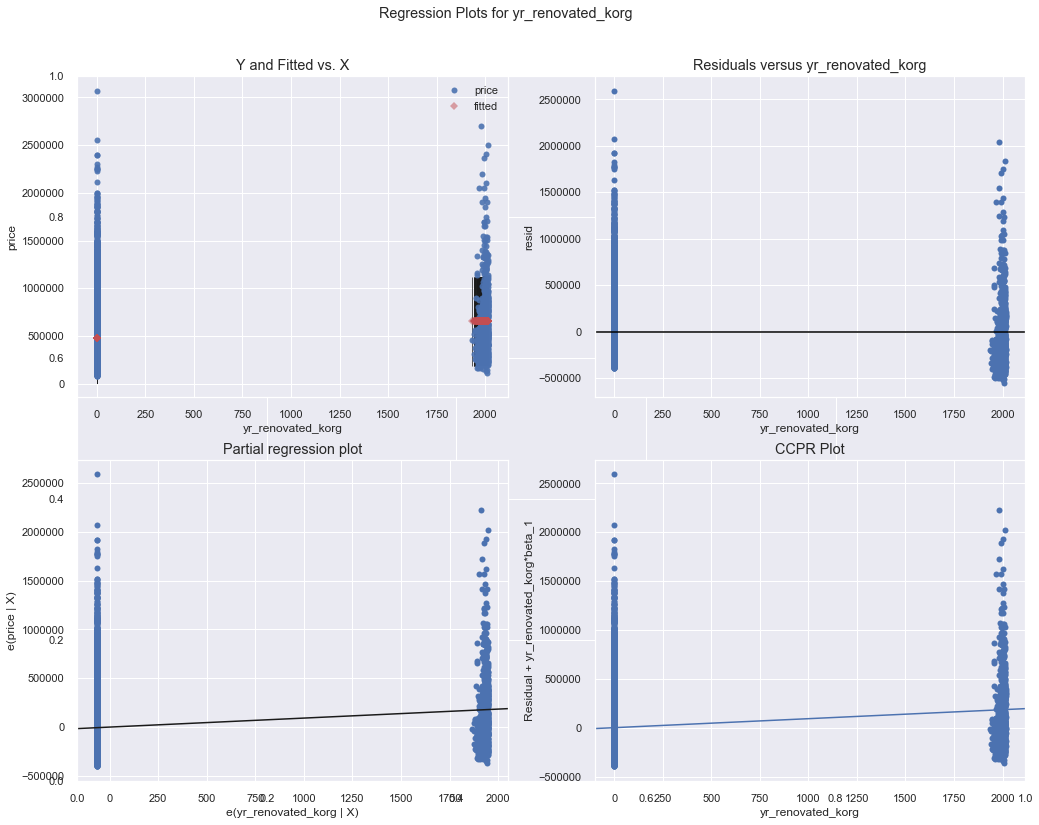

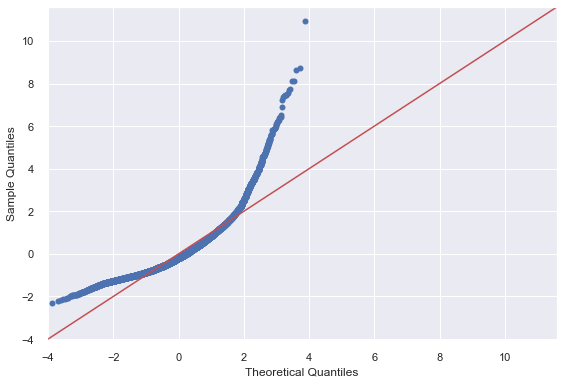

yr_renovated_korg: R2 0.019 , intercept 475865.028 , slope 92.080 , p-value 0.000 , JB 56438.697
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~zipcode
-------------------------------------------------------------------------------------


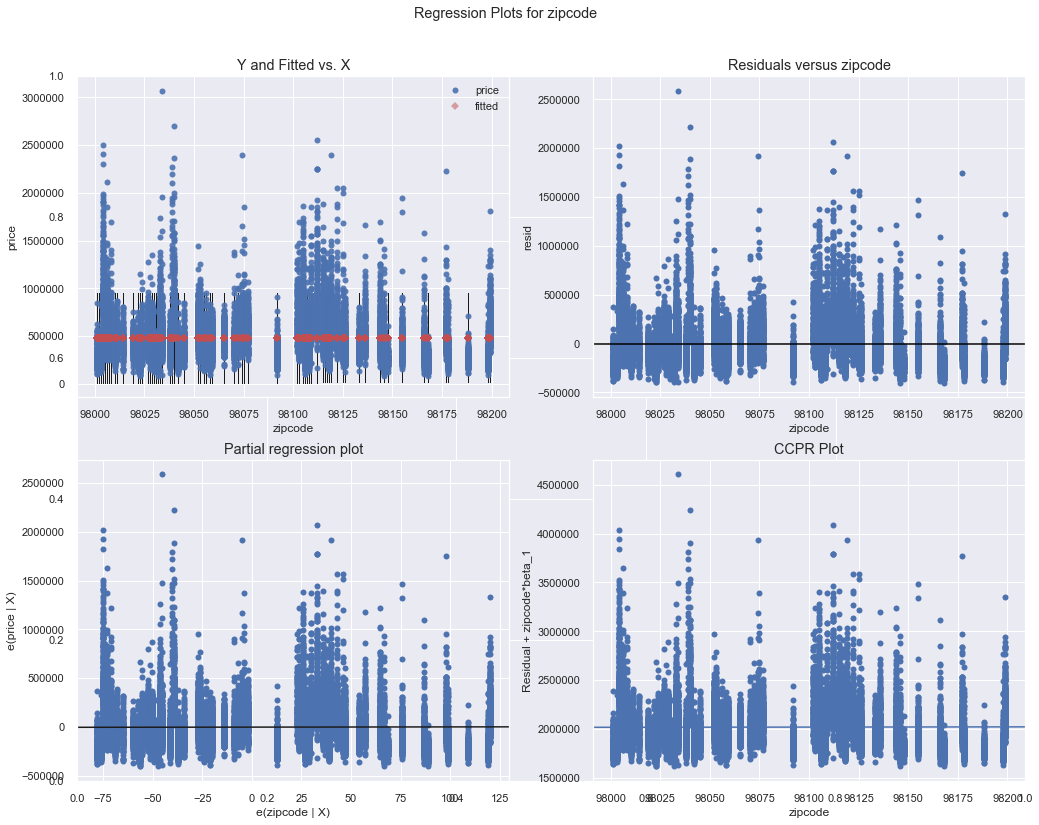

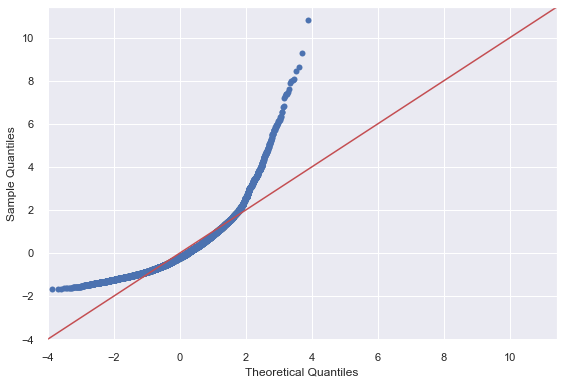

zipcode: R2 0.000 , intercept -1537855.335 , slope 20.594 , p-value 0.522 , JB 62022.106
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~lat
-------------------------------------------------------------------------------------


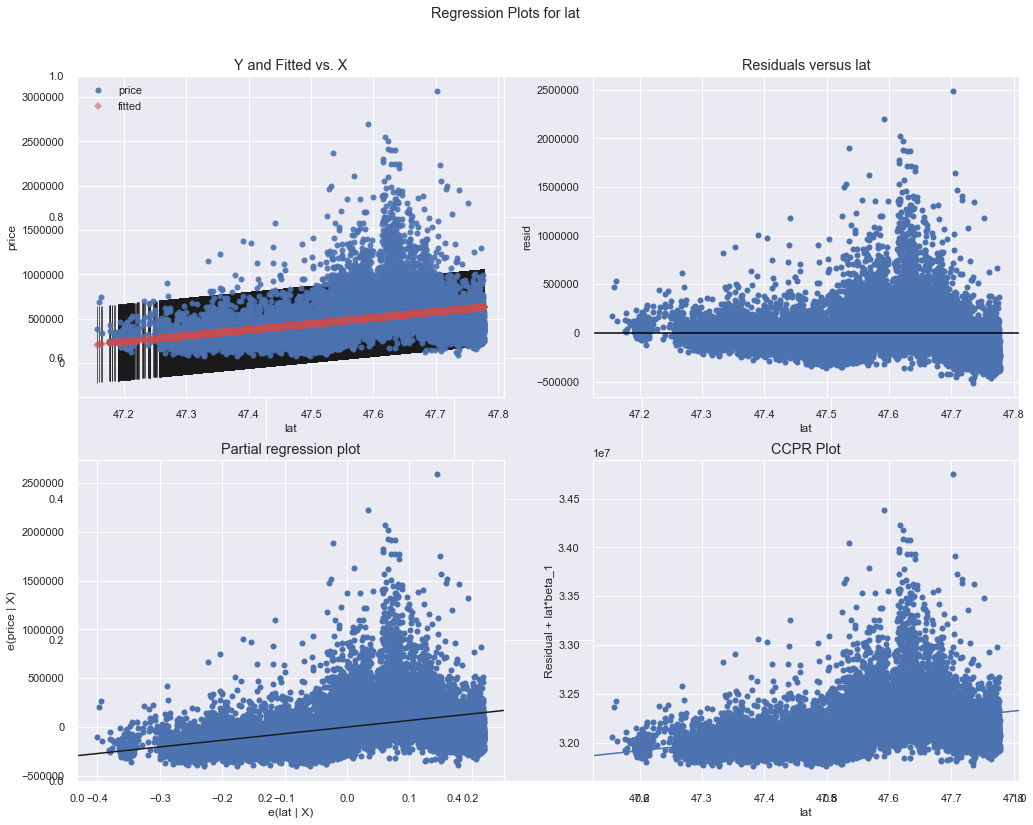

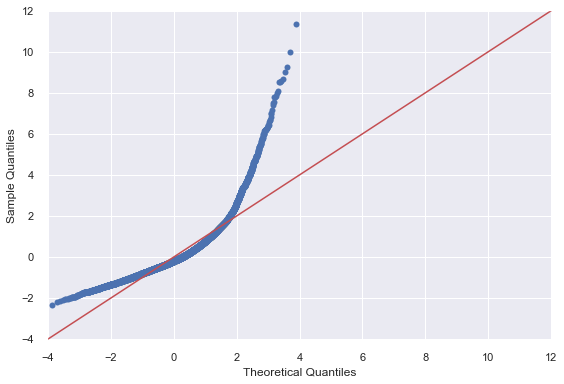

lat: R2 0.160 , intercept -31678957.604 , slope 676255.068 , p-value 0.000 , JB 97940.020
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~long
-------------------------------------------------------------------------------------


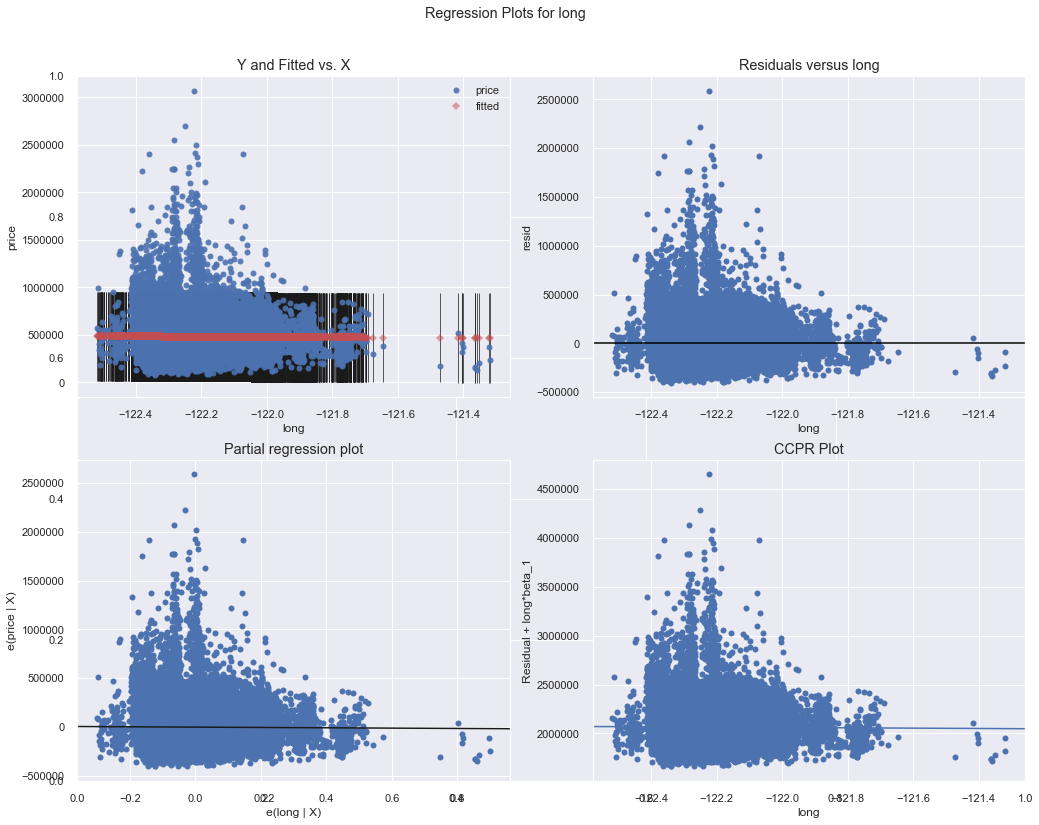

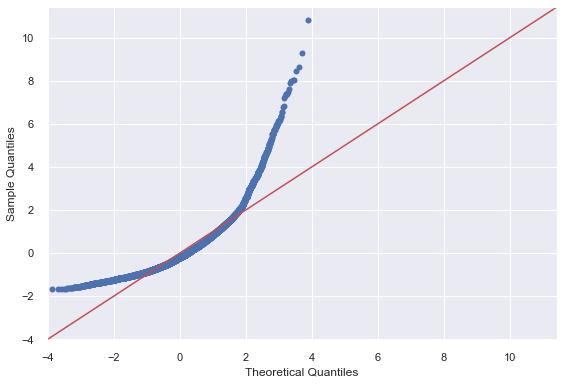

long: R2 0.000 , intercept -1582020.964 , slope -16887.462 , p-value 0.172 , JB 61669.345
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_tot
-------------------------------------------------------------------------------------


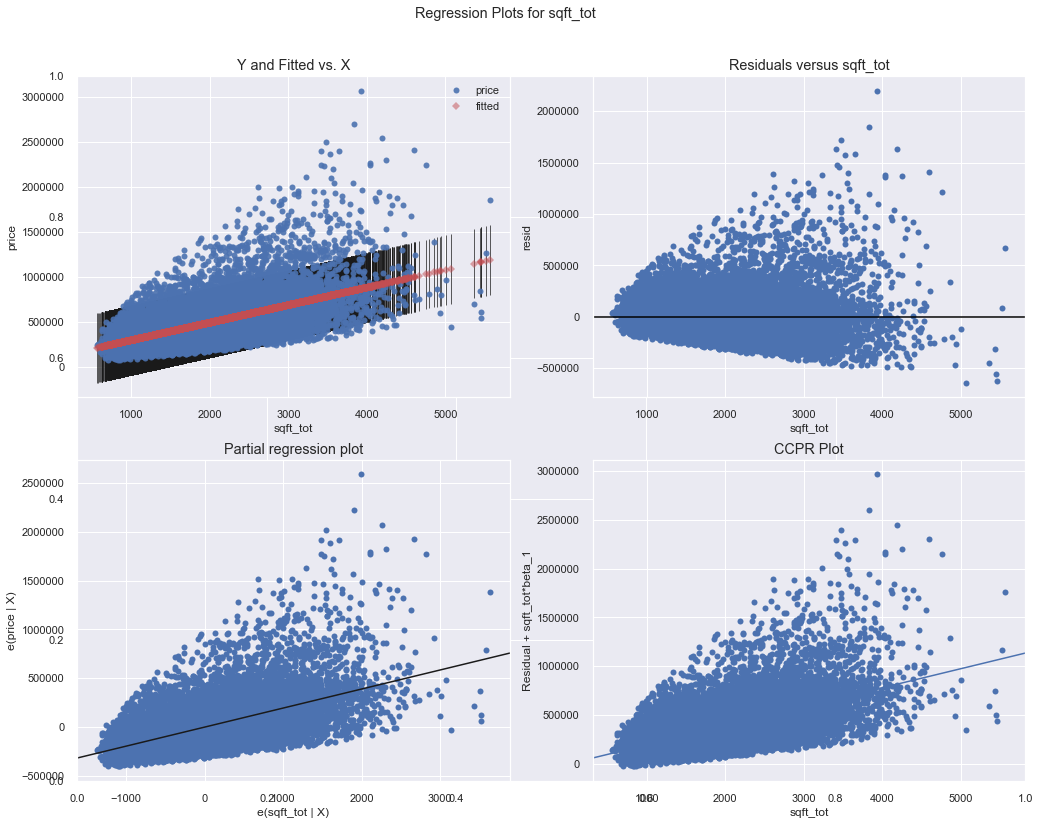

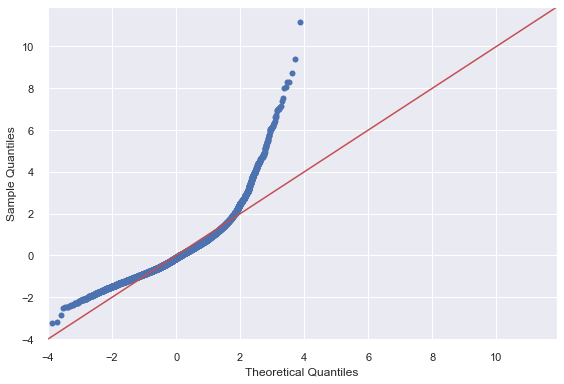

sqft_tot: R2 0.324 , intercept 105061.027 , slope 194.834 , p-value 0.000 , JB 52002.183
Press Enter to continue...


[['price', 1.0, 0.0, 1.0, 0.0, 67908.913],
 ['bedrooms', 0.001, 452797.48, 9906.404, 0.0, 62380.4],
 ['bathrooms', 0.0, 468327.617, 7116.547, 0.005, 62234.008],
 ['floors', 0.001, 462998.469, 14768.54, 0.002, 62205.687],
 ['waterfront', 0.0, 481926.882, 6047.354, 0.912, 61948.007],
 ['view', 0.001, 479717.328, 13862.809, 0.0, 62785.558],
 ['condition', 0.001, 450320.619, 10774.168, 0.0, 62496.24],
 ['grade', 0.001, 422547.037, 8396.859, 0.001, 62333.991],
 ['yr_renovated', 0.019, 475879.819, 183314.721, 0.0, 56429.704],
 ['mo_sold', 0.0, 473526.1, 1365.583, 0.019, 62121.817],
 ['lat_cat', 0.0, -449880.132, 19599.35, 0.076, 62054.033],
 ['sqft_living', 0.326, 104552.944, 195.147, 0.0, 52163.043],
 ['sqft_lot', 0.003, 477022.869, 0.364, 0.0, 62658.689],
 ['sqft_living15', 0.265, 70652.78, 217.479, 0.0, 51461.492],
 ['sqft_lot15', 0.002, 476787.811, 0.439, 0.0, 62241.608],
 ['yr_built', 0.003, 1426080.823, -479.2, 0.0, 59822.167],
 ['yr_renovated_korg', 0.019, 475865.028, 92.08, 0.0, 5643

In [205]:
results = []
for idx, col in enumerate(kc12_all.columns):
    print (f"King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~{col}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{col}'
    model = ols(formula=f, data=kc12_all).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    print(f'{col}: R2 {model.rsquared:5.3f} , intercept {model.params[0]:5.3f} , slope {model.params[1]:5.3f} , p-value {model.pvalues[1]:5.3f} , JB {sms.jarque_bera(model.resid)[0]:5.3f}')
    results.append([col, round(model.rsquared,3), round(model.params[0],3), round(model.params[1],3), round(model.pvalues[1],3), round(sms.jarque_bera(model.resid)[0],3)])
    input("Press Enter to continue...")
    
results

### multiple linear regression

In [216]:
kc13_all = kc12_all.drop(['price'], axis=1)
outcome = 'price'
x_cols = list(kc13_all.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_0 = ols(formula=formula, data=kc12_all).fit()
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     1205.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:05:33   Log-Likelihood:            -2.5697e+05
No. Observations:               19181   AIC:                         5.140e+05
Df Residuals:                   19160   BIC:                         5.141e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -1.71e+07   2.85e+06     -6.003      0.000   -2.27e+07   -1.15e+07
bedrooms          -9237.5498   6997.785     -1.320      0.187    -2.3e+04    4478.723
bathrooms          5157.2677   7717.758      0.668      0.504   -9970.215    2.03e+04
floors             1825.4492   6044.470      0.302      0.763      -1e+04    1.37e+04
waterfront         3.785e+04   3.83e+04      0.989      0.323   -3.72e+04    1.13e+05
view               2.178e+04   4078.421      5.339      0.000    1.38e+04    2.98e+04
condition          7972.5012   7152.101      1.115      0.265   -6046.245     2.2e+04
grade              1080.7109   5306.927      0.204      0.839   -9321.332    1.15e+04
yr_renovated      -5.642e+06   7.91e+05     -7.133      0.000   -7.19e+06   -4.09e+06
mo_sold            1600.8095   1498.130      1.069      0.285   -1335.656    4537.275
lat_cat           -3.821e+04   3.25e+04     -1.175      0.240   -1.02e+05    2.55e+04
sqft_living         112.6069     19.632      5.736      0.000      74.126     151.088
sqft_lot              0.2651      0.047      5.583      0.000       0.172       0.358
sqft_living15       114.1668      3.004     38.006      0.000     108.279     120.055
sqft_lot15           -0.2454      0.071     -3.448      0.001      -0.385      -0.106
yr_built          -1541.4767     51.091    -30.171      0.000   -1641.620   -1441.333
yr_renovated_korg  2870.9257    396.310      7.244      0.000    2094.123    3647.728
zipcode            -322.8254     27.294    -11.828      0.000    -376.324    -269.327
lat                6.138e+05   8611.226     71.274      0.000    5.97e+05    6.31e+05
long              -1.994e+05   1.08e+04    -18.410      0.000   -2.21e+05   -1.78e+05
sqft_tot             35.5098     19.665      1.806      0.071      -3.036      74.056
==============================================================================
Omnibus:                     8540.212   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95646.449
Skew:                           1.842   Prob(JB):                         0.00
Kurtosis:                      13.300   Cond. No.                     2.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### investigate multicollinearity

In [217]:
X = kc12_all[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 333.2092300197011),
 ('bathrooms', 154.42225865269936),
 ('floors', 49.178127986789114),
 ('waterfront', 1.1110136316920027),
 ('view', 3.9304649819952973),
 ('condition', 347.25581859181466),
 ('grade', 999.4253593582852),
 ('yr_renovated', 15623.432054597135),
 ('mo_sold', 72.14159805072048),
 ('lat_cat', 1247993.1954056288),
 ('sqft_living', 1231.7002184609123),
 ('sqft_lot', 2.5108344965656),
 ('sqft_living15', 26.05222869891497),
 ('sqft_lot15', 2.7645474883470125),
 ('yr_built', 6989.358930100799),
 ('yr_renovated_korg', 15621.849588078596),
 ('zipcode', 2696696.3752764855),
 ('lat', 126274.03157579375),
 ('long', 1318685.7984065106),
 ('sqft_tot', 1236.024781361403)]

In [218]:
kc13_all = kc13_all.drop(['grade','bedrooms','lat','long','zipcode','sqft_living','yr_renovated'], axis=1)
kc14_all = kc12_all.drop(['grade','bedrooms','lat','long','zipcode','sqft_living','yr_renovated'], axis=1)
outcome = 'price'
x_cols = list(kc13_all.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_1 = ols(formula=formula, data=kc14_all).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1098.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:10:48   Log-Likelihood:            -2.5944e+05
No. Observations:               19181   AIC:                         5.189e+05
Df Residuals:                   19167   BIC:                         5.190e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           6.52e+06   1.53e+06      4.268      0.000    3.53e+06    9.51e+06
bathrooms          8498.5622   7136.857      1.191      0.234   -5490.303    2.25e+04
floors            -3690.8996   6420.081     -0.575      0.565   -1.63e+04    8893.022
waterfront         5.908e+04   4.35e+04      1.360      0.174   -2.61e+04    1.44e+05
view                3.23e+04   4408.074      7.329      0.000    2.37e+04    4.09e+04
condition          2591.1752   4607.045      0.562      0.574   -6439.037    1.16e+04
mo_sold            1466.8093   1638.971      0.895      0.371   -1745.718    4679.337
lat_cat           -3.939e+04   3.23e+04     -1.220      0.222   -1.03e+05    2.39e+04
sqft_lot              0.0791      0.054      1.468      0.142      -0.026       0.185
sqft_living15       120.7240      3.329     36.265      0.000     114.199     127.249
sqft_lot15           -0.5743      0.080     -7.139      0.000      -0.732      -0.417
yr_built          -2395.0958     52.830    -45.336      0.000   -2498.648   -2291.544
yr_renovated_korg    39.6070      3.774     10.495      0.000      32.210      47.004
sqft_tot            152.5242      2.700     56.495      0.000     147.232     157.816
==============================================================================
Omnibus:                     6500.921   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42861.824
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                       9.707   Cond. No.                     5.20e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
X = kc14_all[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 77.98545299658171),
 ('floors', 42.83140604635223),
 ('waterfront', 1.1069482224420755),
 ('view', 3.3131117800765932),
 ('condition', 111.81900880264097),
 ('mo_sold', 54.32686121110209),
 ('lat_cat', 6257.8214901998845),
 ('sqft_lot', 2.4996911875376293),
 ('sqft_living15', 25.222505259666985),
 ('sqft_lot15', 2.7354915635602604),
 ('yr_built', 6286.237168685119),
 ('yr_renovated_korg', 1.094786288334955),
 ('sqft_tot', 18.01104096907592)]

In [223]:
kc14_all.columns

Index(['price', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'mo_sold', 'lat_cat', 'sqft_lot', 'sqft_living15', 'sqft_lot15',
       'yr_built', 'yr_renovated_korg', 'sqft_tot'],
      dtype='object')

In [235]:
kc14_all.head()

price  bathrooms  floors  waterfront  view  condition  mo_sold  lat_cat  \
0  221900.0        1.0     1.0         0.0   0.0        2.5      2.5  47.3071   
1  538000.0        1.0     1.0         0.0   0.0        2.5      2.5  47.3071   
2  180000.0        1.0     1.0         0.0   0.0        2.5      2.5  47.3071   
3  604000.0        1.0     1.0         0.0   0.0        2.5      2.5  47.3071   
4  510000.0        1.0     1.0         0.0   0.0        2.5      2.5  47.3071   

   sqft_lot  sqft_living15  sqft_lot15  yr_built  yr_renovated_korg  sqft_tot  
0      5650           1340        5650      1955                0.0    1180.0  
1      7242           1690        7639      1951             1991.0    2570.0  
2     10000           2720        8062      1933                0.0     770.0  
3      5000           1360        5000      1965                0.0    1960.0  
4      8080           1800        7503      1987                0.0    1680.0

In [239]:
cats = ['bathrooms', 'floors', 'waterfront', 'view', 'condition', 'mo_sold','lat_cat']
kc14_cat = kc14_all.loc[:, cats]
kc14_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19181 entries, 0 to 21596
Data columns (total 7 columns):
bathrooms     19181 non-null float64
floors        19181 non-null float64
waterfront    19181 non-null float64
view          19181 non-null float64
condition     19181 non-null float64
mo_sold       19181 non-null float64
lat_cat       19181 non-null float64
dtypes: float64(7)
memory usage: 1.8 MB


In [240]:
import pandas as pd
kc14_cat = pd.get_dummies(kc14_all, columns=cats, drop_first=True)
kc14_cat.columns

Index(['price', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_built',
       'yr_renovated_korg', 'sqft_tot', 'bathrooms_1.75', 'bathrooms_2.25',
       'bathrooms_3.125', 'floors_1.5', 'floors_2.75', 'waterfront_0.5',
       'view_2.0', 'condition_3.5', 'condition_4.5', 'mo_sold_5.0',
       'mo_sold_7.5', 'mo_sold_10.5', 'lat_cat_47.513450000000006',
       'lat_cat_47.62435000000001', 'lat_cat_47.72885'],
      dtype='object')

In [242]:
new_colnames = ['price', 'sqft_lot', 'sqft_living15', 'sqft_lot15','yr_built', 'yr_renovated_korg', 
                'sqft_tot', 'bathrooms_1750', 'bathrooms_2250', 'bathrooms_3125', 'floors_150', 'floors_275',
                'waterfront_1', 'view_1', 'condition_35', 'condition_45','mo_sold_500', 'mo_sold_750', 
                'mo_sold_1050','lat_cat_475','lat_cat_476','lat_cat_477']
kc15_all = kc14_cat.copy()
kc15_all.columns = new_colnames
kc15_all.columns

Index(['price', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_built',
       'yr_renovated_korg', 'sqft_tot', 'bathrooms_1750', 'bathrooms_2250',
       'bathrooms_3125', 'floors_150', 'floors_275', 'waterfront_1', 'view_1',
       'condition_35', 'condition_45', 'mo_sold_500', 'mo_sold_750',
       'mo_sold_1050', 'lat_cat_475', 'lat_cat_476', 'lat_cat_477'],
      dtype='object')

In [243]:
kc15_all.head()

price  sqft_lot  sqft_living15  sqft_lot15  yr_built  yr_renovated_korg  \
0  221900.0      5650           1340        5650      1955                0.0   
1  538000.0      7242           1690        7639      1951             1991.0   
2  180000.0     10000           2720        8062      1933                0.0   
3  604000.0      5000           1360        5000      1965                0.0   
4  510000.0      8080           1800        7503      1987                0.0   

   sqft_tot  bathrooms_1750  bathrooms_2250  bathrooms_3125  ...  \
0    1180.0               0               0               0  ...   
1    2570.0               0               0               0  ...   
2     770.0               0               0               0  ...   
3    1960.0               0               0               0  ...   
4    1680.0               0               0               0  ...   

   waterfront_1  view_1  condition_35  condition_45  mo_sold_500  mo_sold_750  \
0             0       0             0             0            0            0   
1             0       0             0             0            0            0   
2             0       0             0             0            0            0   
3             0       0             0             0            0            0   
4             0       0             0             0            0            0   

   mo_sold_1050  lat_cat_475  lat_cat_476  lat_cat_477  
0             0            0            0            0  
1             0            0            0            0  
2             0            0            0            0  
3             0            0            0            0  
4             0            0            0            0  

[5 rows x 22 columns]

In [244]:
kc15_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19181 entries, 0 to 21596
Data columns (total 22 columns):
price                19181 non-null float64
sqft_lot             19181 non-null int64
sqft_living15        19181 non-null int64
sqft_lot15           19181 non-null int64
yr_built             19181 non-null int64
yr_renovated_korg    19181 non-null float64
sqft_tot             19181 non-null float64
bathrooms_1750       19181 non-null uint8
bathrooms_2250       19181 non-null uint8
bathrooms_3125       19181 non-null uint8
floors_150           19181 non-null uint8
floors_275           19181 non-null uint8
waterfront_1         19181 non-null uint8
view_1               19181 non-null uint8
condition_35         19181 non-null uint8
condition_45         19181 non-null uint8
mo_sold_500          19181 non-null uint8
mo_sold_750          19181 non-null uint8
mo_sold_1050         19181 non-null uint8
lat_cat_475          19181 non-null uint8
lat_cat_476          19181 non-null uint8
lat

In [246]:
kc15_fit = kc15_all.drop('price',axis=1)
outcome = 'price'
x_cols = list(kc15_fit.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_2 = ols(formula=formula, data=kc15_all).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     680.0
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:48:54   Log-Likelihood:            -2.5944e+05
No. Observations:               19181   AIC:                         5.189e+05
Df Residuals:                   19159   BIC:                         5.191e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.678e+06   1.03e+05     45.493      0.000    4.48e+06    4.88e+06
sqft_lot              0.0782      0.054      1.451      0.147      -0.027       0.184
sqft_living15       120.7498      3.330     36.267      0.000     114.224     127.276
sqft_lot15           -0.5725      0.080     -7.114      0.000      -0.730      -0.415
yr_built          -2398.0799     52.954    -45.287      0.000   -2501.873   -2294.286
yr_renovated_korg    39.4849      3.775     10.460      0.000      32.086      46.884
sqft_tot            152.4865      2.700     56.472      0.000     147.194     157.779
bathrooms_1750     1.422e+04   1.53e+04      0.932      0.351   -1.57e+04    4.41e+04
bathrooms_2250     8962.3410   2.53e+04      0.355      0.723   -4.06e+04    5.85e+04
bathrooms_3125      1.81e+04   2.63e+04      0.688      0.492   -3.35e+04    6.97e+04
floors_150         1610.6343   1.48e+04      0.109      0.913   -2.74e+04    3.06e+04
floors_275        -4896.0732   1.77e+04     -0.277      0.782   -3.95e+04    2.98e+04
waterfront_1       3.067e+04    2.2e+04      1.396      0.163   -1.24e+04    7.37e+04
view_1             5.324e+04    4.1e+04      1.299      0.194   -2.71e+04    1.34e+05
condition_35       -550.8916   5497.437     -0.100      0.920   -1.13e+04    1.02e+04
condition_45       1.101e+04   4.14e+04      0.266      0.790   -7.01e+04    9.21e+04
mo_sold_500       -7212.6831   7521.689     -0.959      0.338    -2.2e+04    7530.487
mo_sold_750       -2.207e+04   2.46e+04     -0.896      0.370   -7.03e+04    2.62e+04
mo_sold_1050      -1.325e+04   2.61e+04     -0.507      0.612   -6.45e+04     3.8e+04
lat_cat_475       -9743.1632   1.38e+04     -0.704      0.481   -3.69e+04    1.74e+04
lat_cat_476        1.491e+04   2.34e+04      0.636      0.525    -3.1e+04    6.08e+04
lat_cat_477         1.03e+04    2.5e+04      0.412      0.680   -3.87e+04    5.93e+04
==============================================================================
Omnibus:                     6502.780   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42903.072
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                       9.710   Cond. No.                     3.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
X = kc15_all[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_lot', 2.5002889868999407),
 ('sqft_living15', 24.966249981372226),
 ('sqft_lot15', 2.7339294608461193),
 ('yr_built', 15.95595152510828),
 ('yr_renovated_korg', 1.0432925626553613),
 ('sqft_tot', 17.7779896008227),
 ('bathrooms_1750', 34.54540951891175),
 ('bathrooms_2250', 132.85185850364812),
 ('bathrooms_3125', 52.642453836186846),
 ('floors_150', 56.7344346541678),
 ('floors_275', 6.337003301598392),
 ('waterfront_1', 1.1312539239159052),
 ('view_1', 78.61690788519425),
 ('condition_35', 4.806194837062964),
 ('condition_45', 80.96531512005741),
 ('mo_sold_500', 6.940863117553375),
 ('mo_sold_750', 97.3966077471996),
 ('mo_sold_1050', 87.85700521532925),
 ('lat_cat_475', 27.941169136948897),
 ('lat_cat_476', 80.33217335255465),
 ('lat_cat_477', 90.93323794940021)]

### check normality

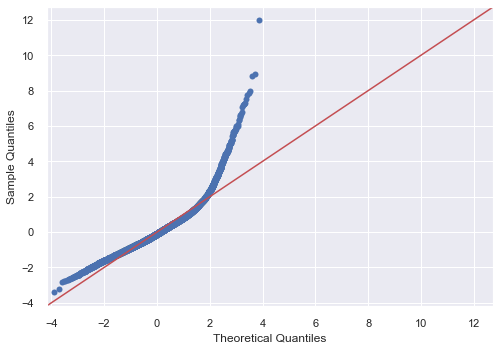

In [247]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

### check homoscedasticity

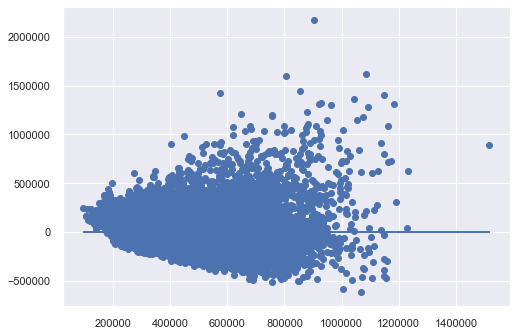

In [250]:
plt.scatter(model_2.predict(kc15_all[x_cols]), model_2.resid)
plt.plot(model_2.predict(kc15_all[x_cols]), [0 for i in range(len(kc15_all))])

### model refinement

In [251]:
for i in range(90, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, kc15_all['price'].quantile(q=q)))

0.9 percentile: 769995.0
0.91 percentile: 788399.9999999997
0.92 percentile: 810000.0
0.93 percentile: 834000.0
0.94 percentile: 860000.0
0.95 percentile: 898888.0
0.96 percentile: 942399.9999999995
0.97 percentile: 1000000.0
0.98 percentile: 1140000.0
0.99 percentile: 1340000.0


In [253]:
kc16_all = kc15_all[kc15_all['price']<1000000]
print(f'Percent removed: {(kc15_all.shape[0] - kc16_all.shape[0])/kc15_all.shape[0]:.3f}')
outcome = 'price'
x_cols = list(col for col in kc16_all.columns if col != 'price')
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_3 = ols(formula=formula, data=kc16_all).fit()
model_3.summary()

Percent removed: 0.031


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     544.8
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:54:56   Log-Likelihood:            -2.4729e+05
No. Observations:               18591   AIC:                         4.946e+05
Df Residuals:                   18569   BIC:                         4.948e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.562e+06    8.5e+04     41.892      0.000     3.4e+06    3.73e+06
sqft_lot              0.1610      0.043      3.731      0.000       0.076       0.246
sqft_living15        92.8016      2.799     33.156      0.000      87.315      98.288
sqft_lot15           -0.4475      0.065     -6.935      0.000      -0.574      -0.321
yr_built          -1780.5726     43.872    -40.586      0.000   -1866.565   -1694.580
yr_renovated_korg    19.3754      3.222      6.014      0.000      13.060      25.690
sqft_tot            118.1231      2.267     52.105      0.000     113.680     122.567
bathrooms_1750     9905.8694   1.23e+04      0.804      0.421   -1.42e+04     3.4e+04
bathrooms_2250     5027.8627   2.06e+04      0.244      0.807   -3.53e+04    4.54e+04
bathrooms_3125     1.263e+04   2.14e+04      0.589      0.556   -2.94e+04    5.47e+04
floors_150         9105.7789   1.21e+04      0.751      0.453   -1.47e+04    3.29e+04
floors_275         3141.7314   1.44e+04      0.218      0.828   -2.51e+04    3.14e+04
waterfront_1       2.783e+04   1.77e+04      1.574      0.115   -6821.642    6.25e+04
view_1             4.082e+04   3.28e+04      1.246      0.213   -2.34e+04    1.05e+05
condition_35       -241.8713   4467.825     -0.054      0.957   -8999.217    8515.475
condition_45         1.8e+04   3.31e+04      0.544      0.586   -4.68e+04    8.28e+04
mo_sold_500       -6293.9059   6107.164     -1.031      0.303   -1.83e+04    5676.695
mo_sold_750       -3.875e+04      2e+04     -1.938      0.053   -7.79e+04     442.487
mo_sold_1050       -2.72e+04   2.12e+04     -1.281      0.200   -6.88e+04    1.44e+04
lat_cat_475       -6609.9678   1.12e+04     -0.593      0.553   -2.85e+04    1.52e+04
lat_cat_476        2.505e+04   1.89e+04      1.324      0.185    -1.2e+04    6.21e+04
lat_cat_477        1.905e+04   2.02e+04      0.944      0.345   -2.05e+04    5.86e+04
==============================================================================
Omnibus:                      497.175   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.844
Skew:                           0.417   Prob(JB):                    1.62e-117
Kurtosis:                       2.987   Cond. No.                     3.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

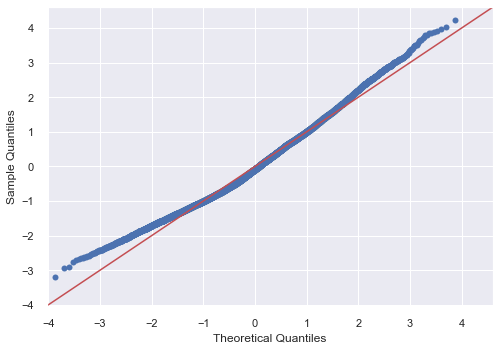

In [254]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

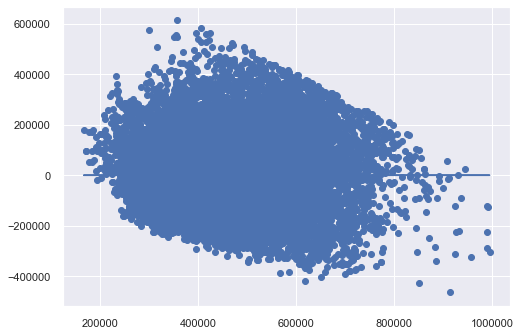

In [255]:
plt.scatter(model_3.predict(kc16_all[x_cols]), model_3.resid)
plt.plot(model_3.predict(kc16_all[x_cols]), [0 for i in range(len(kc16_all))])

## conclusion (baseline model):

final features: 

* ('waterfront', 1.1801071757045956), 
* ('view', 1.4145539358745942), 
* ('condition', 7.710200530938308), 
* ('mo_sold', 4.96727802059445), 
* ('sqft_above', 4.92288516563684), 
* ('sqft_basement', 1.61800036410134), 
* ('sqft_lot15', 1.2700445018994704), 
* ('yr_renovated_korg', 1.0474576078963587)